In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("최종데이터/2modal(image+collect)_1.csv")
df

,text,label
0,"re : opportunities\nlloyd ,\nyes , i would be...",collect_ham
1,\nALERT\nHOT STOCK ALERT THIS ONE IS STILL CLI...,image_spam
2,\nFOXFIELD\nKirkby Stephen\nFirst\nGrange-over...,image_ham
3,\nMATTHEW 9:4\nTHE\nHARVEST\n0A0\nplentiful\nB...,image_ham
4,URL: http://boingboing.net/#85540997\nDate: No...,collect_ham
...,...,...
11648,you don _ t know how to get into search engin...,collect_spam
11649,\npicture\nonly\n154\nweek\nBehind A Sorority'...,image_ham
11650,\nWESTERN UNION TELEGRAPH\nAND CABLE OFFICE,image_ham
11651,"all graphics software available , cheap oem v...",collect_spam


In [3]:
df['label'].value_counts()

image_spam      3040
collect_ham     2907
collect_spam    2881
image_ham       2825
Name: label, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11653 entries, 0 to 11652
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11653 non-null  object
 1   label   11653 non-null  object
dtypes: object(2)
memory usage: 182.2+ KB


In [5]:
df1 = pd.read_csv("최종데이터/2modal(image+create)_1.csv")
df1

,text,label
0,Subject: Expand Your Artistry: Mixed Media Mas...,create_spam
1,\nWE HAVE A RUNNER!\nCOULD THIS BE THE NEXT EX...,image_spam
2,Subject: Incredible Savings Await You: Access ...,create_spam
3,\nDoctor Prescribed and Medically Supervised T...,image_spam
4,"\n""If you break your promise, you and your sol...",image_ham
...,...,...
2407,\nBest stock Pick for this Year!\nGet ARSS Fir...,image_spam
2408,\nMarket Pulse List ARSS Among TOP FOUR Movers...,image_spam
2409,"Hi Clever,\n\nI had an idea for Hans Project. ...",create_ham
2410,Subject: Cultivate Confidence: Empowerment Wor...,create_spam


## 특수문자 비율

In [6]:
# 정규표현식 적용을 위한 라이브러리 호출
import re
# 정규표현식을 이용하여 특수문자의 비율을 반환하는 함수 정의
def ratio_special_chars(text):
    special_chars = re.findall(r'[^\w\s]', text)
    return len(special_chars)/len(text)

In [7]:
# 'special_ratio' 열에 특수문자 비율 계산하여 추가
df['special_ratio'] = df['text'].apply(ratio_special_chars)
df

,text,label,special_ratio
0,"re : opportunities\nlloyd ,\nyes , i would be...",collect_ham,0.120889
1,\nALERT\nHOT STOCK ALERT THIS ONE IS STILL CLI...,image_spam,0.020906
2,\nFOXFIELD\nKirkby Stephen\nFirst\nGrange-over...,image_ham,0.011494
3,\nMATTHEW 9:4\nTHE\nHARVEST\n0A0\nplentiful\nB...,image_ham,0.039099
4,URL: http://boingboing.net/#85540997\nDate: No...,collect_ham,0.124365
...,...,...,...
11648,you don _ t know how to get into search engin...,collect_spam,0.018244
11649,\npicture\nonly\n154\nweek\nBehind A Sorority'...,image_ham,0.025641
11650,\nWESTERN UNION TELEGRAPH\nAND CABLE OFFICE,image_ham,0.000000
11651,"all graphics software available , cheap oem v...",collect_spam,0.050000


In [8]:
# 'special_ratio' 열에 특수문자 비율 계산하여 추가
df1['special_ratio'] = df1['text'].apply(ratio_special_chars)
df1

,text,label,special_ratio
0,Subject: Expand Your Artistry: Mixed Media Mas...,create_spam,0.035336
1,\nWE HAVE A RUNNER!\nCOULD THIS BE THE NEXT EX...,image_spam,0.039342
2,Subject: Incredible Savings Await You: Access ...,create_spam,0.090566
3,\nDoctor Prescribed and Medically Supervised T...,image_spam,0.049479
4,"\n""If you break your promise, you and your sol...",image_ham,0.037500
...,...,...,...
2407,\nBest stock Pick for this Year!\nGet ARSS Fir...,image_spam,0.048251
2408,\nMarket Pulse List ARSS Among TOP FOUR Movers...,image_spam,0.047516
2409,"Hi Clever,\n\nI had an idea for Hans Project. ...",create_ham,0.050000
2410,Subject: Cultivate Confidence: Empowerment Wor...,create_spam,0.038062


In [9]:
# Min-Max 정규화 함수 정의
def minmax_normalize(column):
    min_val = column.min()
    max_val = column.max()
    normalized_column = (column - min_val) / (max_val - min_val)
    return normalized_column

In [10]:
# special_ratio 열을 Min-Max 정규화하여 교체
df['special_ratio'] = minmax_normalize(df['special_ratio'])
df

,text,label,special_ratio
0,"re : opportunities\nlloyd ,\nyes , i would be...",collect_ham,0.172217
1,\nALERT\nHOT STOCK ALERT THIS ONE IS STILL CLI...,image_spam,0.029782
2,\nFOXFIELD\nKirkby Stephen\nFirst\nGrange-over...,image_ham,0.016374
3,\nMATTHEW 9:4\nTHE\nHARVEST\n0A0\nplentiful\nB...,image_ham,0.055699
4,URL: http://boingboing.net/#85540997\nDate: No...,collect_ham,0.177169
...,...,...,...
11648,you don _ t know how to get into search engin...,collect_spam,0.025990
11649,\npicture\nonly\n154\nweek\nBehind A Sorority'...,image_ham,0.036528
11650,\nWESTERN UNION TELEGRAPH\nAND CABLE OFFICE,image_ham,0.000000
11651,"all graphics software available , cheap oem v...",collect_spam,0.071229


In [11]:
# special_ratio 열을 Min-Max 정규화하여 교체
df1['special_ratio'] = minmax_normalize(df1['special_ratio'])
df1

,text,label,special_ratio
0,Subject: Expand Your Artistry: Mixed Media Mas...,create_spam,0.164780
1,\nWE HAVE A RUNNER!\nCOULD THIS BE THE NEXT EX...,image_spam,0.183462
2,Subject: Incredible Savings Await You: Access ...,create_spam,0.422333
3,\nDoctor Prescribed and Medically Supervised T...,image_spam,0.230734
4,"\n""If you break your promise, you and your sol...",image_ham,0.174872
...,...,...,...
2407,\nBest stock Pick for this Year!\nGet ARSS Fir...,image_spam,0.225007
2408,\nMarket Pulse List ARSS Among TOP FOUR Movers...,image_spam,0.221581
2409,"Hi Clever,\n\nI had an idea for Hans Project. ...",create_ham,0.233163
2410,Subject: Cultivate Confidence: Empowerment Wor...,create_spam,0.177495


Overlapping area: 0.6192574078810353


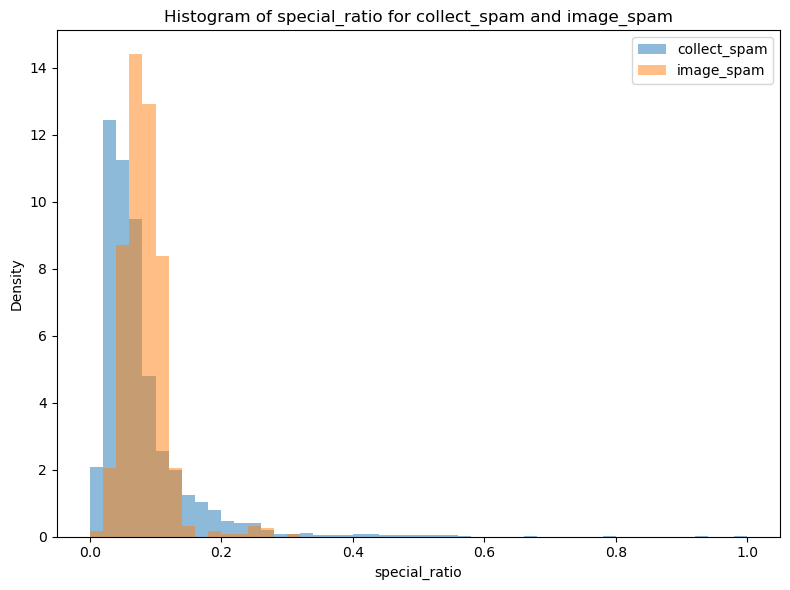

In [13]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_spam_heights, bins, _ = plt.hist(df[df['label'] == 'collect_spam']['special_ratio'], bins=50, range=(0, 1), alpha=0.5, label='collect_spam', density=True)
image_spam_heights, _, _ = plt.hist(df[df['label'] == 'image_spam']['special_ratio'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of special_ratio for collect_spam and image_spam")
plt.xlabel("special_ratio")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.5099415204678363


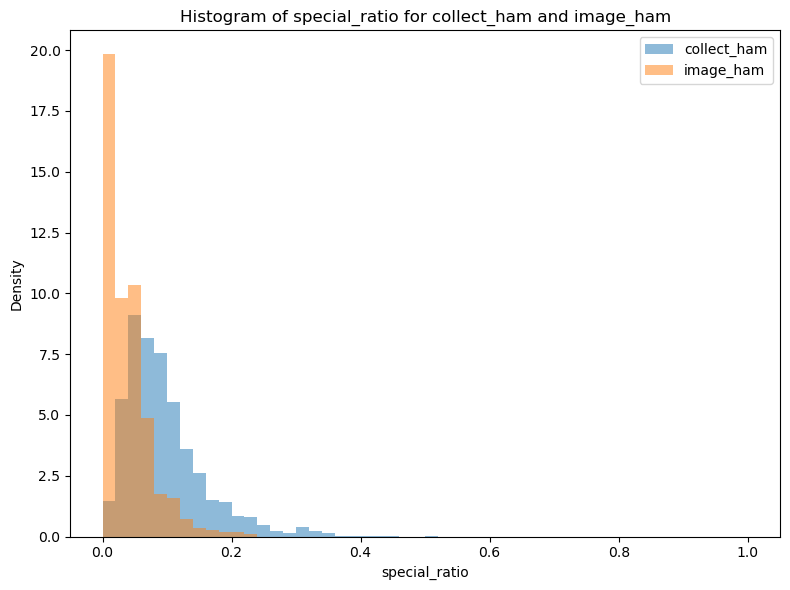

In [14]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_spam_heights, bins, _ = plt.hist(df[df['label'] == 'collect_ham']['special_ratio'], bins=50, range=(0, 1), alpha=0.5, label='collect_ham', density=True)
image_spam_heights, _, _ = plt.hist(df[df['label'] == 'image_ham']['special_ratio'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of special_ratio for collect_ham and image_ham")
plt.xlabel("special_ratio")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.5274587876706449


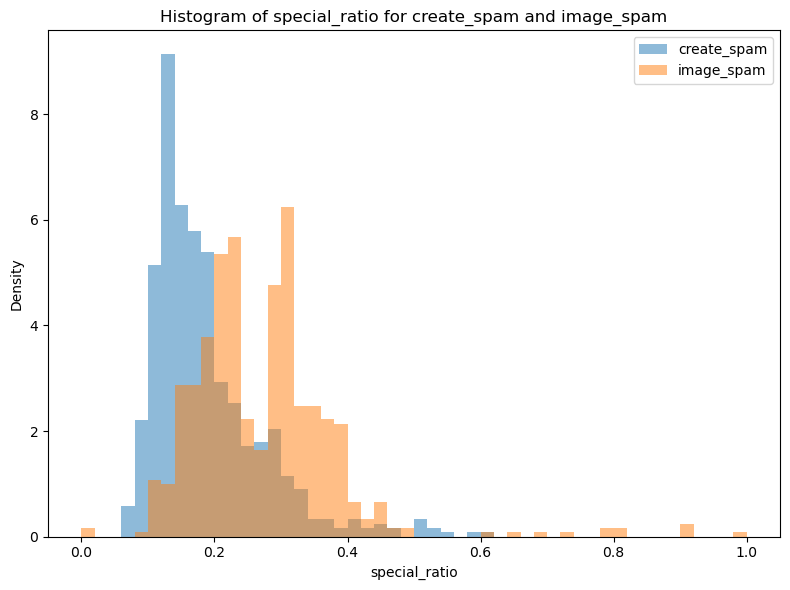

In [15]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_spam_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_spam']['special_ratio'], bins=50, range=(0, 1), alpha=0.5, label='create_spam', density=True)
image_spam_heights, _, _ = plt.hist(df1[df1['label'] == 'image_spam']['special_ratio'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of special_ratio for create_spam and image_spam")
plt.xlabel("special_ratio")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.49330487149763924


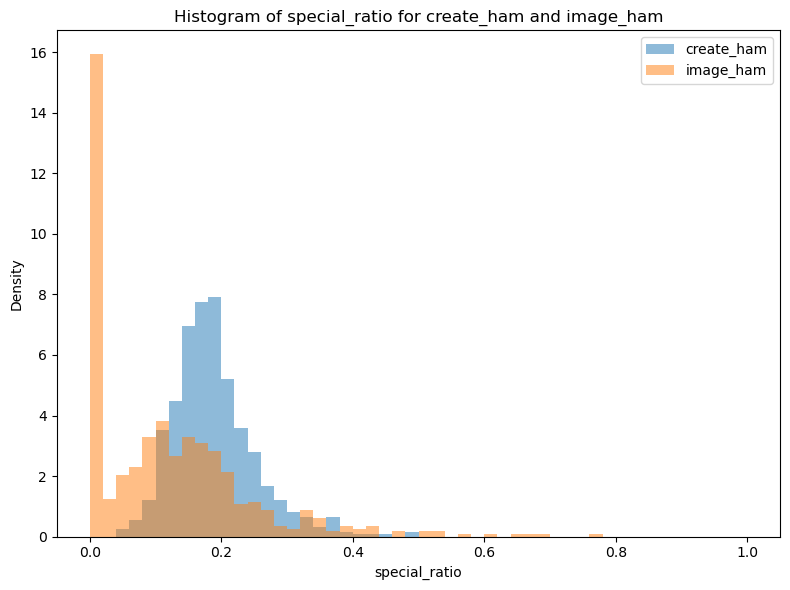

In [16]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_spam_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_ham']['special_ratio'], bins=50, range=(0, 1), alpha=0.5, label='create_ham', density=True)
image_spam_heights, _, _ = plt.hist(df1[df1['label'] == 'image_ham']['special_ratio'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of special_ratio for create_ham and image_ham")
plt.xlabel("special_ratio")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

## 숫자 비율

In [17]:
# 숫자 비율 반환 함수 정의
def ratio_numbers(text):
    pattern = r'\d+'  # 숫자를 찾기 위한 정규 표현식
    numbers = re.findall(pattern, text)
    return len(numbers)/len(text)

In [18]:
df['number_ratio'] = df['text'].apply(ratio_numbers)
df

,text,label,special_ratio,number_ratio
0,"re : opportunities\nlloyd ,\nyes , i would be...",collect_ham,0.172217,0.032886
1,\nALERT\nHOT STOCK ALERT THIS ONE IS STILL CLI...,image_spam,0.029782,0.000697
2,\nFOXFIELD\nKirkby Stephen\nFirst\nGrange-over...,image_ham,0.016374,0.000000
3,\nMATTHEW 9:4\nTHE\nHARVEST\n0A0\nplentiful\nB...,image_ham,0.055699,0.005964
4,URL: http://boingboing.net/#85540997\nDate: No...,collect_ham,0.177169,0.022843
...,...,...,...,...
11648,you don _ t know how to get into search engin...,collect_spam,0.025990,0.000000
11649,\npicture\nonly\n154\nweek\nBehind A Sorority'...,image_ham,0.036528,0.012821
11650,\nWESTERN UNION TELEGRAPH\nAND CABLE OFFICE,image_ham,0.000000,0.000000
11651,"all graphics software available , cheap oem v...",collect_spam,0.071229,0.056383


In [19]:
df1['number_ratio'] = df1['text'].apply(ratio_numbers)
df1

,text,label,special_ratio,number_ratio
0,Subject: Expand Your Artistry: Mixed Media Mas...,create_spam,0.164780,0.000000
1,\nWE HAVE A RUNNER!\nCOULD THIS BE THE NEXT EX...,image_spam,0.183462,0.007153
2,Subject: Incredible Savings Await You: Access ...,create_spam,0.422333,0.026415
3,\nDoctor Prescribed and Medically Supervised T...,image_spam,0.230734,0.005208
4,"\n""If you break your promise, you and your sol...",image_ham,0.174872,0.004167
...,...,...,...,...
2407,\nBest stock Pick for this Year!\nGet ARSS Fir...,image_spam,0.225007,0.009650
2408,\nMarket Pulse List ARSS Among TOP FOUR Movers...,image_spam,0.221581,0.017279
2409,"Hi Clever,\n\nI had an idea for Hans Project. ...",create_ham,0.233163,0.000000
2410,Subject: Cultivate Confidence: Empowerment Wor...,create_spam,0.177495,0.000000


In [20]:
# number_ratio 열을 Min-Max 정규화하여 교체
df['number_ratio'] = minmax_normalize(df['number_ratio'])
df

,text,label,special_ratio,number_ratio
0,"re : opportunities\nlloyd ,\nyes , i would be...",collect_ham,0.172217,0.106878
1,\nALERT\nHOT STOCK ALERT THIS ONE IS STILL CLI...,image_spam,0.029782,0.002265
2,\nFOXFIELD\nKirkby Stephen\nFirst\nGrange-over...,image_ham,0.016374,0.000000
3,\nMATTHEW 9:4\nTHE\nHARVEST\n0A0\nplentiful\nB...,image_ham,0.055699,0.019384
4,URL: http://boingboing.net/#85540997\nDate: No...,collect_ham,0.177169,0.074239
...,...,...,...,...
11648,you don _ t know how to get into search engin...,collect_spam,0.025990,0.000000
11649,\npicture\nonly\n154\nweek\nBehind A Sorority'...,image_ham,0.036528,0.041667
11650,\nWESTERN UNION TELEGRAPH\nAND CABLE OFFICE,image_ham,0.000000,0.000000
11651,"all graphics software available , cheap oem v...",collect_spam,0.071229,0.183245


In [21]:
# number_ratio 열을 Min-Max 정규화하여 교체
df1['number_ratio'] = minmax_normalize(df1['number_ratio'])
df1

,text,label,special_ratio,number_ratio
0,Subject: Expand Your Artistry: Mixed Media Mas...,create_spam,0.164780,0.000000
1,\nWE HAVE A RUNNER!\nCOULD THIS BE THE NEXT EX...,image_spam,0.183462,0.042918
2,Subject: Incredible Savings Await You: Access ...,create_spam,0.422333,0.158491
3,\nDoctor Prescribed and Medically Supervised T...,image_spam,0.230734,0.031250
4,"\n""If you break your promise, you and your sol...",image_ham,0.174872,0.025000
...,...,...,...,...
2407,\nBest stock Pick for this Year!\nGet ARSS Fir...,image_spam,0.225007,0.057901
2408,\nMarket Pulse List ARSS Among TOP FOUR Movers...,image_spam,0.221581,0.103672
2409,"Hi Clever,\n\nI had an idea for Hans Project. ...",create_ham,0.233163,0.000000
2410,Subject: Cultivate Confidence: Empowerment Wor...,create_spam,0.177495,0.000000


Overlapping area: 0.582159771826303


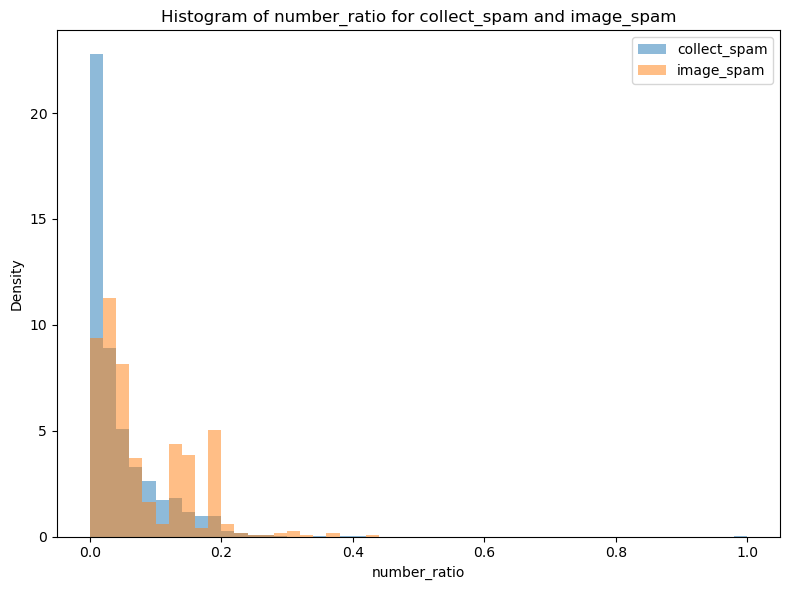

In [22]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_spam_heights, bins, _ = plt.hist(df[df['label'] == 'collect_spam']['number_ratio'], bins=50, range=(0, 1), alpha=0.5, label='collect_spam', density=True)
image_spam_heights, _, _ = plt.hist(df[df['label'] == 'image_spam']['number_ratio'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of number_ratio for collect_spam and image_spam")
plt.xlabel("number_ratio")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.5575516528611133


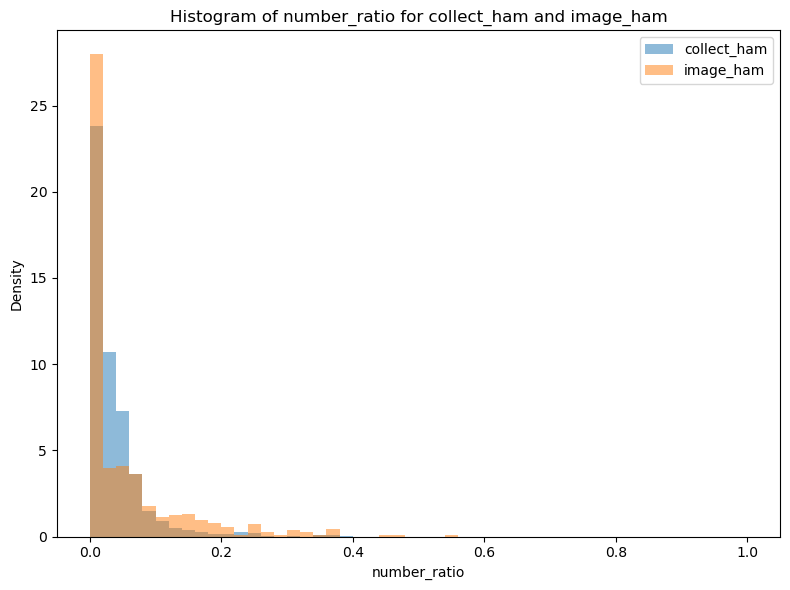

In [23]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_ham_heights, bins, _ = plt.hist(df[df['label'] == 'collect_ham']['number_ratio'], bins=50, range=(0, 1), alpha=0.5, label='collect_ham', density=True)
image_ham_heights, _, _ = plt.hist(df[df['label'] == 'image_ham']['number_ratio'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of number_ratio for collect_ham and image_ham")
plt.xlabel("number_ratio")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.32086588821155665


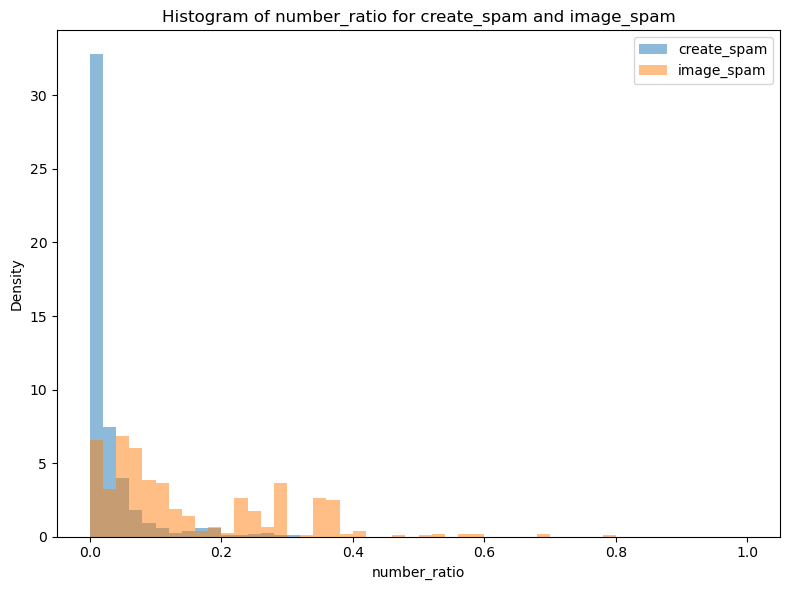

In [24]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_spam_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_spam']['number_ratio'], bins=50, range=(0, 1), alpha=0.5, label='create_spam', density=True)
image_spam_heights, _, _ = plt.hist(df1[df1['label'] == 'image_spam']['number_ratio'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of number_ratio for create_spam and image_spam")
plt.xlabel("number_ratio")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.35573807571602256


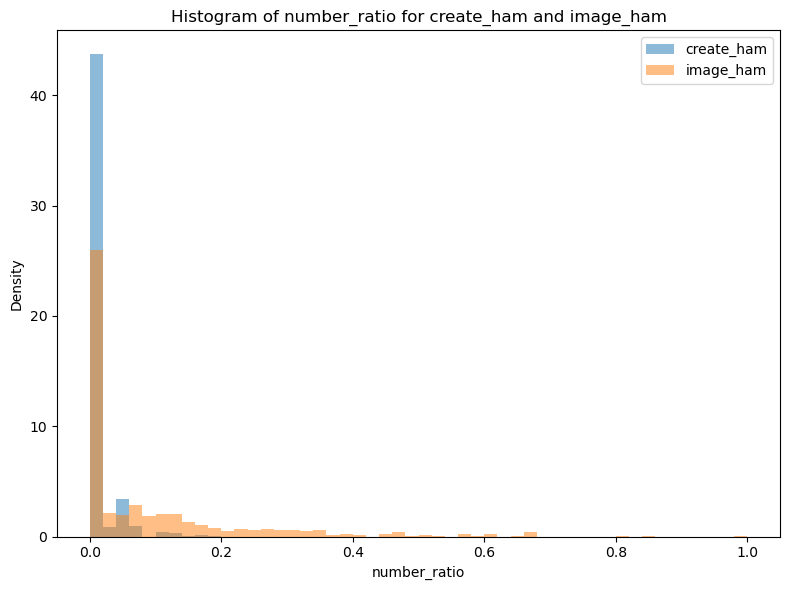

In [25]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_ham_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_ham']['number_ratio'], bins=50, range=(0, 1), alpha=0.5, label='create_ham', density=True)
image_ham_heights, _, _ = plt.hist(df1[df1['label'] == 'image_ham']['number_ratio'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of number_ratio for create_ham and image_ham")
plt.xlabel("number_ratio")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

## 문장 토큰화(TweetTokenizer)

In [26]:
# 토큰화를 위한 토크나이저 라이브러리 호출
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

In [27]:
# 토큰화
df['tokens'] = df['text'].apply(tweet_tokenizer.tokenize)
df

,text,label,special_ratio,number_ratio,tokens
0,"re : opportunities\nlloyd ,\nyes , i would be...",collect_ham,0.172217,0.106878,"[re, :, opportunities, lloyd, ,, yes, ,, i, wo..."
1,\nALERT\nHOT STOCK ALERT THIS ONE IS STILL CLI...,image_spam,0.029782,0.002265,"[ALERT, HOT, STOCK, ALERT, THIS, ONE, IS, STIL..."
2,\nFOXFIELD\nKirkby Stephen\nFirst\nGrange-over...,image_ham,0.016374,0.000000,"[FOXFIELD, Kirkby, Stephen, First, Grange-over..."
3,\nMATTHEW 9:4\nTHE\nHARVEST\n0A0\nplentiful\nB...,image_ham,0.055699,0.019384,"[MATTHEW, 9:4, THE, HARVEST, 0A0, plentiful, B..."
4,URL: http://boingboing.net/#85540997\nDate: No...,collect_ham,0.177169,0.074239,"[URL, :, http://boingboing.net/#85540997, Date..."
...,...,...,...,...,...
11648,you don _ t know how to get into search engin...,collect_spam,0.025990,0.000000,"[you, don, _, t, know, how, to, get, into, sea..."
11649,\npicture\nonly\n154\nweek\nBehind A Sorority'...,image_ham,0.036528,0.041667,"[picture, only, 154, week, Behind, A, Sorority..."
11650,\nWESTERN UNION TELEGRAPH\nAND CABLE OFFICE,image_ham,0.000000,0.000000,"[WESTERN, UNION, TELEGRAPH, AND, CABLE, OFFICE]"
11651,"all graphics software available , cheap oem v...",collect_spam,0.071229,0.183245,"[all, graphics, software, available, ,, cheap,..."


In [28]:
# 토큰화
df1['tokens'] = df1['text'].apply(tweet_tokenizer.tokenize)
df1

,text,label,special_ratio,number_ratio,tokens
0,Subject: Expand Your Artistry: Mixed Media Mas...,create_spam,0.164780,0.000000,"[Subject, :, Expand, Your, Artistry, :, Mixed,..."
1,\nWE HAVE A RUNNER!\nCOULD THIS BE THE NEXT EX...,image_spam,0.183462,0.042918,"[WE, HAVE, A, RUNNER, !, COULD, THIS, BE, THE,..."
2,Subject: Incredible Savings Await You: Access ...,create_spam,0.422333,0.158491,"[Subject, :, Incredible, Savings, Await, You, ..."
3,\nDoctor Prescribed and Medically Supervised T...,image_spam,0.230734,0.031250,"[Doctor, Prescribed, and, Medically, Supervise..."
4,"\n""If you break your promise, you and your sol...",image_ham,0.174872,0.025000,"["", If, you, break, your, promise, ,, you, and..."
...,...,...,...,...,...
2407,\nBest stock Pick for this Year!\nGet ARSS Fir...,image_spam,0.225007,0.057901,"[Best, stock, Pick, for, this, Year, !, Get, A..."
2408,\nMarket Pulse List ARSS Among TOP FOUR Movers...,image_spam,0.221581,0.103672,"[Market, Pulse, List, ARSS, Among, TOP, FOUR, ..."
2409,"Hi Clever,\n\nI had an idea for Hans Project. ...",create_ham,0.233163,0.000000,"[Hi, Clever, ,, I, had, an, idea, for, Hans, P..."
2410,Subject: Cultivate Confidence: Empowerment Wor...,create_spam,0.177495,0.000000,"[Subject, :, Cultivate, Confidence, :, Empower..."


## URL 카운팅

In [29]:
# 문장 내에 URL 카운팅하는 함수 정의
def url_count(tokens):
    count = 0
    for token in tokens:
        if re.match(r"(http\S+|www\.\S+)", token):
            count = count+1
    return count

In [30]:
df['url_count'] = df['tokens'].apply(url_count)
df

,text,label,special_ratio,number_ratio,tokens,url_count
0,"re : opportunities\nlloyd ,\nyes , i would be...",collect_ham,0.172217,0.106878,"[re, :, opportunities, lloyd, ,, yes, ,, i, wo...",0
1,\nALERT\nHOT STOCK ALERT THIS ONE IS STILL CLI...,image_spam,0.029782,0.002265,"[ALERT, HOT, STOCK, ALERT, THIS, ONE, IS, STIL...",0
2,\nFOXFIELD\nKirkby Stephen\nFirst\nGrange-over...,image_ham,0.016374,0.000000,"[FOXFIELD, Kirkby, Stephen, First, Grange-over...",0
3,\nMATTHEW 9:4\nTHE\nHARVEST\n0A0\nplentiful\nB...,image_ham,0.055699,0.019384,"[MATTHEW, 9:4, THE, HARVEST, 0A0, plentiful, B...",0
4,URL: http://boingboing.net/#85540997\nDate: No...,collect_ham,0.177169,0.074239,"[URL, :, http://boingboing.net/#85540997, Date...",3
...,...,...,...,...,...,...
11648,you don _ t know how to get into search engin...,collect_spam,0.025990,0.000000,"[you, don, _, t, know, how, to, get, into, sea...",0
11649,\npicture\nonly\n154\nweek\nBehind A Sorority'...,image_ham,0.036528,0.041667,"[picture, only, 154, week, Behind, A, Sorority...",0
11650,\nWESTERN UNION TELEGRAPH\nAND CABLE OFFICE,image_ham,0.000000,0.000000,"[WESTERN, UNION, TELEGRAPH, AND, CABLE, OFFICE]",0
11651,"all graphics software available , cheap oem v...",collect_spam,0.071229,0.183245,"[all, graphics, software, available, ,, cheap,...",0


In [31]:
df1['url_count'] = df1['tokens'].apply(url_count)
df1

,text,label,special_ratio,number_ratio,tokens,url_count
0,Subject: Expand Your Artistry: Mixed Media Mas...,create_spam,0.164780,0.000000,"[Subject, :, Expand, Your, Artistry, :, Mixed,...",0
1,\nWE HAVE A RUNNER!\nCOULD THIS BE THE NEXT EX...,image_spam,0.183462,0.042918,"[WE, HAVE, A, RUNNER, !, COULD, THIS, BE, THE,...",0
2,Subject: Incredible Savings Await You: Access ...,create_spam,0.422333,0.158491,"[Subject, :, Incredible, Savings, Await, You, ...",3
3,\nDoctor Prescribed and Medically Supervised T...,image_spam,0.230734,0.031250,"[Doctor, Prescribed, and, Medically, Supervise...",2
4,"\n""If you break your promise, you and your sol...",image_ham,0.174872,0.025000,"["", If, you, break, your, promise, ,, you, and...",0
...,...,...,...,...,...,...
2407,\nBest stock Pick for this Year!\nGet ARSS Fir...,image_spam,0.225007,0.057901,"[Best, stock, Pick, for, this, Year, !, Get, A...",0
2408,\nMarket Pulse List ARSS Among TOP FOUR Movers...,image_spam,0.221581,0.103672,"[Market, Pulse, List, ARSS, Among, TOP, FOUR, ...",0
2409,"Hi Clever,\n\nI had an idea for Hans Project. ...",create_ham,0.233163,0.000000,"[Hi, Clever, ,, I, had, an, idea, for, Hans, P...",0
2410,Subject: Cultivate Confidence: Empowerment Wor...,create_spam,0.177495,0.000000,"[Subject, :, Cultivate, Confidence, :, Empower...",0


Overlapping area: 0.5105252867570387


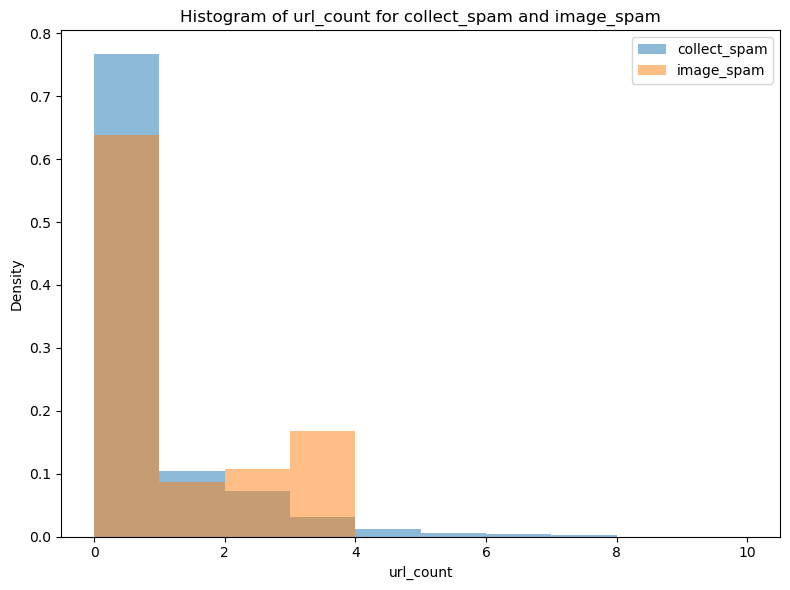

In [32]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_spam_heights, bins, _ = plt.hist(df[df['label'] == 'collect_spam']['url_count'], bins=10, range=(0, 10), alpha=0.5, label='collect_spam', density=True)
image_spam_heights, _, _ = plt.hist(df[df['label'] == 'image_spam']['url_count'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of url_count for collect_spam and image_spam")
plt.xlabel("url_count")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.4040296002441257


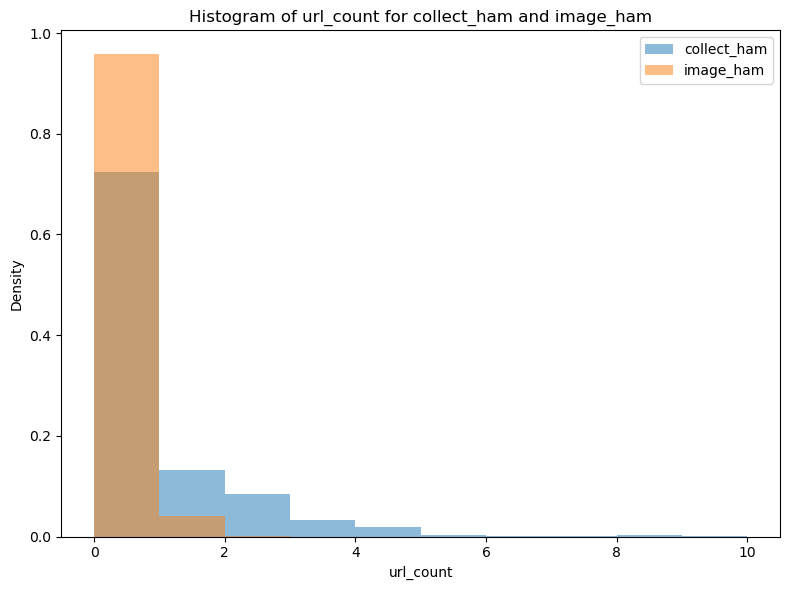

In [33]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_ham_heights, bins, _ = plt.hist(df[df['label'] == 'collect_ham']['url_count'], bins=10, range=(0, 10), alpha=0.5, label='collect_ham', density=True)
image_ham_heights, _, _ = plt.hist(df[df['label'] == 'image_ham']['url_count'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of url_count for collect_ham and image_ham")
plt.xlabel("url_count")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.4470330342577488


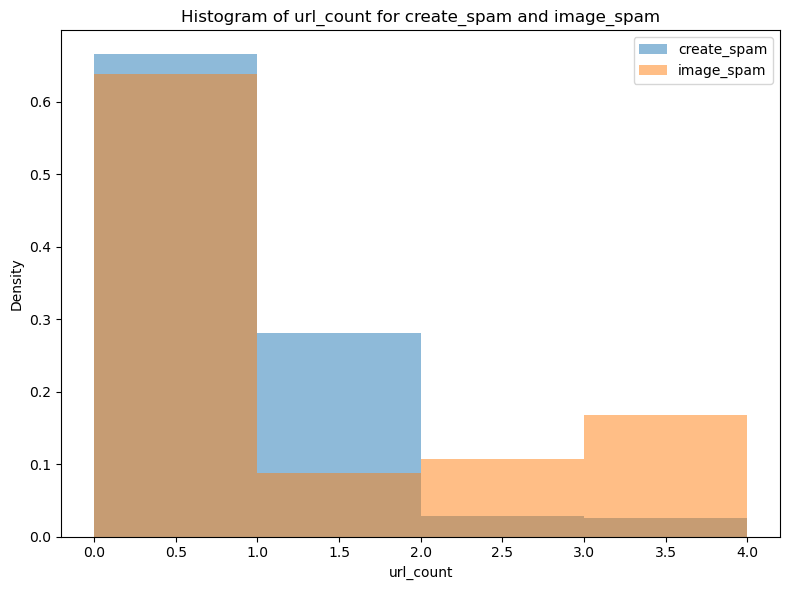

In [34]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_spam_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_spam']['url_count'], bins=4, range=(0, 4), alpha=0.5, label='create_spam', density=True)
image_spam_heights, _, _ = plt.hist(df1[df1['label'] == 'image_spam']['url_count'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of url_count for create_spam and image_spam")
plt.xlabel("url_count")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.5183437473493737


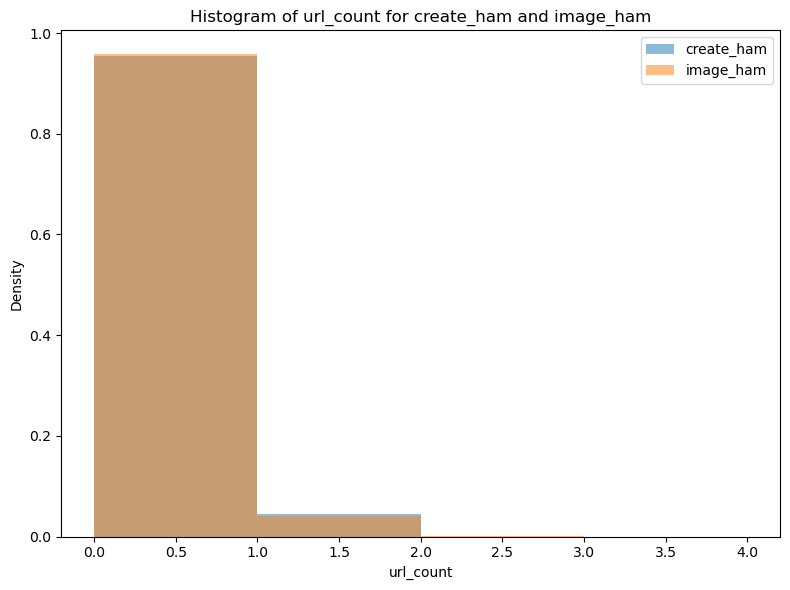

In [35]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_ham_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_ham']['url_count'], bins=4, range=(0, 4), alpha=0.5, label='create_ham', density=True)
image_ham_heights, _, _ = plt.hist(df1[df1['label'] == 'image_ham']['url_count'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of url_count for create_ham and image_ham")
plt.xlabel("url_count")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

## 대문자 비율

In [36]:
# 대문자의 비율을 반환하는 함수를 정의
def ratio_upper(text):
    return len(re.findall(r'[A-Z]', text))/len(text)

In [37]:
df['upper_ratio'] = df['text'].apply(ratio_upper)
df

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio
0,"re : opportunities\nlloyd ,\nyes , i would be...",collect_ham,0.172217,0.106878,"[re, :, opportunities, lloyd, ,, yes, ,, i, wo...",0,0.000000
1,\nALERT\nHOT STOCK ALERT THIS ONE IS STILL CLI...,image_spam,0.029782,0.002265,"[ALERT, HOT, STOCK, ALERT, THIS, ONE, IS, STIL...",0,0.165854
2,\nFOXFIELD\nKirkby Stephen\nFirst\nGrange-over...,image_ham,0.016374,0.000000,"[FOXFIELD, Kirkby, Stephen, First, Grange-over...",0,0.160920
3,\nMATTHEW 9:4\nTHE\nHARVEST\n0A0\nplentiful\nB...,image_ham,0.055699,0.019384,"[MATTHEW, 9:4, THE, HARVEST, 0A0, plentiful, B...",0,0.050364
4,URL: http://boingboing.net/#85540997\nDate: No...,collect_ham,0.177169,0.074239,"[URL, :, http://boingboing.net/#85540997, Date...",3,0.060914
...,...,...,...,...,...,...,...
11648,you don _ t know how to get into search engin...,collect_spam,0.025990,0.000000,"[you, don, _, t, know, how, to, get, into, sea...",0,0.000000
11649,\npicture\nonly\n154\nweek\nBehind A Sorority'...,image_ham,0.036528,0.041667,"[picture, only, 154, week, Behind, A, Sorority...",0,0.166667
11650,\nWESTERN UNION TELEGRAPH\nAND CABLE OFFICE,image_ham,0.000000,0.000000,"[WESTERN, UNION, TELEGRAPH, AND, CABLE, OFFICE]",0,0.853659
11651,"all graphics software available , cheap oem v...",collect_spam,0.071229,0.183245,"[all, graphics, software, available, ,, cheap,...",0,0.000000


In [38]:
df1['upper_ratio'] = df1['text'].apply(ratio_upper)
df1

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio
0,Subject: Expand Your Artistry: Mixed Media Mas...,create_spam,0.164780,0.000000,"[Subject, :, Expand, Your, Artistry, :, Mixed,...",0,0.067138
1,\nWE HAVE A RUNNER!\nCOULD THIS BE THE NEXT EX...,image_spam,0.183462,0.042918,"[WE, HAVE, A, RUNNER, !, COULD, THIS, BE, THE,...",0,0.215308
2,Subject: Incredible Savings Await You: Access ...,create_spam,0.422333,0.158491,"[Subject, :, Incredible, Savings, Await, You, ...",3,0.033962
3,\nDoctor Prescribed and Medically Supervised T...,image_spam,0.230734,0.031250,"[Doctor, Prescribed, and, Medically, Supervise...",2,0.148438
4,"\n""If you break your promise, you and your sol...",image_ham,0.174872,0.025000,"["", If, you, break, your, promise, ,, you, and...",0,0.037500
...,...,...,...,...,...,...,...
2407,\nBest stock Pick for this Year!\nGet ARSS Fir...,image_spam,0.225007,0.057901,"[Best, stock, Pick, for, this, Year, !, Get, A...",0,0.130277
2408,\nMarket Pulse List ARSS Among TOP FOUR Movers...,image_spam,0.221581,0.103672,"[Market, Pulse, List, ARSS, Among, TOP, FOUR, ...",0,0.110151
2409,"Hi Clever,\n\nI had an idea for Hans Project. ...",create_ham,0.233163,0.000000,"[Hi, Clever, ,, I, had, an, idea, for, Hans, P...",0,0.075000
2410,Subject: Cultivate Confidence: Empowerment Wor...,create_spam,0.177495,0.000000,"[Subject, :, Cultivate, Confidence, :, Empower...",0,0.051903


In [39]:
# upper_ratio 열을 Min-Max 정규화하여 교체
df['upper_ratio'] = minmax_normalize(df['upper_ratio'])
df

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio
0,"re : opportunities\nlloyd ,\nyes , i would be...",collect_ham,0.172217,0.106878,"[re, :, opportunities, lloyd, ,, yes, ,, i, wo...",0,0.000000
1,\nALERT\nHOT STOCK ALERT THIS ONE IS STILL CLI...,image_spam,0.029782,0.002265,"[ALERT, HOT, STOCK, ALERT, THIS, ONE, IS, STIL...",0,0.165854
2,\nFOXFIELD\nKirkby Stephen\nFirst\nGrange-over...,image_ham,0.016374,0.000000,"[FOXFIELD, Kirkby, Stephen, First, Grange-over...",0,0.160920
3,\nMATTHEW 9:4\nTHE\nHARVEST\n0A0\nplentiful\nB...,image_ham,0.055699,0.019384,"[MATTHEW, 9:4, THE, HARVEST, 0A0, plentiful, B...",0,0.050364
4,URL: http://boingboing.net/#85540997\nDate: No...,collect_ham,0.177169,0.074239,"[URL, :, http://boingboing.net/#85540997, Date...",3,0.060914
...,...,...,...,...,...,...,...
11648,you don _ t know how to get into search engin...,collect_spam,0.025990,0.000000,"[you, don, _, t, know, how, to, get, into, sea...",0,0.000000
11649,\npicture\nonly\n154\nweek\nBehind A Sorority'...,image_ham,0.036528,0.041667,"[picture, only, 154, week, Behind, A, Sorority...",0,0.166667
11650,\nWESTERN UNION TELEGRAPH\nAND CABLE OFFICE,image_ham,0.000000,0.000000,"[WESTERN, UNION, TELEGRAPH, AND, CABLE, OFFICE]",0,0.853659
11651,"all graphics software available , cheap oem v...",collect_spam,0.071229,0.183245,"[all, graphics, software, available, ,, cheap,...",0,0.000000


In [40]:
# upper_ratio 열을 Min-Max 정규화하여 교체
df1['upper_ratio'] = minmax_normalize(df1['upper_ratio'])
df1

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio
0,Subject: Expand Your Artistry: Mixed Media Mas...,create_spam,0.164780,0.000000,"[Subject, :, Expand, Your, Artistry, :, Mixed,...",0,0.067138
1,\nWE HAVE A RUNNER!\nCOULD THIS BE THE NEXT EX...,image_spam,0.183462,0.042918,"[WE, HAVE, A, RUNNER, !, COULD, THIS, BE, THE,...",0,0.215308
2,Subject: Incredible Savings Await You: Access ...,create_spam,0.422333,0.158491,"[Subject, :, Incredible, Savings, Await, You, ...",3,0.033962
3,\nDoctor Prescribed and Medically Supervised T...,image_spam,0.230734,0.031250,"[Doctor, Prescribed, and, Medically, Supervise...",2,0.148438
4,"\n""If you break your promise, you and your sol...",image_ham,0.174872,0.025000,"["", If, you, break, your, promise, ,, you, and...",0,0.037500
...,...,...,...,...,...,...,...
2407,\nBest stock Pick for this Year!\nGet ARSS Fir...,image_spam,0.225007,0.057901,"[Best, stock, Pick, for, this, Year, !, Get, A...",0,0.130277
2408,\nMarket Pulse List ARSS Among TOP FOUR Movers...,image_spam,0.221581,0.103672,"[Market, Pulse, List, ARSS, Among, TOP, FOUR, ...",0,0.110151
2409,"Hi Clever,\n\nI had an idea for Hans Project. ...",create_ham,0.233163,0.000000,"[Hi, Clever, ,, I, had, an, idea, for, Hans, P...",0,0.075000
2410,Subject: Cultivate Confidence: Empowerment Wor...,create_spam,0.177495,0.000000,"[Subject, :, Cultivate, Confidence, :, Empower...",0,0.051903


Overlapping area: 0.36109823434845356


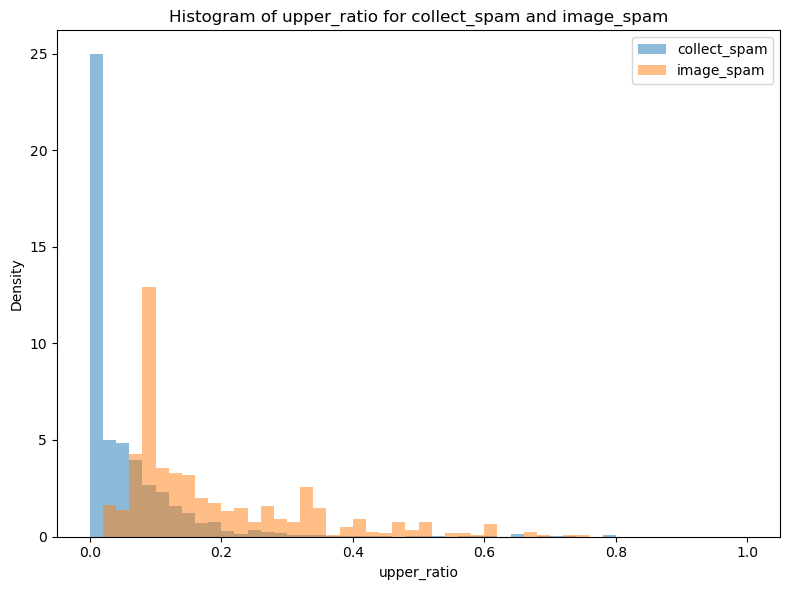

In [41]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_spam_heights, bins, _ = plt.hist(df[df['label'] == 'collect_spam']['upper_ratio'], bins=50, range=(0, 1), alpha=0.5, label='collect_spam', density=True)
image_spam_heights, _, _ = plt.hist(df[df['label'] == 'image_spam']['upper_ratio'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of upper_ratio for collect_spam and image_spam")
plt.xlabel("upper_ratio")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.15374941779226828


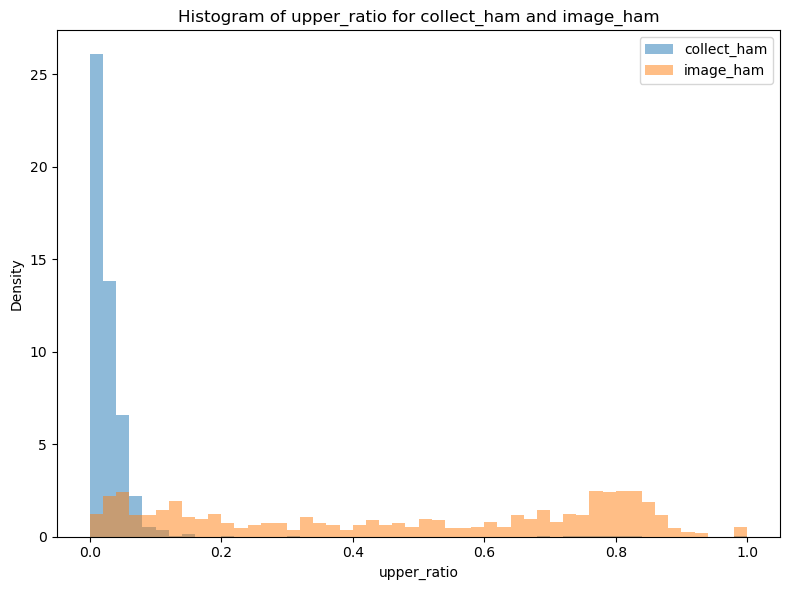

In [42]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_ham_heights, bins, _ = plt.hist(df[df['label'] == 'collect_ham']['upper_ratio'], bins=50, range=(0, 1), alpha=0.5, label='collect_ham', density=True)
image_ham_heights, _, _ = plt.hist(df[df['label'] == 'image_ham']['upper_ratio'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of upper_ratio for collect_ham and image_ham")
plt.xlabel("upper_ratio")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.1480129003176784


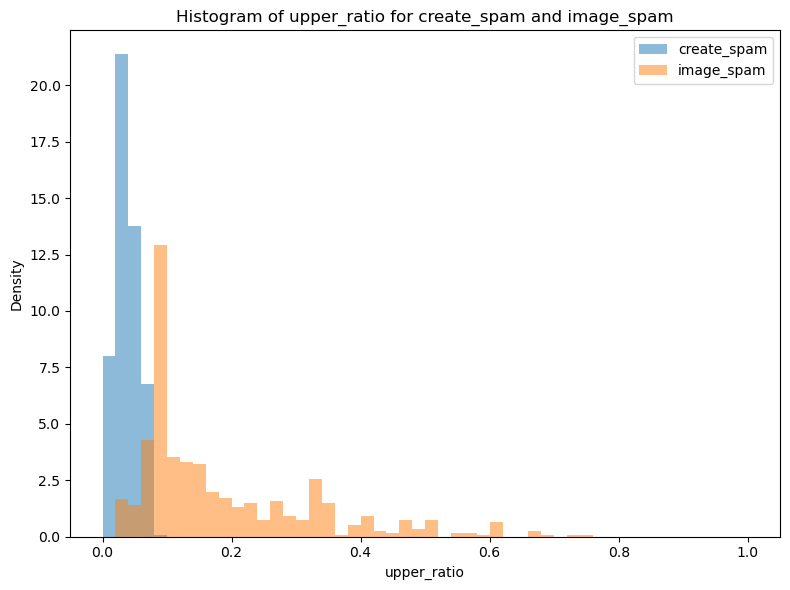

In [43]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_spam_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_spam']['upper_ratio'], bins=50, range=(0, 1), alpha=0.5, label='create_spam', density=True)
image_spam_heights, _, _ = plt.hist(df1[df1['label'] == 'image_spam']['upper_ratio'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of upper_ratio for create_spam and image_spam")
plt.xlabel("upper_ratio")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.1306285164974978


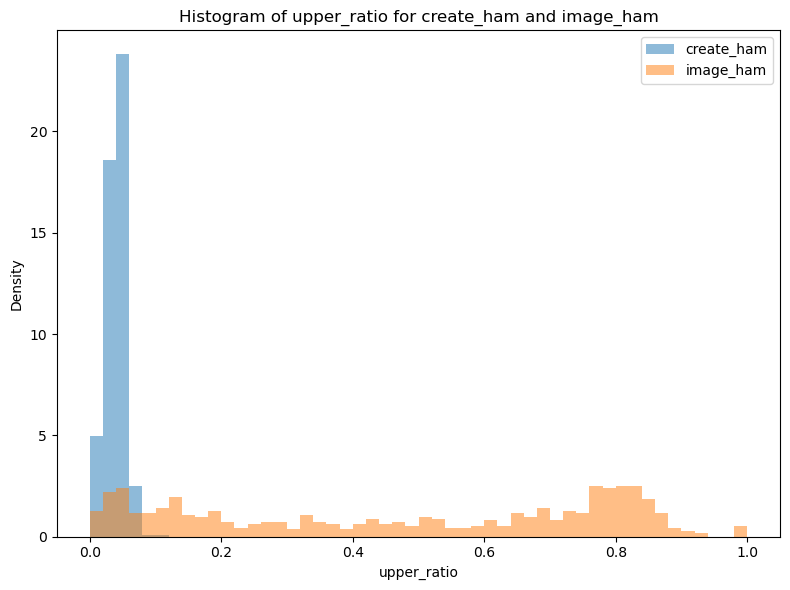

In [44]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_ham_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_ham']['upper_ratio'], bins=50, range=(0, 1), alpha=0.5, label='create_ham', density=True)
image_ham_heights, _, _ = plt.hist(df1[df1['label'] == 'image_ham']['upper_ratio'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of upper_ratio for create_ham and image_ham")
plt.xlabel("upper_ratio")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

## 공백 비율

In [45]:
# 공백의 개수를 카운팅하는 함수를 정의합니다.
def ratio_blank(text):
    return text.count(' ')/len(text)

In [46]:
df['blank_ratio'] = df['text'].apply(ratio_blank)
df

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio,blank_ratio
0,"re : opportunities\nlloyd ,\nyes , i would be...",collect_ham,0.172217,0.106878,"[re, :, opportunities, lloyd, ,, yes, ,, i, wo...",0,0.000000,0.245484
1,\nALERT\nHOT STOCK ALERT THIS ONE IS STILL CLI...,image_spam,0.029782,0.002265,"[ALERT, HOT, STOCK, ALERT, THIS, ONE, IS, STIL...",0,0.165854,0.147735
2,\nFOXFIELD\nKirkby Stephen\nFirst\nGrange-over...,image_ham,0.016374,0.000000,"[FOXFIELD, Kirkby, Stephen, First, Grange-over...",0,0.160920,0.057471
3,\nMATTHEW 9:4\nTHE\nHARVEST\n0A0\nplentiful\nB...,image_ham,0.055699,0.019384,"[MATTHEW, 9:4, THE, HARVEST, 0A0, plentiful, B...",0,0.050364,0.179589
4,URL: http://boingboing.net/#85540997\nDate: No...,collect_ham,0.177169,0.074239,"[URL, :, http://boingboing.net/#85540997, Date...",3,0.060914,0.086294
...,...,...,...,...,...,...,...,...
11648,you don _ t know how to get into search engin...,collect_spam,0.025990,0.000000,"[you, don, _, t, know, how, to, get, into, sea...",0,0.000000,0.241733
11649,\npicture\nonly\n154\nweek\nBehind A Sorority'...,image_ham,0.036528,0.041667,"[picture, only, 154, week, Behind, A, Sorority...",0,0.166667,0.098291
11650,\nWESTERN UNION TELEGRAPH\nAND CABLE OFFICE,image_ham,0.000000,0.000000,"[WESTERN, UNION, TELEGRAPH, AND, CABLE, OFFICE]",0,0.853659,0.097561
11651,"all graphics software available , cheap oem v...",collect_spam,0.071229,0.183245,"[all, graphics, software, available, ,, cheap,...",0,0.000000,0.185106


In [47]:
df1['blank_ratio'] = df1['text'].apply(ratio_blank)
df1

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio,blank_ratio
0,Subject: Expand Your Artistry: Mixed Media Mas...,create_spam,0.164780,0.000000,"[Subject, :, Expand, Your, Artistry, :, Mixed,...",0,0.067138,0.109541
1,\nWE HAVE A RUNNER!\nCOULD THIS BE THE NEXT EX...,image_spam,0.183462,0.042918,"[WE, HAVE, A, RUNNER, !, COULD, THIS, BE, THE,...",0,0.215308,0.148784
2,Subject: Incredible Savings Await You: Access ...,create_spam,0.422333,0.158491,"[Subject, :, Incredible, Savings, Await, You, ...",3,0.033962,0.075472
3,\nDoctor Prescribed and Medically Supervised T...,image_spam,0.230734,0.031250,"[Doctor, Prescribed, and, Medically, Supervise...",2,0.148438,0.130208
4,"\n""If you break your promise, you and your sol...",image_ham,0.174872,0.025000,"["", If, you, break, your, promise, ,, you, and...",0,0.037500,0.141667
...,...,...,...,...,...,...,...,...
2407,\nBest stock Pick for this Year!\nGet ARSS Fir...,image_spam,0.225007,0.057901,"[Best, stock, Pick, for, this, Year, !, Get, A...",0,0.130277,0.151990
2408,\nMarket Pulse List ARSS Among TOP FOUR Movers...,image_spam,0.221581,0.103672,"[Market, Pulse, List, ARSS, Among, TOP, FOUR, ...",0,0.110151,0.133909
2409,"Hi Clever,\n\nI had an idea for Hans Project. ...",create_ham,0.233163,0.000000,"[Hi, Clever, ,, I, had, an, idea, for, Hans, P...",0,0.075000,0.187500
2410,Subject: Cultivate Confidence: Empowerment Wor...,create_spam,0.177495,0.000000,"[Subject, :, Cultivate, Confidence, :, Empower...",0,0.051903,0.100346


In [48]:
# blank_ratio 열을 Min-Max 정규화하여 교체
df['blank_ratio'] = minmax_normalize(df['blank_ratio'])
df

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio,blank_ratio
0,"re : opportunities\nlloyd ,\nyes , i would be...",collect_ham,0.172217,0.106878,"[re, :, opportunities, lloyd, ,, yes, ,, i, wo...",0,0.000000,0.413615
1,\nALERT\nHOT STOCK ALERT THIS ONE IS STILL CLI...,image_spam,0.029782,0.002265,"[ALERT, HOT, STOCK, ALERT, THIS, ONE, IS, STIL...",0,0.165854,0.248918
2,\nFOXFIELD\nKirkby Stephen\nFirst\nGrange-over...,image_ham,0.016374,0.000000,"[FOXFIELD, Kirkby, Stephen, First, Grange-over...",0,0.160920,0.096833
3,\nMATTHEW 9:4\nTHE\nHARVEST\n0A0\nplentiful\nB...,image_ham,0.055699,0.019384,"[MATTHEW, 9:4, THE, HARVEST, 0A0, plentiful, B...",0,0.050364,0.302589
4,URL: http://boingboing.net/#85540997\nDate: No...,collect_ham,0.177169,0.074239,"[URL, :, http://boingboing.net/#85540997, Date...",3,0.060914,0.145397
...,...,...,...,...,...,...,...,...
11648,you don _ t know how to get into search engin...,collect_spam,0.025990,0.000000,"[you, don, _, t, know, how, to, get, into, sea...",0,0.000000,0.407295
11649,\npicture\nonly\n154\nweek\nBehind A Sorority'...,image_ham,0.036528,0.041667,"[picture, only, 154, week, Behind, A, Sorority...",0,0.166667,0.165609
11650,\nWESTERN UNION TELEGRAPH\nAND CABLE OFFICE,image_ham,0.000000,0.000000,"[WESTERN, UNION, TELEGRAPH, AND, CABLE, OFFICE]",0,0.853659,0.164380
11651,"all graphics software available , cheap oem v...",collect_spam,0.071229,0.183245,"[all, graphics, software, available, ,, cheap,...",0,0.000000,0.311885


In [49]:
# blank_ratio 열을 Min-Max 정규화하여 교체
df1['blank_ratio'] = minmax_normalize(df1['blank_ratio'])
df1

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio,blank_ratio
0,Subject: Expand Your Artistry: Mixed Media Mas...,create_spam,0.164780,0.000000,"[Subject, :, Expand, Your, Artistry, :, Mixed,...",0,0.067138,0.503887
1,\nWE HAVE A RUNNER!\nCOULD THIS BE THE NEXT EX...,image_spam,0.183462,0.042918,"[WE, HAVE, A, RUNNER, !, COULD, THIS, BE, THE,...",0,0.215308,0.684406
2,Subject: Incredible Savings Await You: Access ...,create_spam,0.422333,0.158491,"[Subject, :, Incredible, Savings, Await, You, ...",3,0.033962,0.347170
3,\nDoctor Prescribed and Medically Supervised T...,image_spam,0.230734,0.031250,"[Doctor, Prescribed, and, Medically, Supervise...",2,0.148438,0.598958
4,"\n""If you break your promise, you and your sol...",image_ham,0.174872,0.025000,"["", If, you, break, your, promise, ,, you, and...",0,0.037500,0.651667
...,...,...,...,...,...,...,...,...
2407,\nBest stock Pick for this Year!\nGet ARSS Fir...,image_spam,0.225007,0.057901,"[Best, stock, Pick, for, this, Year, !, Get, A...",0,0.130277,0.699156
2408,\nMarket Pulse List ARSS Among TOP FOUR Movers...,image_spam,0.221581,0.103672,"[Market, Pulse, List, ARSS, Among, TOP, FOUR, ...",0,0.110151,0.615983
2409,"Hi Clever,\n\nI had an idea for Hans Project. ...",create_ham,0.233163,0.000000,"[Hi, Clever, ,, I, had, an, idea, for, Hans, P...",0,0.075000,0.862500
2410,Subject: Cultivate Confidence: Empowerment Wor...,create_spam,0.177495,0.000000,"[Subject, :, Cultivate, Confidence, :, Empower...",0,0.051903,0.461592


Overlapping area: 0.456401628637717


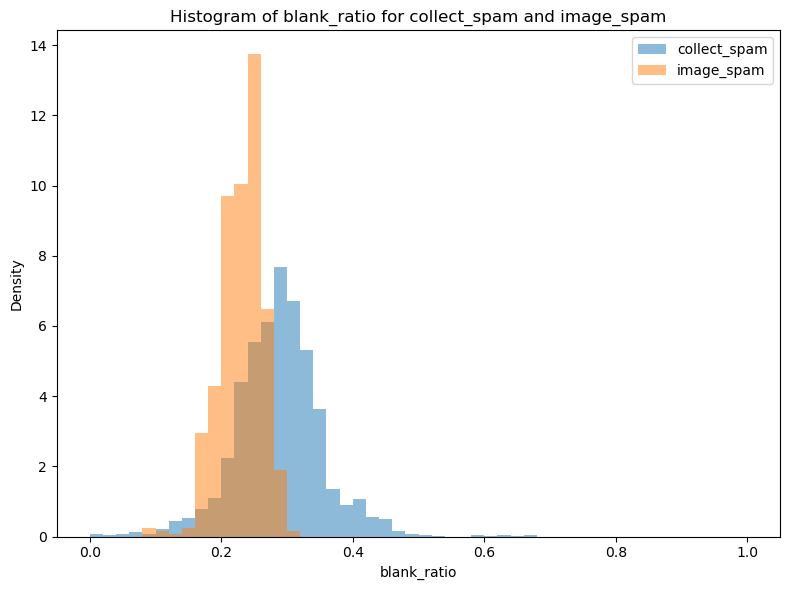

In [50]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_spam_heights, bins, _ = plt.hist(df[df['label'] == 'collect_spam']['blank_ratio'], bins=50, range=(0, 1), alpha=0.5, label='collect_spam', density=True)
image_spam_heights, _, _ = plt.hist(df[df['label'] == 'image_spam']['blank_ratio'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of blank_ratio for collect_spam and image_spam")
plt.xlabel("blank_ratio")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.36818695184951794


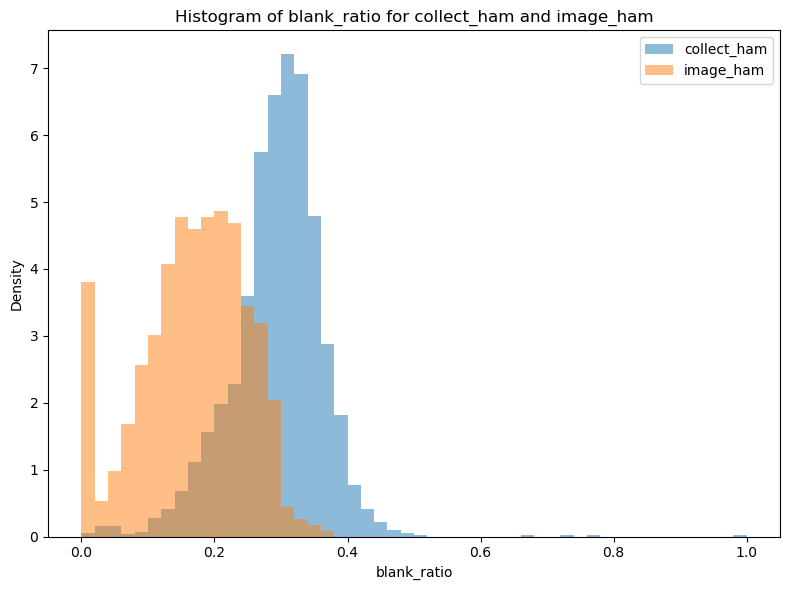

In [51]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_ham_heights, bins, _ = plt.hist(df[df['label'] == 'collect_ham']['blank_ratio'], bins=50, range=(0, 1), alpha=0.5, label='collect_ham', density=True)
image_ham_heights, _, _ = plt.hist(df[df['label'] == 'image_ham']['blank_ratio'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of blank_ratio for collect_ham and image_ham")
plt.xlabel("blank_ratio")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.7728143513351078


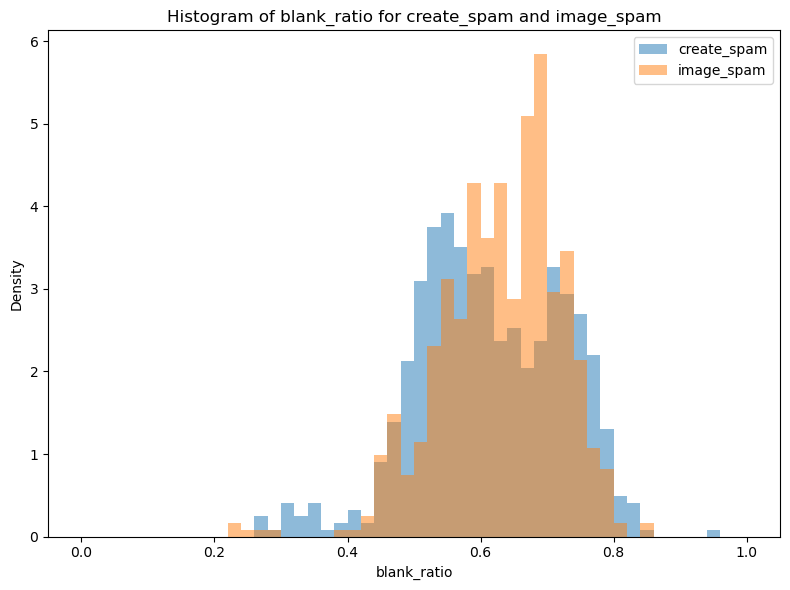

In [52]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_spam_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_spam']['blank_ratio'], bins=50, range=(0, 1), alpha=0.5, label='create_spam', density=True)
image_spam_heights, _, _ = plt.hist(df1[df1['label'] == 'image_spam']['blank_ratio'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of blank_ratio for create_spam and image_spam")
plt.xlabel("blank_ratio")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.3060080861771608


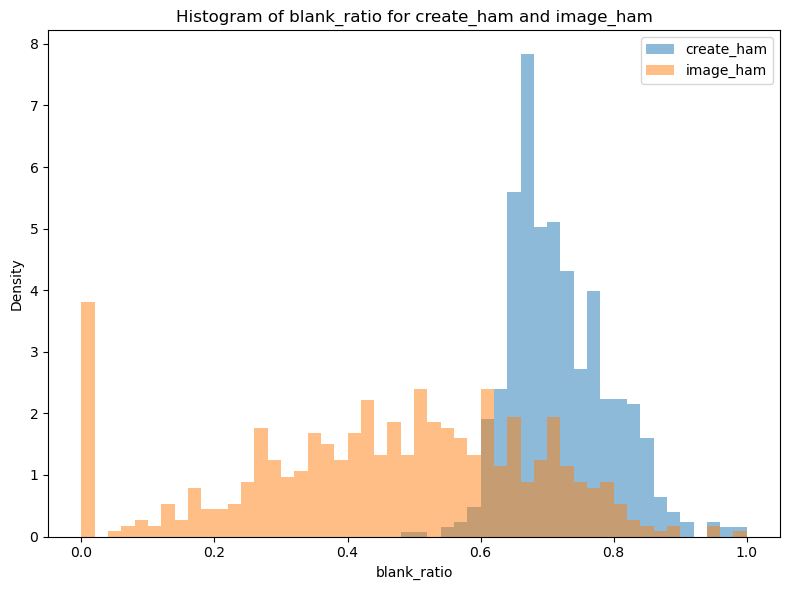

In [53]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_ham_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_ham']['blank_ratio'], bins=50, range=(0, 1), alpha=0.5, label='create_ham', density=True)
image_ham_heights, _, _ = plt.hist(df1[df1['label'] == 'image_ham']['blank_ratio'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of blank_ratio for create_ham and image_ham")
plt.xlabel("blank_ratio")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

## 개행문자 비율

In [54]:
# 개행문자의 비율을 반환하는 함수 정의
def ratio_crlf(text):
    crlf_count = text.count('\n')
    return crlf_count/len(text)

In [55]:
df['crlf_ratio'] = df['text'].apply(ratio_crlf)

In [56]:
df1['crlf_ratio'] = df1['text'].apply(ratio_crlf)

In [57]:
# crlf_ratio 열을 Min-Max 정규화하여 교체
df['crlf_ratio'] = minmax_normalize(df['crlf_ratio'])
df

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio,blank_ratio,crlf_ratio
0,"re : opportunities\nlloyd ,\nyes , i would be...",collect_ham,0.172217,0.106878,"[re, :, opportunities, lloyd, ,, yes, ,, i, wo...",0,0.000000,0.413615,0.095878
1,\nALERT\nHOT STOCK ALERT THIS ONE IS STILL CLI...,image_spam,0.029782,0.002265,"[ALERT, HOT, STOCK, ALERT, THIS, ONE, IS, STIL...",0,0.165854,0.248918,0.031359
2,\nFOXFIELD\nKirkby Stephen\nFirst\nGrange-over...,image_ham,0.016374,0.000000,"[FOXFIELD, Kirkby, Stephen, First, Grange-over...",0,0.160920,0.096833,0.224138
3,\nMATTHEW 9:4\nTHE\nHARVEST\n0A0\nplentiful\nB...,image_ham,0.055699,0.019384,"[MATTHEW, 9:4, THE, HARVEST, 0A0, plentiful, B...",0,0.050364,0.302589,0.039761
4,URL: http://boingboing.net/#85540997\nDate: No...,collect_ham,0.177169,0.074239,"[URL, :, http://boingboing.net/#85540997, Date...",3,0.060914,0.145397,0.038071
...,...,...,...,...,...,...,...,...,...
11648,you don _ t know how to get into search engin...,collect_spam,0.025990,0.000000,"[you, don, _, t, know, how, to, get, into, sea...",0,0.000000,0.407295,0.054732
11649,\npicture\nonly\n154\nweek\nBehind A Sorority'...,image_ham,0.036528,0.041667,"[picture, only, 154, week, Behind, A, Sorority...",0,0.166667,0.165609,0.192308
11650,\nWESTERN UNION TELEGRAPH\nAND CABLE OFFICE,image_ham,0.000000,0.000000,"[WESTERN, UNION, TELEGRAPH, AND, CABLE, OFFICE]",0,0.853659,0.164380,0.146341
11651,"all graphics software available , cheap oem v...",collect_spam,0.071229,0.183245,"[all, graphics, software, available, ,, cheap,...",0,0.000000,0.311885,0.092553


In [58]:
# crlf_ratio 열을 Min-Max 정규화하여 교체
df1['crlf_ratio'] = minmax_normalize(df1['crlf_ratio'])
df1

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio,blank_ratio,crlf_ratio
0,Subject: Expand Your Artistry: Mixed Media Mas...,create_spam,0.164780,0.000000,"[Subject, :, Expand, Your, Artistry, :, Mixed,...",0,0.067138,0.503887,0.084806
1,\nWE HAVE A RUNNER!\nCOULD THIS BE THE NEXT EX...,image_spam,0.183462,0.042918,"[WE, HAVE, A, RUNNER, !, COULD, THIS, BE, THE,...",0,0.215308,0.684406,0.030043
2,Subject: Incredible Savings Await You: Access ...,create_spam,0.422333,0.158491,"[Subject, :, Incredible, Savings, Await, You, ...",3,0.033962,0.347170,0.045283
3,\nDoctor Prescribed and Medically Supervised T...,image_spam,0.230734,0.031250,"[Doctor, Prescribed, and, Medically, Supervise...",2,0.148438,0.598958,0.085938
4,"\n""If you break your promise, you and your sol...",image_ham,0.174872,0.025000,"["", If, you, break, your, promise, ,, you, and...",0,0.037500,0.651667,0.075000
...,...,...,...,...,...,...,...,...,...
2407,\nBest stock Pick for this Year!\nGet ARSS Fir...,image_spam,0.225007,0.057901,"[Best, stock, Pick, for, this, Year, !, Get, A...",0,0.130277,0.699156,0.068758
2408,\nMarket Pulse List ARSS Among TOP FOUR Movers...,image_spam,0.221581,0.103672,"[Market, Pulse, List, ARSS, Among, TOP, FOUR, ...",0,0.110151,0.615983,0.071274
2409,"Hi Clever,\n\nI had an idea for Hans Project. ...",create_ham,0.233163,0.000000,"[Hi, Clever, ,, I, had, an, idea, for, Hans, P...",0,0.075000,0.862500,0.075000
2410,Subject: Cultivate Confidence: Empowerment Wor...,create_spam,0.177495,0.000000,"[Subject, :, Cultivate, Confidence, :, Empower...",0,0.051903,0.461592,0.103806


Overlapping area: 0.6246728794826358


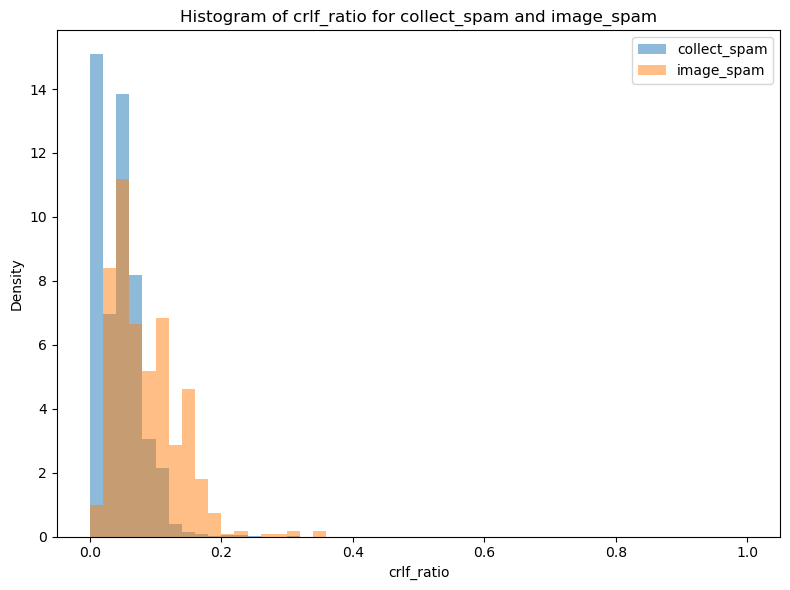

In [59]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_spam_heights, bins, _ = plt.hist(df[df['label'] == 'collect_spam']['crlf_ratio'], bins=50, range=(0, 1), alpha=0.5, label='collect_spam', density=True)
image_spam_heights, _, _ = plt.hist(df[df['label'] == 'image_spam']['crlf_ratio'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of crlf_ratio for collect_spam and image_spam")
plt.xlabel("crlf_ratio")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.23946257279499283


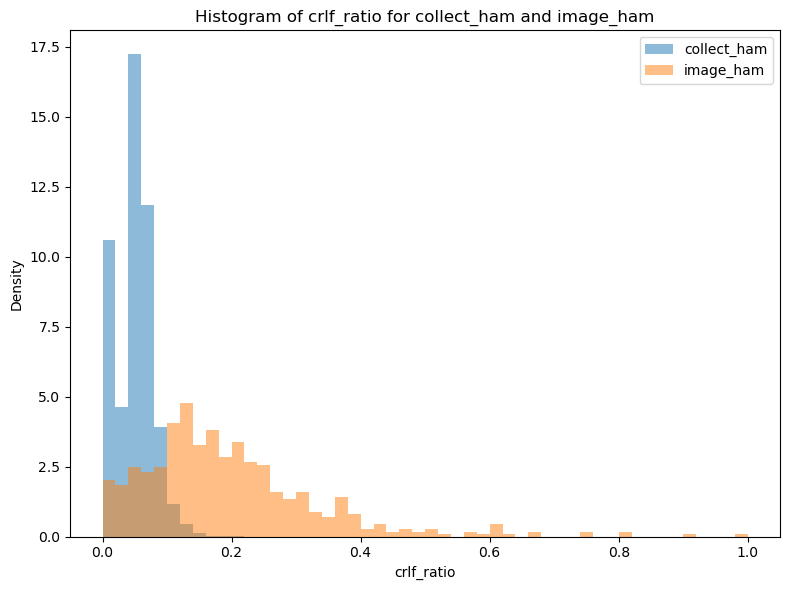

In [60]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_ham_heights, bins, _ = plt.hist(df[df['label'] == 'collect_ham']['crlf_ratio'], bins=50, range=(0, 1), alpha=0.5, label='collect_ham', density=True)
image_ham_heights, _, _ = plt.hist(df[df['label'] == 'image_ham']['crlf_ratio'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of crlf_ratio for collect_ham and image_ham")
plt.xlabel("crlf_ratio")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.40005473512492484


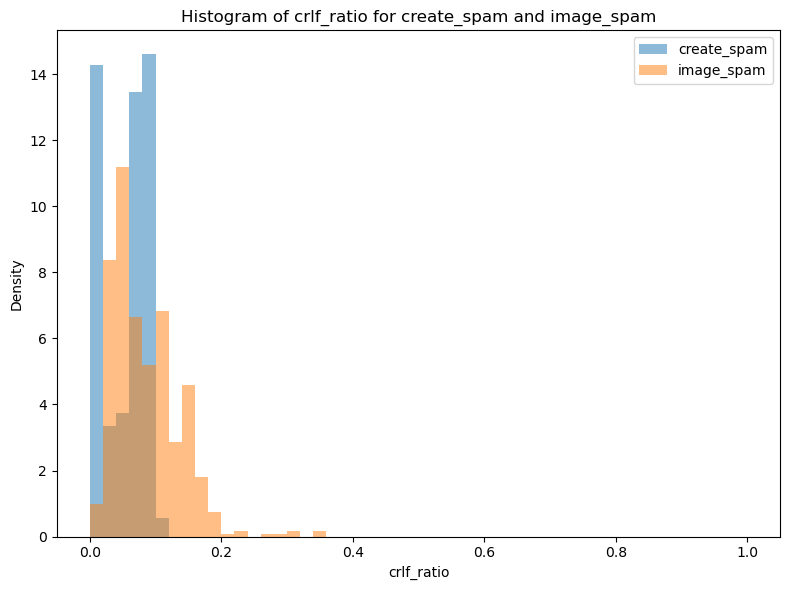

In [61]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_spam_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_spam']['crlf_ratio'], bins=50, range=(0, 1), alpha=0.5, label='create_spam', density=True)
image_spam_heights, _, _ = plt.hist(df1[df1['label'] == 'image_spam']['crlf_ratio'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of crlf_ratio for create_spam and image_spam")
plt.xlabel("crlf_ratio")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.2841245158189375


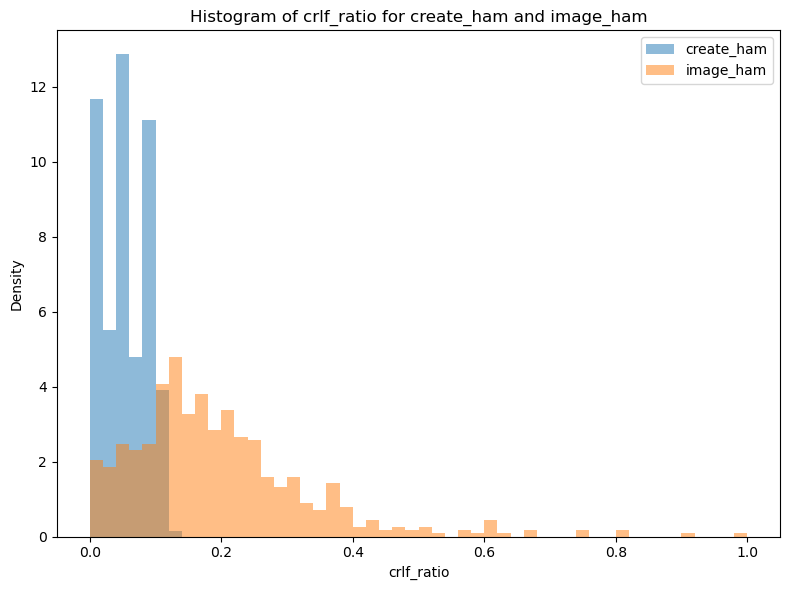

In [62]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_ham_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_ham']['crlf_ratio'], bins=50, range=(0, 1), alpha=0.5, label='create_ham', density=True)
image_ham_heights, _, _ = plt.hist(df1[df1['label'] == 'image_ham']['crlf_ratio'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of crlf_ratio for create_ham and image_ham")
plt.xlabel("crlf_ratio")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

## 품사 태깅 + 품사 비율

In [63]:
import nltk
from konlpy.tag import Twitter
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from collections import Counter

In [64]:
# nltk 데이터 다운로드 (한 번 실행 후 주석 처리해도 됨)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JAE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\JAE\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [65]:
# NLTK 품사 태깅 함수
def pos_tagging(text):
    words = word_tokenize(text)
    tagged_words = pos_tag(words)
    return tagged_words

# 품사별 비율 계산 함수
def calculate_pos_ratio(tagged_text):
    total_words = len(tagged_text)
    pos_counts = Counter(tag for word, tag in tagged_text)
    pos_ratios = {pos: count / total_words for pos, count in pos_counts.items()}
    return pos_ratios

In [66]:
# 각 행의 텍스트를 품사 태깅하고 품사별 비율 계산하여 새로운 칼럼 추가
df['pos_tagged'] = df['text'].apply(pos_tagging)
df['pos_ratios'] = df['pos_tagged'].apply(calculate_pos_ratio)
df

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio,blank_ratio,crlf_ratio,pos_tagged,pos_ratios
0,"re : opportunities\nlloyd ,\nyes , i would be...",collect_ham,0.172217,0.106878,"[re, :, opportunities, lloyd, ,, yes, ,, i, wo...",0,0.000000,0.413615,0.095878,"[(re, NN), (:, :), (opportunities, NNS), (lloy...","{'NN': 0.19699499165275458, ':': 0.17863105175..."
1,\nALERT\nHOT STOCK ALERT THIS ONE IS STILL CLI...,image_spam,0.029782,0.002265,"[ALERT, HOT, STOCK, ALERT, THIS, ONE, IS, STIL...",0,0.165854,0.248918,0.031359,"[(ALERT, NNP), (HOT, NNP), (STOCK, NNP), (ALER...","{'NNP': 0.352, ':': 0.024, '$': 0.004, 'CD': 0..."
2,\nFOXFIELD\nKirkby Stephen\nFirst\nGrange-over...,image_ham,0.016374,0.000000,"[FOXFIELD, Kirkby, Stephen, First, Grange-over...",0,0.160920,0.096833,0.224138,"[(FOXFIELD, NNP), (Kirkby, NNP), (Stephen, NNP...","{'NNP': 0.8260869565217391, 'RB': 0.0434782608..."
3,\nMATTHEW 9:4\nTHE\nHARVEST\n0A0\nplentiful\nB...,image_ham,0.055699,0.019384,"[MATTHEW, 9:4, THE, HARVEST, 0A0, plentiful, B...",0,0.050364,0.302589,0.039761,"[(MATTHEW, NNP), (9:4, CD), (THE, NNP), (HARVE...","{'NNP': 0.06896551724137931, 'CD': 0.020114942..."
4,URL: http://boingboing.net/#85540997\nDate: No...,collect_ham,0.177169,0.074239,"[URL, :, http://boingboing.net/#85540997, Date...",3,0.060914,0.145397,0.038071,"[(URL, NN), (:, :), (http, NN), (:, :), (//boi...","{'NN': 0.1917808219178082, ':': 0.082191780821..."
...,...,...,...,...,...,...,...,...,...,...,...
11648,you don _ t know how to get into search engin...,collect_spam,0.025990,0.000000,"[you, don, _, t, know, how, to, get, into, sea...",0,0.000000,0.407295,0.054732,"[(you, PRP), (don, VBP), (_, JJ), (t, NN), (kn...","{'PRP': 0.021929824561403508, 'VBP': 0.0175438..."
11649,\npicture\nonly\n154\nweek\nBehind A Sorority'...,image_ham,0.036528,0.041667,"[picture, only, 154, week, Behind, A, Sorority...",0,0.166667,0.165609,0.192308,"[(picture, NN), (only, RB), (154, CD), (week, ...","{'NN': 0.06818181818181818, 'RB': 0.0454545454..."
11650,\nWESTERN UNION TELEGRAPH\nAND CABLE OFFICE,image_ham,0.000000,0.000000,"[WESTERN, UNION, TELEGRAPH, AND, CABLE, OFFICE]",0,0.853659,0.164380,0.146341,"[(WESTERN, NNP), (UNION, NNP), (TELEGRAPH, NNP...",{'NNP': 1.0}
11651,"all graphics software available , cheap oem v...",collect_spam,0.071229,0.183245,"[all, graphics, software, available, ,, cheap,...",0,0.000000,0.311885,0.092553,"[(all, DT), (graphics, NNS), (software, NN), (...","{'DT': 0.009900990099009901, 'NNS': 0.02970297..."


In [67]:
# 각 행의 텍스트를 품사 태깅하고 품사별 비율 계산하여 새로운 칼럼 추가
df1['pos_tagged'] = df1['text'].apply(pos_tagging)
df1['pos_ratios'] = df1['pos_tagged'].apply(calculate_pos_ratio)
df1

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio,blank_ratio,crlf_ratio,pos_tagged,pos_ratios
0,Subject: Expand Your Artistry: Mixed Media Mas...,create_spam,0.164780,0.000000,"[Subject, :, Expand, Your, Artistry, :, Mixed,...",0,0.067138,0.503887,0.084806,"[(Subject, JJ), (:, :), (Expand, VB), (Your, P...","{'JJ': 0.1276595744680851, ':': 0.042553191489..."
1,\nWE HAVE A RUNNER!\nCOULD THIS BE THE NEXT EX...,image_spam,0.183462,0.042918,"[WE, HAVE, A, RUNNER, !, COULD, THIS, BE, THE,...",0,0.215308,0.684406,0.030043,"[(WE, WDT), (HAVE, VBP), (A, DT), (RUNNER, NN)...","{'WDT': 0.00749063670411985, 'VBP': 0.00374531..."
2,Subject: Incredible Savings Await You: Access ...,create_spam,0.422333,0.158491,"[Subject, :, Incredible, Savings, Await, You, ...",3,0.033962,0.347170,0.045283,"[(Subject, JJ), (:, :), (Incredible, JJ), (Sav...","{'JJ': 0.17647058823529413, ':': 0.11764705882..."
3,\nDoctor Prescribed and Medically Supervised T...,image_spam,0.230734,0.031250,"[Doctor, Prescribed, and, Medically, Supervise...",2,0.148438,0.598958,0.085938,"[(Doctor, NNP), (Prescribed, NNP), (and, CC), ...","{'NNP': 0.2777777777777778, 'CC': 0.0555555555..."
4,"\n""If you break your promise, you and your sol...",image_ham,0.174872,0.025000,"["", If, you, break, your, promise, ,, you, and...",0,0.037500,0.651667,0.075000,"[('', ''), (If, IN), (you, PRP), (break, VBP),...","{'''': 0.04081632653061224, 'IN': 0.0816326530..."
...,...,...,...,...,...,...,...,...,...,...,...
2407,\nBest stock Pick for this Year!\nGet ARSS Fir...,image_spam,0.225007,0.057901,"[Best, stock, Pick, for, this, Year, !, Get, A...",0,0.130277,0.699156,0.068758,"[(Best, NNP), (stock, NN), (Pick, NNP), (for, ...","{'NNP': 0.20903954802259886, 'NN': 0.118644067..."
2408,\nMarket Pulse List ARSS Among TOP FOUR Movers...,image_spam,0.221581,0.103672,"[Market, Pulse, List, ARSS, Among, TOP, FOUR, ...",0,0.110151,0.615983,0.071274,"[(Market, NN), (Pulse, NNP), (List, NNP), (ARS...","{'NN': 0.13259668508287292, 'NNP': 0.187845303..."
2409,"Hi Clever,\n\nI had an idea for Hans Project. ...",create_ham,0.233163,0.000000,"[Hi, Clever, ,, I, had, an, idea, for, Hans, P...",0,0.075000,0.862500,0.075000,"[(Hi, NNP), (Clever, NNP), (,, ,), (I, PRP), (...","{'NNP': 0.19047619047619047, ',': 0.0476190476..."
2410,Subject: Cultivate Confidence: Empowerment Wor...,create_spam,0.177495,0.000000,"[Subject, :, Cultivate, Confidence, :, Empower...",0,0.051903,0.461592,0.103806,"[(Subject, JJ), (:, :), (Cultivate, NN), (Conf...","{'JJ': 0.08888888888888889, ':': 0.04444444444..."


In [68]:
i = 0
lst_final = []

for tags in df['pos_tagged']:
    new_tags = []
    
    for word, pos_tag in tags:
        if pos_tag in ['NN','NNS','NNP','NNPS','VBG']:
            new_tags.append((word, 'Noun'))
        elif pos_tag in ['PRP','PRP$','WP','WP$']:
            new_tags.append((word, 'Pronoun'))
        elif pos_tag in ['MD', 'VB', 'VBD', 'VBN', 'VBP', 'VBZ']:
            new_tags.append((word, 'Verb'))
        elif pos_tag in ['JJ', 'JJR', 'JJS']:
            new_tags.append((word, 'Adjective'))
        elif pos_tag in ['RB','RBR','RBS','WRB']:
            new_tags.append((word, 'Adverb'))
        else:
            new_tags.append((word, pos_tag))
    lst_final.append(new_tags)
    i += 1

df['modified_pos_tagged'] = lst_final

In [69]:
i = 0
lst_final = []

for tags in df1['pos_tagged']:
    new_tags = []
    
    for word, pos_tag in tags:
        if pos_tag in ['NN','NNS','NNP','NNPS','VBG']:
            new_tags.append((word, 'Noun'))
        elif pos_tag in ['PRP','PRP$','WP','WP$']:
            new_tags.append((word, 'Pronoun'))
        elif pos_tag in ['MD', 'VB', 'VBD', 'VBN', 'VBP', 'VBZ']:
            new_tags.append((word, 'Verb'))
        elif pos_tag in ['JJ', 'JJR', 'JJS']:
            new_tags.append((word, 'Adjective'))
        elif pos_tag in ['RB','RBR','RBS','WRB']:
            new_tags.append((word, 'Adverb'))
        else:
            new_tags.append((word, pos_tag))
    lst_final.append(new_tags)
    i += 1

df1['modified_pos_tagged'] = lst_final

In [70]:
df['pos_ratios'] = df['modified_pos_tagged'].apply(calculate_pos_ratio)
df

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio,blank_ratio,crlf_ratio,pos_tagged,pos_ratios,modified_pos_tagged
0,"re : opportunities\nlloyd ,\nyes , i would be...",collect_ham,0.172217,0.106878,"[re, :, opportunities, lloyd, ,, yes, ,, i, wo...",0,0.000000,0.413615,0.095878,"[(re, NN), (:, :), (opportunities, NNS), (lloy...","{'Noun': 0.3589315525876461, ':': 0.1786310517...","[(re, Noun), (:, :), (opportunities, Noun), (l..."
1,\nALERT\nHOT STOCK ALERT THIS ONE IS STILL CLI...,image_spam,0.029782,0.002265,"[ALERT, HOT, STOCK, ALERT, THIS, ONE, IS, STIL...",0,0.165854,0.248918,0.031359,"[(ALERT, NNP), (HOT, NNP), (STOCK, NNP), (ALER...","{'Noun': 0.5, ':': 0.024, '$': 0.004, 'CD': 0....","[(ALERT, Noun), (HOT, Noun), (STOCK, Noun), (A..."
2,\nFOXFIELD\nKirkby Stephen\nFirst\nGrange-over...,image_ham,0.016374,0.000000,"[FOXFIELD, Kirkby, Stephen, First, Grange-over...",0,0.160920,0.096833,0.224138,"[(FOXFIELD, NNP), (Kirkby, NNP), (Stephen, NNP...","{'Noun': 0.8260869565217391, 'Adverb': 0.04347...","[(FOXFIELD, Noun), (Kirkby, Noun), (Stephen, N..."
3,\nMATTHEW 9:4\nTHE\nHARVEST\n0A0\nplentiful\nB...,image_ham,0.055699,0.019384,"[MATTHEW, 9:4, THE, HARVEST, 0A0, plentiful, B...",0,0.050364,0.302589,0.039761,"[(MATTHEW, NNP), (9:4, CD), (THE, NNP), (HARVE...","{'Noun': 0.22988505747126436, 'CD': 0.02011494...","[(MATTHEW, Noun), (9:4, CD), (THE, Noun), (HAR..."
4,URL: http://boingboing.net/#85540997\nDate: No...,collect_ham,0.177169,0.074239,"[URL, :, http://boingboing.net/#85540997, Date...",3,0.060914,0.145397,0.038071,"[(URL, NN), (:, :), (http, NN), (:, :), (//boi...","{'Noun': 0.3972602739726027, ':': 0.0821917808...","[(URL, Noun), (:, :), (http, Noun), (:, :), (/..."
...,...,...,...,...,...,...,...,...,...,...,...,...
11648,you don _ t know how to get into search engin...,collect_spam,0.025990,0.000000,"[you, don, _, t, know, how, to, get, into, sea...",0,0.000000,0.407295,0.054732,"[(you, PRP), (don, VBP), (_, JJ), (t, NN), (kn...","{'Pronoun': 0.06578947368421052, 'Verb': 0.092...","[(you, Pronoun), (don, Verb), (_, Adjective), ..."
11649,\npicture\nonly\n154\nweek\nBehind A Sorority'...,image_ham,0.036528,0.041667,"[picture, only, 154, week, Behind, A, Sorority...",0,0.166667,0.165609,0.192308,"[(picture, NN), (only, RB), (154, CD), (week, ...","{'Noun': 0.5909090909090909, 'Adverb': 0.04545...","[(picture, Noun), (only, Adverb), (154, CD), (..."
11650,\nWESTERN UNION TELEGRAPH\nAND CABLE OFFICE,image_ham,0.000000,0.000000,"[WESTERN, UNION, TELEGRAPH, AND, CABLE, OFFICE]",0,0.853659,0.164380,0.146341,"[(WESTERN, NNP), (UNION, NNP), (TELEGRAPH, NNP...",{'Noun': 1.0},"[(WESTERN, Noun), (UNION, Noun), (TELEGRAPH, N..."
11651,"all graphics software available , cheap oem v...",collect_spam,0.071229,0.183245,"[all, graphics, software, available, ,, cheap,...",0,0.000000,0.311885,0.092553,"[(all, DT), (graphics, NNS), (software, NN), (...","{'DT': 0.009900990099009901, 'Noun': 0.3069306...","[(all, DT), (graphics, Noun), (software, Noun)..."


In [71]:
df1['pos_ratios'] = df1['modified_pos_tagged'].apply(calculate_pos_ratio)
df1

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio,blank_ratio,crlf_ratio,pos_tagged,pos_ratios,modified_pos_tagged
0,Subject: Expand Your Artistry: Mixed Media Mas...,create_spam,0.164780,0.000000,"[Subject, :, Expand, Your, Artistry, :, Mixed,...",0,0.067138,0.503887,0.084806,"[(Subject, JJ), (:, :), (Expand, VB), (Your, P...","{'Adjective': 0.1276595744680851, ':': 0.04255...","[(Subject, Adjective), (:, :), (Expand, Verb),..."
1,\nWE HAVE A RUNNER!\nCOULD THIS BE THE NEXT EX...,image_spam,0.183462,0.042918,"[WE, HAVE, A, RUNNER, !, COULD, THIS, BE, THE,...",0,0.215308,0.684406,0.030043,"[(WE, WDT), (HAVE, VBP), (A, DT), (RUNNER, NN)...","{'WDT': 0.00749063670411985, 'Verb': 0.1048689...","[(WE, WDT), (HAVE, Verb), (A, DT), (RUNNER, No..."
2,Subject: Incredible Savings Await You: Access ...,create_spam,0.422333,0.158491,"[Subject, :, Incredible, Savings, Await, You, ...",3,0.033962,0.347170,0.045283,"[(Subject, JJ), (:, :), (Incredible, JJ), (Sav...","{'Adjective': 0.17647058823529413, ':': 0.1176...","[(Subject, Adjective), (:, :), (Incredible, Ad..."
3,\nDoctor Prescribed and Medically Supervised T...,image_spam,0.230734,0.031250,"[Doctor, Prescribed, and, Medically, Supervise...",2,0.148438,0.598958,0.085938,"[(Doctor, NNP), (Prescribed, NNP), (and, CC), ...","{'Noun': 0.4444444444444444, 'CC': 0.055555555...","[(Doctor, Noun), (Prescribed, Noun), (and, CC)..."
4,"\n""If you break your promise, you and your sol...",image_ham,0.174872,0.025000,"["", If, you, break, your, promise, ,, you, and...",0,0.037500,0.651667,0.075000,"[('', ''), (If, IN), (you, PRP), (break, VBP),...","{'''': 0.04081632653061224, 'IN': 0.0816326530...","[('', ''), (If, IN), (you, Pronoun), (break, V..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2407,\nBest stock Pick for this Year!\nGet ARSS Fir...,image_spam,0.225007,0.057901,"[Best, stock, Pick, for, this, Year, !, Get, A...",0,0.130277,0.699156,0.068758,"[(Best, NNP), (stock, NN), (Pick, NNP), (for, ...","{'Noun': 0.3672316384180791, 'IN': 0.073446327...","[(Best, Noun), (stock, Noun), (Pick, Noun), (f..."
2408,\nMarket Pulse List ARSS Among TOP FOUR Movers...,image_spam,0.221581,0.103672,"[Market, Pulse, List, ARSS, Among, TOP, FOUR, ...",0,0.110151,0.615983,0.071274,"[(Market, NN), (Pulse, NNP), (List, NNP), (ARS...","{'Noun': 0.3701657458563536, 'IN': 0.066298342...","[(Market, Noun), (Pulse, Noun), (List, Noun), ..."
2409,"Hi Clever,\n\nI had an idea for Hans Project. ...",create_ham,0.233163,0.000000,"[Hi, Clever, ,, I, had, an, idea, for, Hans, P...",0,0.075000,0.862500,0.075000,"[(Hi, NNP), (Clever, NNP), (,, ,), (I, PRP), (...","{'Noun': 0.23809523809523808, ',': 0.047619047...","[(Hi, Noun), (Clever, Noun), (,, ,), (I, Prono..."
2410,Subject: Cultivate Confidence: Empowerment Wor...,create_spam,0.177495,0.000000,"[Subject, :, Cultivate, Confidence, :, Empower...",0,0.051903,0.461592,0.103806,"[(Subject, JJ), (:, :), (Cultivate, NN), (Conf...","{'Adjective': 0.08888888888888889, ':': 0.0444...","[(Subject, Adjective), (:, :), (Cultivate, Nou..."


In [72]:
l1 = []
for d in df['pos_ratios']:
    l1.append(d.get('Noun',0))
    
df['Noun'] = pd.DataFrame(l1)

l2 = []
for d in df['pos_ratios']:
    l2.append(d.get('Pronoun',0))

df['Pronoun'] = pd.DataFrame(l2)

l3 = []
for d in df['pos_ratios']:
    l3.append(d.get('Verb',0))
    
df['Verb'] = pd.DataFrame(l3)

l4 = []
for d in df['pos_ratios']:
    l4.append(d.get('Adjective',0))
    
df['Adjective'] = pd.DataFrame(l4)

l5 = []
for d in df['pos_ratios']:
    l5.append(d.get('Adverb',0))
    
df['Adverb'] = pd.DataFrame(l5)
df

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio,blank_ratio,crlf_ratio,pos_tagged,pos_ratios,modified_pos_tagged,Noun,Pronoun,Verb,Adjective,Adverb
0,"re : opportunities\nlloyd ,\nyes , i would be...",collect_ham,0.172217,0.106878,"[re, :, opportunities, lloyd, ,, yes, ,, i, wo...",0,0.000000,0.413615,0.095878,"[(re, NN), (:, :), (opportunities, NNS), (lloy...","{'Noun': 0.3589315525876461, ':': 0.1786310517...","[(re, Noun), (:, :), (opportunities, Noun), (l...",0.358932,0.020033,0.091820,0.051753,0.011686
1,\nALERT\nHOT STOCK ALERT THIS ONE IS STILL CLI...,image_spam,0.029782,0.002265,"[ALERT, HOT, STOCK, ALERT, THIS, ONE, IS, STIL...",0,0.165854,0.248918,0.031359,"[(ALERT, NNP), (HOT, NNP), (STOCK, NNP), (ALER...","{'Noun': 0.5, ':': 0.024, '$': 0.004, 'CD': 0....","[(ALERT, Noun), (HOT, Noun), (STOCK, Noun), (A...",0.500000,0.020000,0.084000,0.076000,0.020000
2,\nFOXFIELD\nKirkby Stephen\nFirst\nGrange-over...,image_ham,0.016374,0.000000,"[FOXFIELD, Kirkby, Stephen, First, Grange-over...",0,0.160920,0.096833,0.224138,"[(FOXFIELD, NNP), (Kirkby, NNP), (Stephen, NNP...","{'Noun': 0.8260869565217391, 'Adverb': 0.04347...","[(FOXFIELD, Noun), (Kirkby, Noun), (Stephen, N...",0.826087,0.000000,0.043478,0.000000,0.043478
3,\nMATTHEW 9:4\nTHE\nHARVEST\n0A0\nplentiful\nB...,image_ham,0.055699,0.019384,"[MATTHEW, 9:4, THE, HARVEST, 0A0, plentiful, B...",0,0.050364,0.302589,0.039761,"[(MATTHEW, NNP), (9:4, CD), (THE, NNP), (HARVE...","{'Noun': 0.22988505747126436, 'CD': 0.02011494...","[(MATTHEW, Noun), (9:4, CD), (THE, Noun), (HAR...",0.229885,0.112069,0.163793,0.028736,0.034483
4,URL: http://boingboing.net/#85540997\nDate: No...,collect_ham,0.177169,0.074239,"[URL, :, http://boingboing.net/#85540997, Date...",3,0.060914,0.145397,0.038071,"[(URL, NN), (:, :), (http, NN), (:, :), (//boi...","{'Noun': 0.3972602739726027, ':': 0.0821917808...","[(URL, Noun), (:, :), (http, Noun), (:, :), (/...",0.397260,0.000000,0.109589,0.068493,0.013699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11648,you don _ t know how to get into search engin...,collect_spam,0.025990,0.000000,"[you, don, _, t, know, how, to, get, into, sea...",0,0.000000,0.407295,0.054732,"[(you, PRP), (don, VBP), (_, JJ), (t, NN), (kn...","{'Pronoun': 0.06578947368421052, 'Verb': 0.092...","[(you, Pronoun), (don, Verb), (_, Adjective), ...",0.600877,0.065789,0.092105,0.057018,0.026316
11649,\npicture\nonly\n154\nweek\nBehind A Sorority'...,image_ham,0.036528,0.041667,"[picture, only, 154, week, Behind, A, Sorority...",0,0.166667,0.165609,0.192308,"[(picture, NN), (only, RB), (154, CD), (week, ...","{'Noun': 0.5909090909090909, 'Adverb': 0.04545...","[(picture, Noun), (only, Adverb), (154, CD), (...",0.590909,0.000000,0.045455,0.022727,0.045455
11650,\nWESTERN UNION TELEGRAPH\nAND CABLE OFFICE,image_ham,0.000000,0.000000,"[WESTERN, UNION, TELEGRAPH, AND, CABLE, OFFICE]",0,0.853659,0.164380,0.146341,"[(WESTERN, NNP), (UNION, NNP), (TELEGRAPH, NNP...",{'Noun': 1.0},"[(WESTERN, Noun), (UNION, Noun), (TELEGRAPH, N...",1.000000,0.000000,0.000000,0.000000,0.000000
11651,"all graphics software available , cheap oem v...",collect_spam,0.071229,0.183245,"[all, graphics, software, available, ,, cheap,...",0,0.000000,0.311885,0.092553,"[(all, DT), (graphics, NNS), (software, NN), (...","{'DT': 0.009900990099009901, 'Noun': 0.3069306...","[(all, DT), (graphics, Noun), (software, Noun)...",0.306931,0.009901,0.039604,0.113861,0.004950


In [73]:
l1 = []
for d in df1['pos_ratios']:
    l1.append(d.get('Noun',0))
    
df1['Noun'] = pd.DataFrame(l1)

l2 = []
for d in df1['pos_ratios']:
    l2.append(d.get('Pronoun',0))

df1['Pronoun'] = pd.DataFrame(l2)

l3 = []
for d in df1['pos_ratios']:
    l3.append(d.get('Verb',0))
    
df1['Verb'] = pd.DataFrame(l3)

l4 = []
for d in df1['pos_ratios']:
    l4.append(d.get('Adjective',0))
    
df1['Adjective'] = pd.DataFrame(l4)

l5 = []
for d in df1['pos_ratios']:
    l5.append(d.get('Adverb',0))
    
df1['Adverb'] = pd.DataFrame(l5)
df1

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio,blank_ratio,crlf_ratio,pos_tagged,pos_ratios,modified_pos_tagged,Noun,Pronoun,Verb,Adjective,Adverb
0,Subject: Expand Your Artistry: Mixed Media Mas...,create_spam,0.164780,0.000000,"[Subject, :, Expand, Your, Artistry, :, Mixed,...",0,0.067138,0.503887,0.084806,"[(Subject, JJ), (:, :), (Expand, VB), (Your, P...","{'Adjective': 0.1276595744680851, ':': 0.04255...","[(Subject, Adjective), (:, :), (Expand, Verb),...",0.446809,0.085106,0.063830,0.127660,0.000000
1,\nWE HAVE A RUNNER!\nCOULD THIS BE THE NEXT EX...,image_spam,0.183462,0.042918,"[WE, HAVE, A, RUNNER, !, COULD, THIS, BE, THE,...",0,0.215308,0.684406,0.030043,"[(WE, WDT), (HAVE, VBP), (A, DT), (RUNNER, NN)...","{'WDT': 0.00749063670411985, 'Verb': 0.1048689...","[(WE, WDT), (HAVE, Verb), (A, DT), (RUNNER, No...",0.479401,0.003745,0.104869,0.044944,0.000000
2,Subject: Incredible Savings Await You: Access ...,create_spam,0.422333,0.158491,"[Subject, :, Incredible, Savings, Await, You, ...",3,0.033962,0.347170,0.045283,"[(Subject, JJ), (:, :), (Incredible, JJ), (Sav...","{'Adjective': 0.17647058823529413, ':': 0.1176...","[(Subject, Adjective), (:, :), (Incredible, Ad...",0.294118,0.117647,0.147059,0.176471,0.000000
3,\nDoctor Prescribed and Medically Supervised T...,image_spam,0.230734,0.031250,"[Doctor, Prescribed, and, Medically, Supervise...",2,0.148438,0.598958,0.085938,"[(Doctor, NNP), (Prescribed, NNP), (and, CC), ...","{'Noun': 0.4444444444444444, 'CC': 0.055555555...","[(Doctor, Noun), (Prescribed, Noun), (and, CC)...",0.444444,0.027778,0.097222,0.055556,0.027778
4,"\n""If you break your promise, you and your sol...",image_ham,0.174872,0.025000,"["", If, you, break, your, promise, ,, you, and...",0,0.037500,0.651667,0.075000,"[('', ''), (If, IN), (you, PRP), (break, VBP),...","{'''': 0.04081632653061224, 'IN': 0.0816326530...","[('', ''), (If, IN), (you, Pronoun), (break, V...",0.244898,0.163265,0.163265,0.020408,0.040816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407,\nBest stock Pick for this Year!\nGet ARSS Fir...,image_spam,0.225007,0.057901,"[Best, stock, Pick, for, this, Year, !, Get, A...",0,0.130277,0.699156,0.068758,"[(Best, NNP), (stock, NN), (Pick, NNP), (for, ...","{'Noun': 0.3672316384180791, 'IN': 0.073446327...","[(Best, Noun), (stock, Noun), (Pick, Noun), (f...",0.367232,0.056497,0.112994,0.050847,0.039548
2408,\nMarket Pulse List ARSS Among TOP FOUR Movers...,image_spam,0.221581,0.103672,"[Market, Pulse, List, ARSS, Among, TOP, FOUR, ...",0,0.110151,0.615983,0.071274,"[(Market, NN), (Pulse, NNP), (List, NNP), (ARS...","{'Noun': 0.3701657458563536, 'IN': 0.066298342...","[(Market, Noun), (Pulse, Noun), (List, Noun), ...",0.370166,0.022099,0.093923,0.093923,0.005525
2409,"Hi Clever,\n\nI had an idea for Hans Project. ...",create_ham,0.233163,0.000000,"[Hi, Clever, ,, I, had, an, idea, for, Hans, P...",0,0.075000,0.862500,0.075000,"[(Hi, NNP), (Clever, NNP), (,, ,), (I, PRP), (...","{'Noun': 0.23809523809523808, ',': 0.047619047...","[(Hi, Noun), (Clever, Noun), (,, ,), (I, Prono...",0.238095,0.142857,0.238095,0.000000,0.000000
2410,Subject: Cultivate Confidence: Empowerment Wor...,create_spam,0.177495,0.000000,"[Subject, :, Cultivate, Confidence, :, Empower...",0,0.051903,0.461592,0.103806,"[(Subject, JJ), (:, :), (Cultivate, NN), (Conf...","{'Adjective': 0.08888888888888889, ':': 0.0444...","[(Subject, Adjective), (:, :), (Cultivate, Nou...",0.422222,0.088889,0.066667,0.088889,0.000000


### 명사 Noun

Overlapping area: 0.4933285682968267


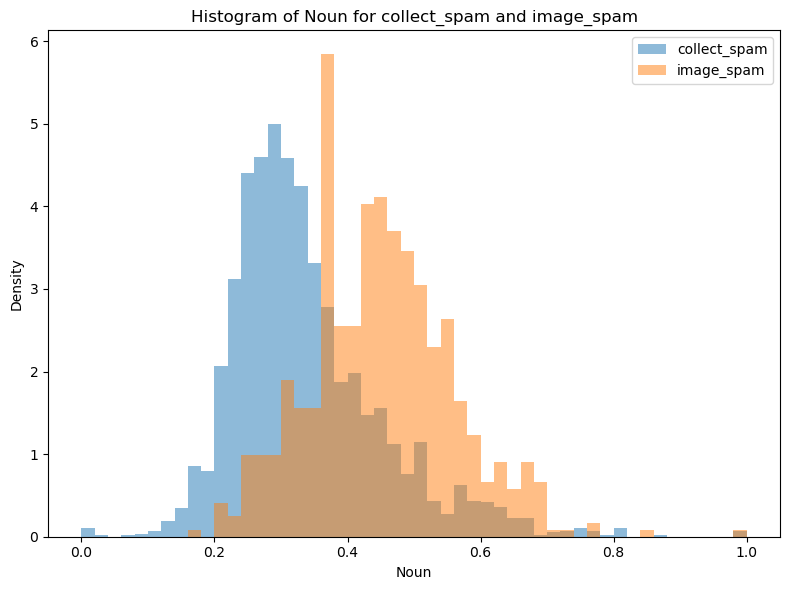

In [74]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_spam_heights, bins, _ = plt.hist(df[df['label'] == 'collect_spam']['Noun'], bins=50, range=(0, 1), alpha=0.5, label='collect_spam', density=True)
image_spam_heights, _, _ = plt.hist(df[df['label'] == 'image_spam']['Noun'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of Noun for collect_spam and image_spam")
plt.xlabel("Noun")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.23927139556334873


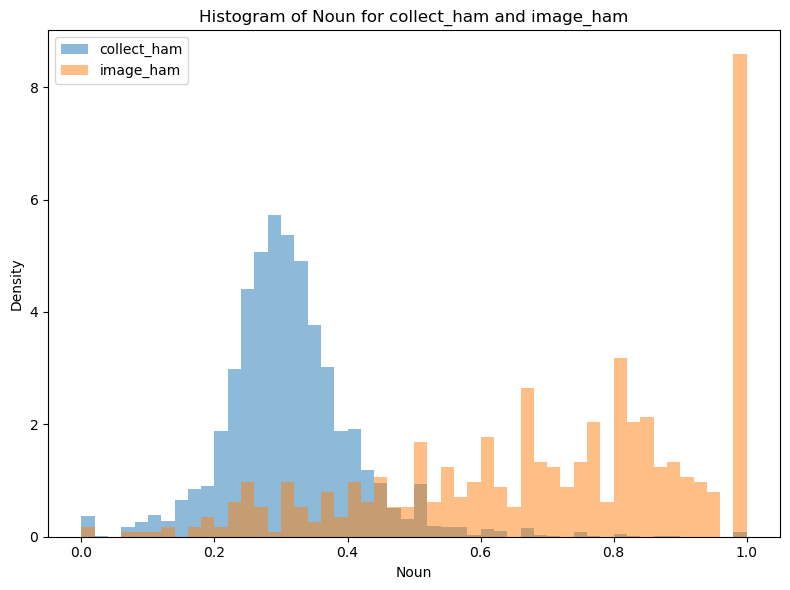

In [75]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_ham_heights, bins, _ = plt.hist(df[df['label'] == 'collect_ham']['Noun'], bins=50, range=(0, 1), alpha=0.5, label='collect_ham', density=True)
image_ham_heights, _, _ = plt.hist(df[df['label'] == 'image_ham']['Noun'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of Noun for collect_ham and image_ham")
plt.xlabel("Noun")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.5797415643513351


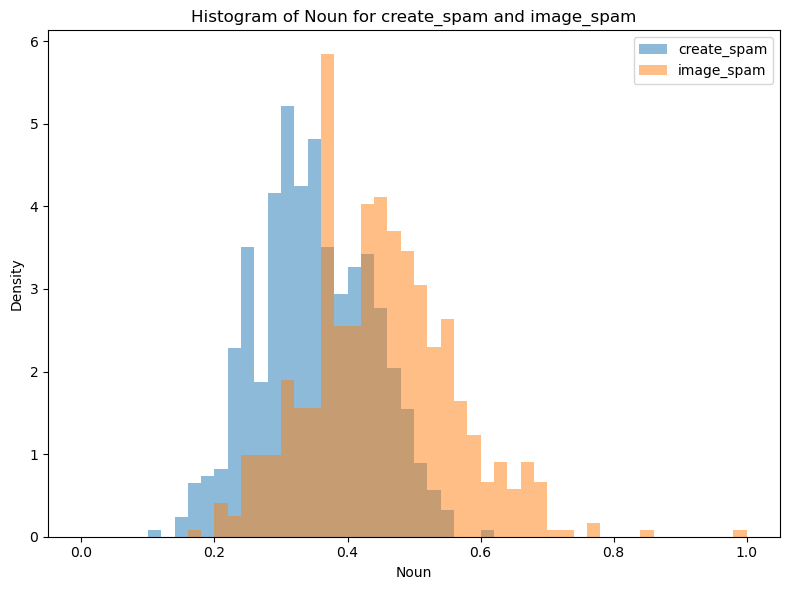

In [76]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_spam_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_spam']['Noun'], bins=50, range=(0, 1), alpha=0.5, label='create_spam', density=True)
image_spam_heights, _, _ = plt.hist(df1[df1['label'] == 'image_spam']['Noun'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of Noun for create_spam and image_spam")
plt.xlabel("Noun")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.17971387373123354


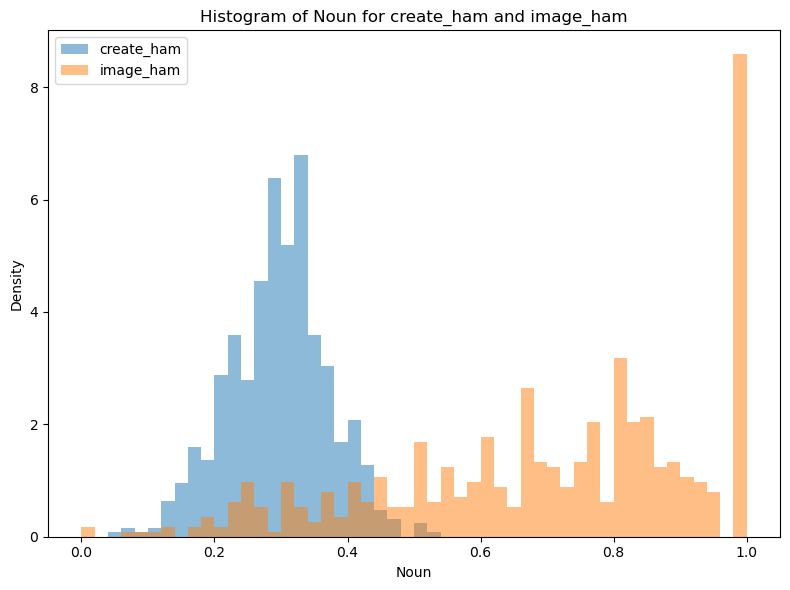

In [77]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_ham_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_ham']['Noun'], bins=50, range=(0, 1), alpha=0.5, label='create_ham', density=True)
image_ham_heights, _, _ = plt.hist(df1[df1['label'] == 'image_ham']['Noun'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of Noun for create_ham and image_ham")
plt.xlabel("Noun")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

### 대명사 Pronoun

Overlapping area: 0.49925612908529565


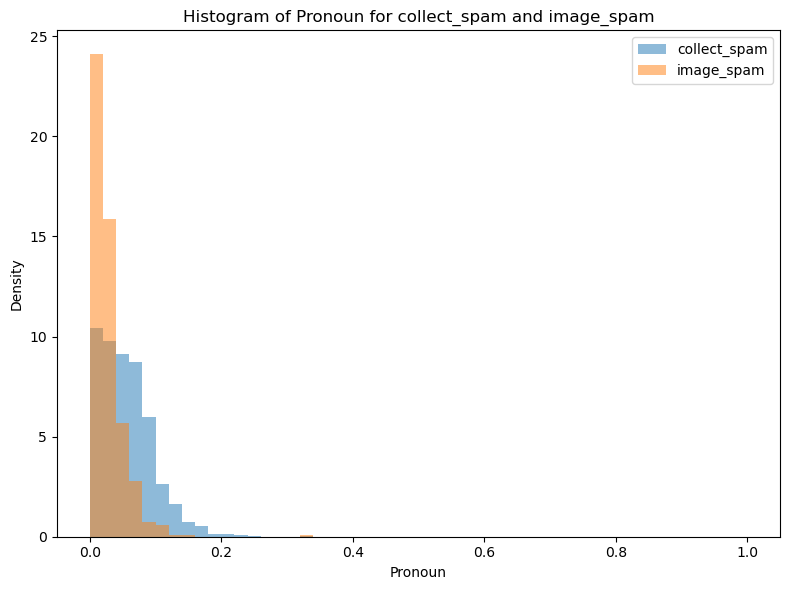

In [78]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_spam_heights, bins, _ = plt.hist(df[df['label'] == 'collect_spam']['Pronoun'], bins=50, range=(0, 1), alpha=0.5, label='collect_spam', density=True)
image_spam_heights, _, _ = plt.hist(df[df['label'] == 'image_spam']['Pronoun'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of Pronoun for collect_spam and image_spam")
plt.xlabel("Pronoun")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.2897945453604513


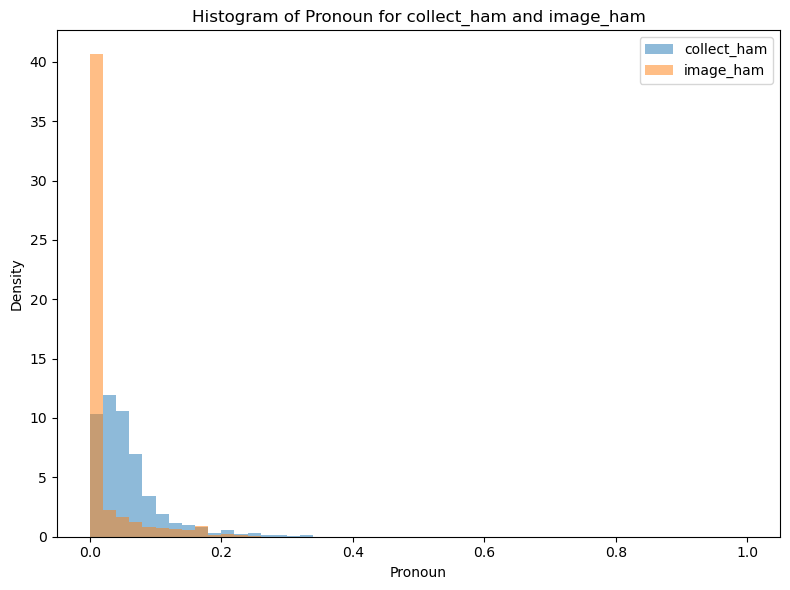

In [79]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_ham_heights, bins, _ = plt.hist(df[df['label'] == 'collect_ham']['Pronoun'], bins=50, range=(0, 1), alpha=0.5, label='collect_ham', density=True)
image_ham_heights, _, _ = plt.hist(df[df['label'] == 'image_ham']['Pronoun'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of Pronoun for collect_ham and image_ham")
plt.xlabel("Pronoun")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.3164682965570534


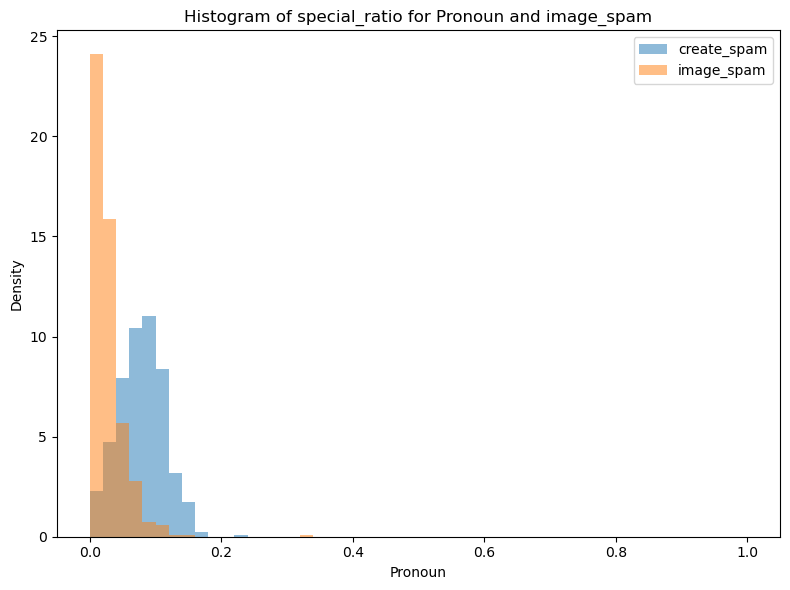

In [80]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_spam_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_spam']['Pronoun'], bins=50, range=(0, 1), alpha=0.5, label='create_spam', density=True)
image_spam_heights, _, _ = plt.hist(df1[df1['label'] == 'image_spam']['Pronoun'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of special_ratio for Pronoun and image_spam")
plt.xlabel("Pronoun")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.17211682546863075


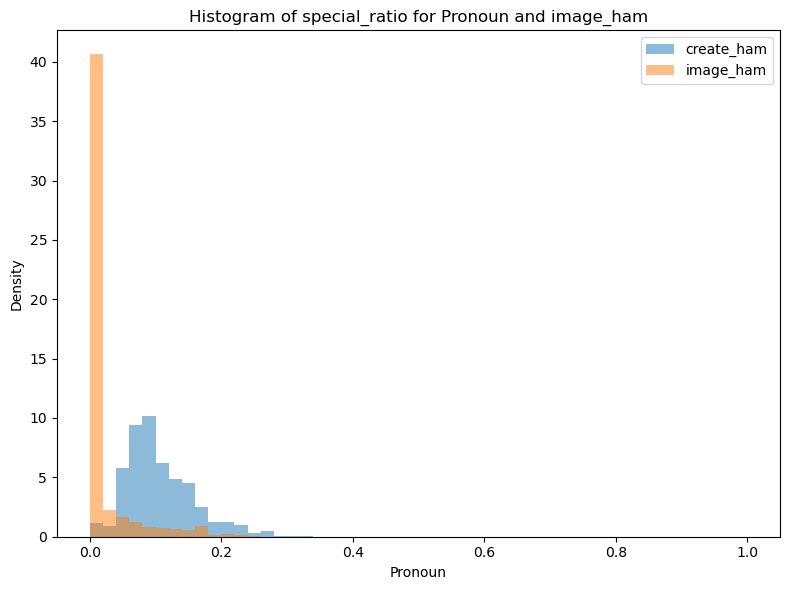

In [81]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_ham_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_ham']['Pronoun'], bins=50, range=(0, 1), alpha=0.5, label='create_ham', density=True)
image_ham_heights, _, _ = plt.hist(df1[df1['label'] == 'image_ham']['Pronoun'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of special_ratio for Pronoun and image_ham")
plt.xlabel("Pronoun")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

### 동사 Verb

Overlapping area: 0.6806567301192934


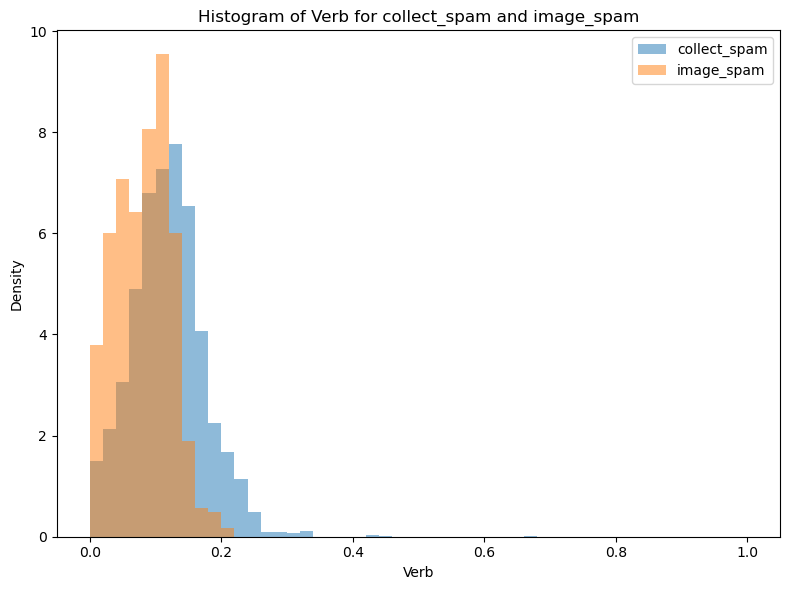

In [82]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_spam_heights, bins, _ = plt.hist(df[df['label'] == 'collect_spam']['Verb'], bins=50, range=(0, 1), alpha=0.5, label='collect_spam', density=True)
image_spam_heights, _, _ = plt.hist(df[df['label'] == 'image_spam']['Verb'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of Verb for collect_spam and image_spam")
plt.xlabel("Verb")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.3396236122146421


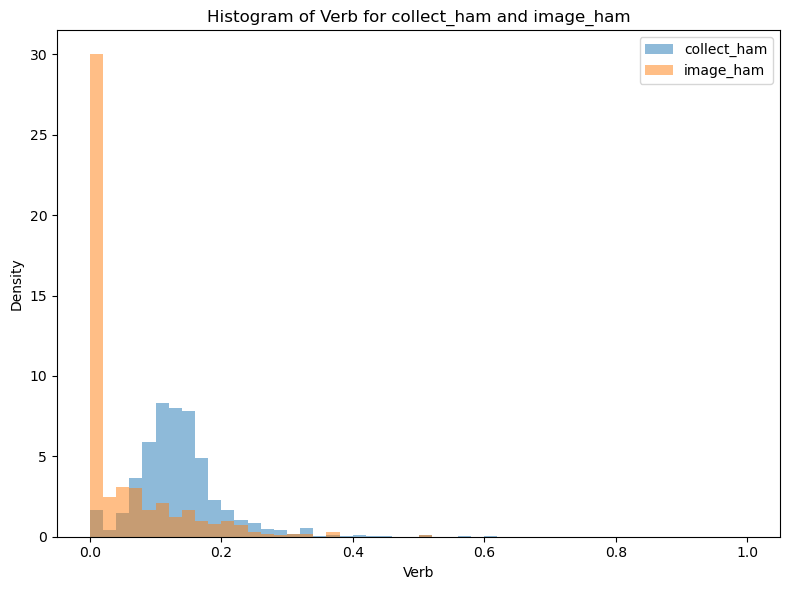

In [83]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_ham_heights, bins, _ = plt.hist(df[df['label'] == 'collect_ham']['Verb'], bins=50, range=(0, 1), alpha=0.5, label='collect_ham', density=True)
image_ham_heights, _, _ = plt.hist(df[df['label'] == 'image_ham']['Verb'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of Verb for collect_ham and image_ham")
plt.xlabel("Verb")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.7064506954580578


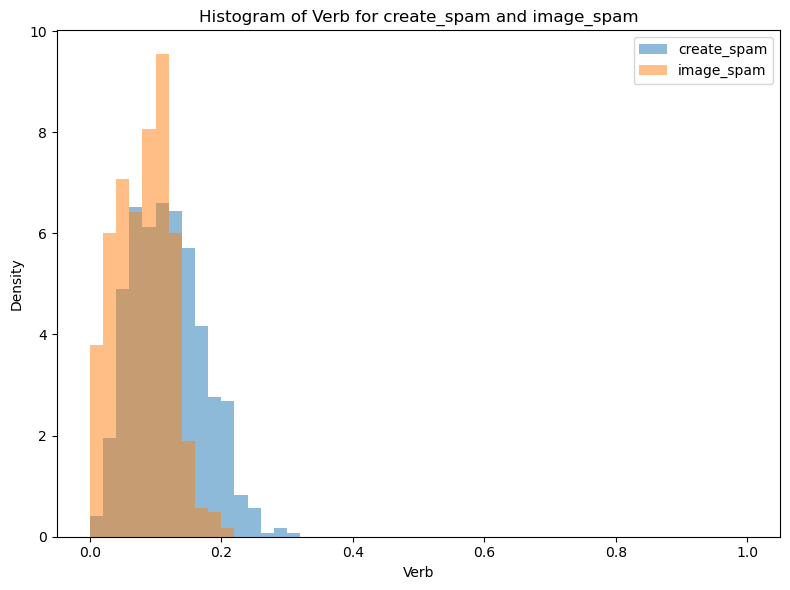

In [84]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_spam_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_spam']['Verb'], bins=50, range=(0, 1), alpha=0.5, label='create_spam', density=True)
image_spam_heights, _, _ = plt.hist(df1[df1['label'] == 'image_spam']['Verb'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of Verb for create_spam and image_spam")
plt.xlabel("Verb")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.33556504283412025


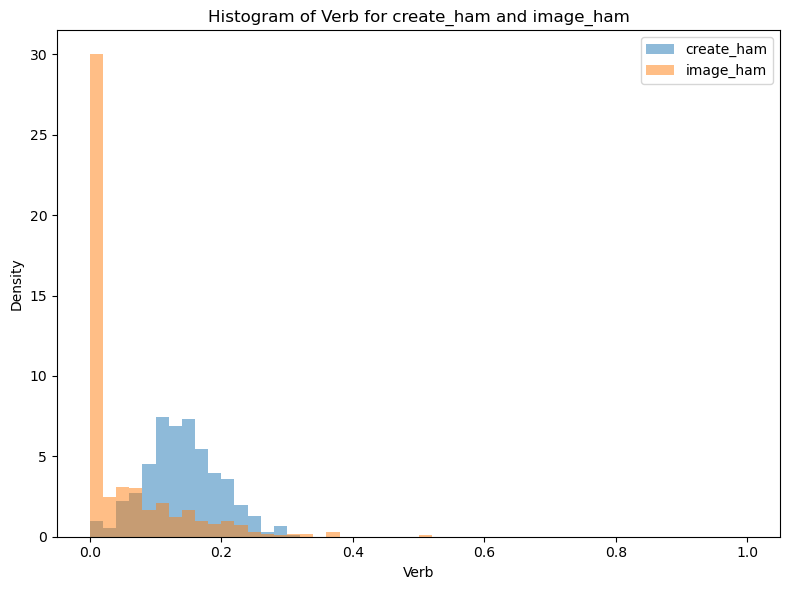

In [85]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_ham_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_ham']['Verb'], bins=50, range=(0, 1), alpha=0.5, label='create_ham', density=True)
image_ham_heights, _, _ = plt.hist(df1[df1['label'] == 'image_ham']['Verb'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of Verb for create_ham and image_ham")
plt.xlabel("Verb")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

### 형용사 Adjective

Overlapping area: 0.524151541862292


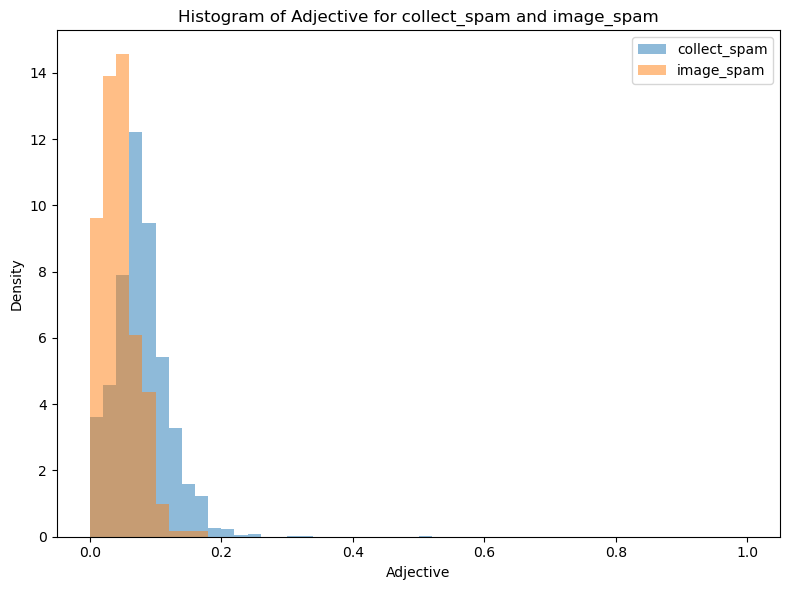

In [86]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_spam_heights, bins, _ = plt.hist(df[df['label'] == 'collect_spam']['Adjective'], bins=50, range=(0, 1), alpha=0.5, label='collect_spam', density=True)
image_spam_heights, _, _ = plt.hist(df[df['label'] == 'image_spam']['Adjective'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of Adjective for collect_spam and image_spam")
plt.xlabel("Adjective")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.38907610863006903


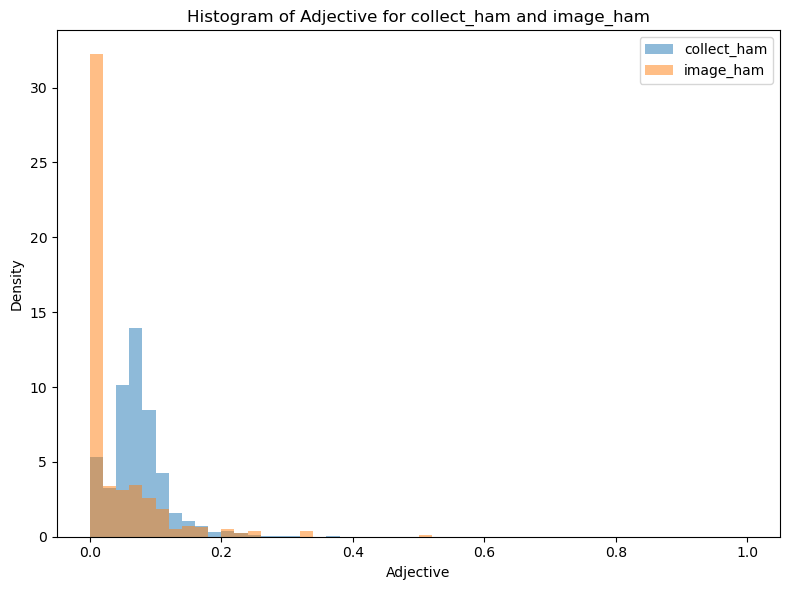

In [87]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_ham_heights, bins, _ = plt.hist(df[df['label'] == 'collect_ham']['Adjective'], bins=50, range=(0, 1), alpha=0.5, label='collect_ham', density=True)
image_ham_heights, _, _ = plt.hist(df[df['label'] == 'image_ham']['Adjective'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of Adjective for collect_ham and image_ham")
plt.xlabel("Adjective")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.4619778698377265


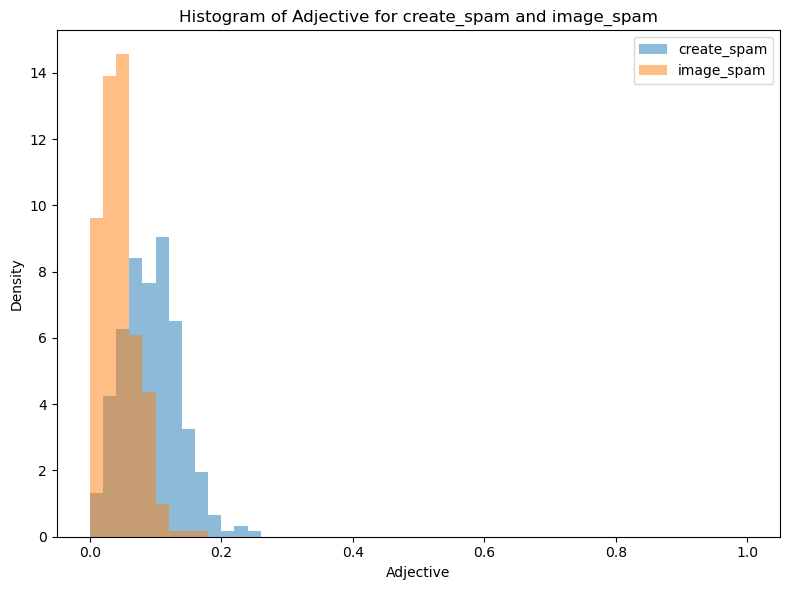

In [88]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_spam_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_spam']['Adjective'], bins=50, range=(0, 1), alpha=0.5, label='create_spam', density=True)
image_spam_heights, _, _ = plt.hist(df1[df1['label'] == 'image_spam']['Adjective'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of Adjective for create_spam and image_spam")
plt.xlabel("Adjective")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.3889804631174192


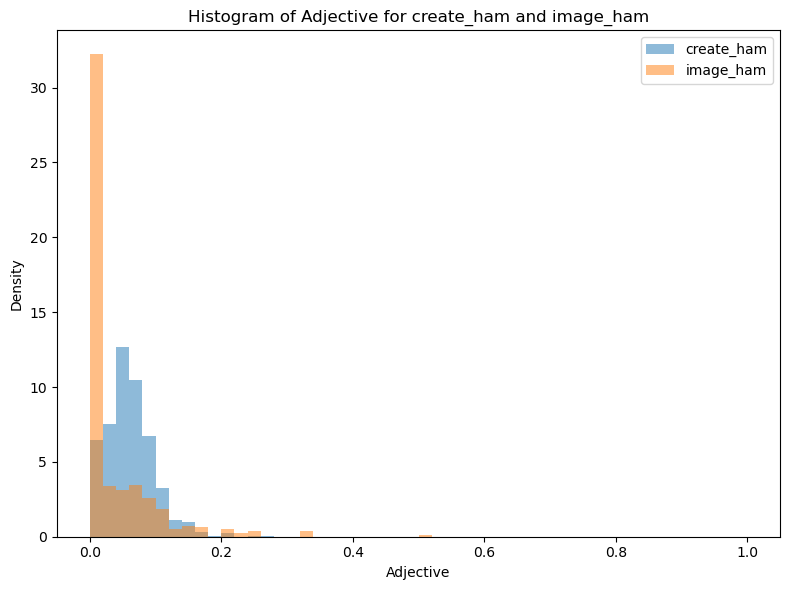

In [89]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_ham_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_ham']['Adjective'], bins=50, range=(0, 1), alpha=0.5, label='create_ham', density=True)
image_ham_heights, _, _ = plt.hist(df1[df1['label'] == 'image_ham']['Adjective'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of Adjective for create_ham and image_ham")
plt.xlabel("Adjective")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

### 부사 Adverb

Overlapping area: 0.7571732448528471


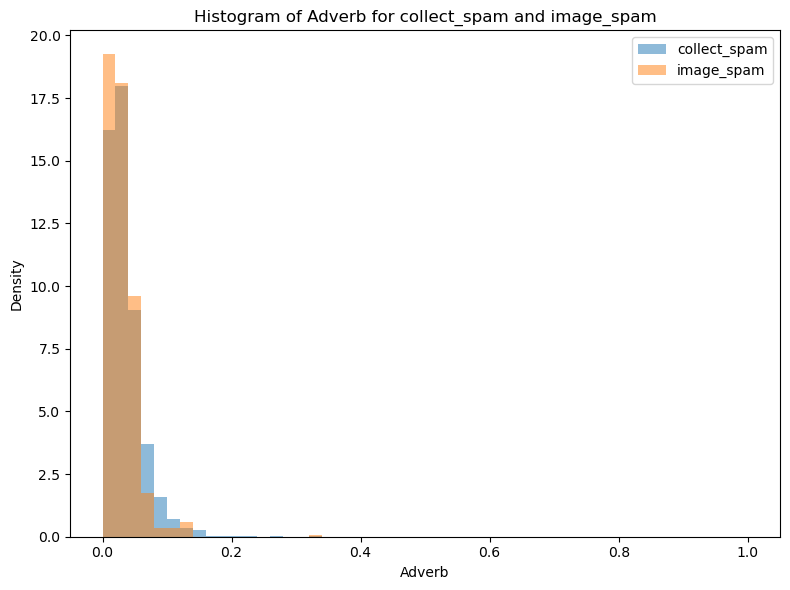

In [90]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_spam_heights, bins, _ = plt.hist(df[df['label'] == 'collect_spam']['Adverb'], bins=50, range=(0, 1), alpha=0.5, label='collect_spam', density=True)
image_spam_heights, _, _ = plt.hist(df[df['label'] == 'image_spam']['Adverb'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of Adverb for collect_spam and image_spam")
plt.xlabel("Adverb")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.3302309652319242


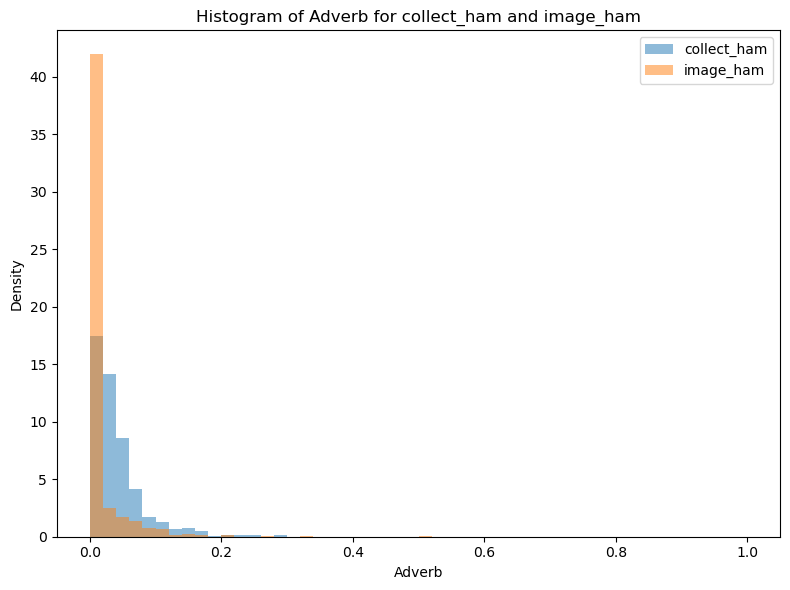

In [91]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_ham_heights, bins, _ = plt.hist(df[df['label'] == 'collect_ham']['Adverb'], bins=50, range=(0, 1), alpha=0.5, label='collect_ham', density=True)
image_ham_heights, _, _ = plt.hist(df[df['label'] == 'image_ham']['Adverb'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of Adverb for collect_ham and image_ham")
plt.xlabel("Adverb")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.6447931870868034


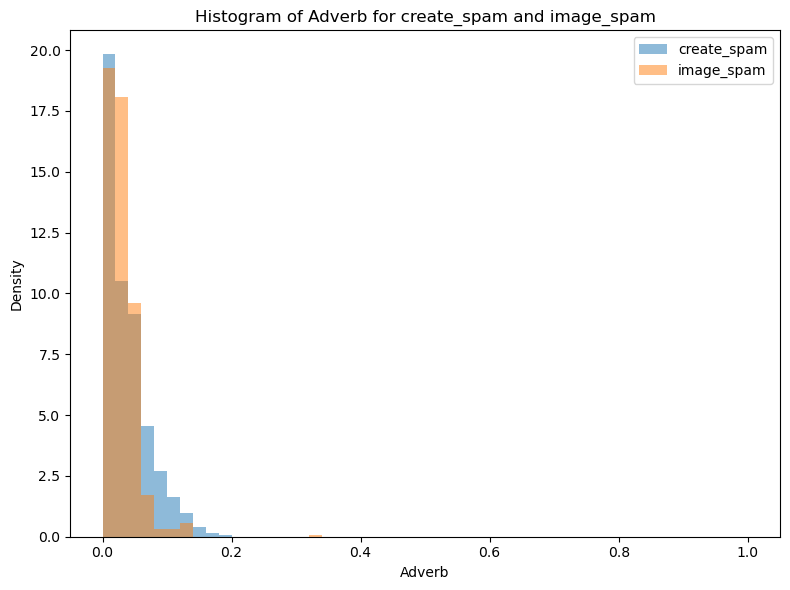

In [92]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_spam_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_spam']['Adverb'], bins=50, range=(0, 1), alpha=0.5, label='create_spam', density=True)
image_spam_heights, _, _ = plt.hist(df1[df1['label'] == 'image_spam']['Adverb'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of Adverb for create_spam and image_spam")
plt.xlabel("Adverb")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.3055670219683904


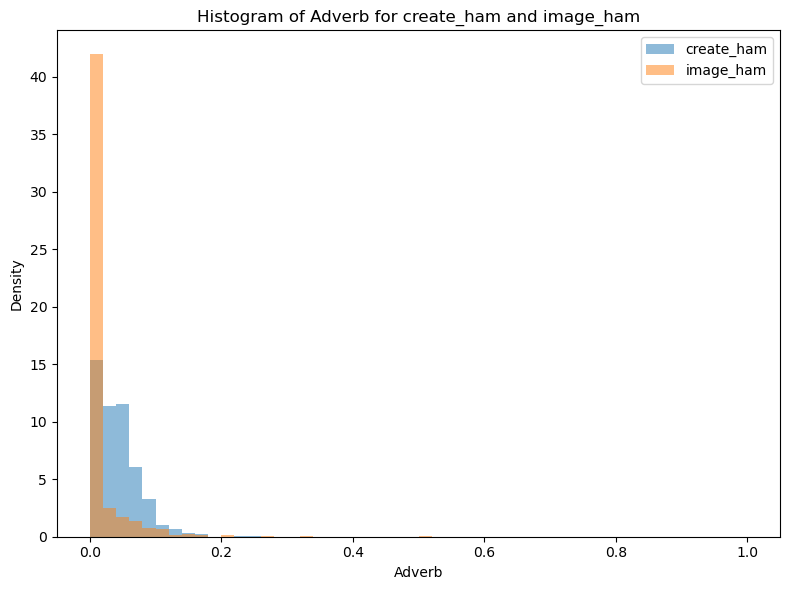

In [93]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_ham_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_ham']['Adverb'], bins=50, range=(0, 1), alpha=0.5, label='create_ham', density=True)
image_ham_heights, _, _ = plt.hist(df1[df1['label'] == 'image_ham']['Adverb'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of Adverb for create_ham and image_ham")
plt.xlabel("Adverb")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

## 문장 내 평균 단어 비율

In [94]:
from nltk.tokenize import sent_tokenize

In [95]:
# 문장 단위로 나누는 함수
def split_into_sentences(text):
    sentences = sent_tokenize(text)
    return sentences

In [96]:
df['sentences'] = df['text'].apply(split_into_sentences)
#df['sentence_count'] = df['sentences'].apply(len)

In [97]:
df1['sentences'] = df1['text'].apply(split_into_sentences)
#df1['sentence_count'] = df1['sentences'].apply(len)

In [98]:
# 평균 단어 수 계산 함수
def calculate_avg_word_count(sentences):
    total_word_count = sum(len(word_tokenize(sentence)) for sentence in sentences)
    avg_word_count = total_word_count / len(sentences)
    return avg_word_count

In [99]:
df['avg_word_sentences'] = df['sentences'].apply(calculate_avg_word_count)
df

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio,blank_ratio,crlf_ratio,pos_tagged,pos_ratios,modified_pos_tagged,Noun,Pronoun,Verb,Adjective,Adverb,sentences,avg_word_sentences
0,"re : opportunities\nlloyd ,\nyes , i would be...",collect_ham,0.172217,0.106878,"[re, :, opportunities, lloyd, ,, yes, ,, i, wo...",0,0.000000,0.413615,0.095878,"[(re, NN), (:, :), (opportunities, NNS), (lloy...","{'Noun': 0.3589315525876461, ':': 0.1786310517...","[(re, Noun), (:, :), (opportunities, Noun), (l...",0.358932,0.020033,0.091820,0.051753,0.011686,"[ re : opportunities\nlloyd ,\nyes , i would b...",18.151515
1,\nALERT\nHOT STOCK ALERT THIS ONE IS STILL CLI...,image_spam,0.029782,0.002265,"[ALERT, HOT, STOCK, ALERT, THIS, ONE, IS, STIL...",0,0.165854,0.248918,0.031359,"[(ALERT, NNP), (HOT, NNP), (STOCK, NNP), (ALER...","{'Noun': 0.5, ':': 0.024, '$': 0.004, 'CD': 0....","[(ALERT, Noun), (HOT, Noun), (STOCK, Noun), (A...",0.500000,0.020000,0.084000,0.076000,0.020000,[\nALERT\nHOT STOCK ALERT THIS ONE IS STILL CL...,27.777778
2,\nFOXFIELD\nKirkby Stephen\nFirst\nGrange-over...,image_ham,0.016374,0.000000,"[FOXFIELD, Kirkby, Stephen, First, Grange-over...",0,0.160920,0.096833,0.224138,"[(FOXFIELD, NNP), (Kirkby, NNP), (Stephen, NNP...","{'Noun': 0.8260869565217391, 'Adverb': 0.04347...","[(FOXFIELD, Noun), (Kirkby, Noun), (Stephen, N...",0.826087,0.000000,0.043478,0.000000,0.043478,[\nFOXFIELD\nKirkby Stephen\nFirst\nGrange-ove...,23.000000
3,\nMATTHEW 9:4\nTHE\nHARVEST\n0A0\nplentiful\nB...,image_ham,0.055699,0.019384,"[MATTHEW, 9:4, THE, HARVEST, 0A0, plentiful, B...",0,0.050364,0.302589,0.039761,"[(MATTHEW, NNP), (9:4, CD), (THE, NNP), (HARVE...","{'Noun': 0.22988505747126436, 'CD': 0.02011494...","[(MATTHEW, Noun), (9:4, CD), (THE, Noun), (HAR...",0.229885,0.112069,0.163793,0.028736,0.034483,[\nMATTHEW 9:4\nTHE\nHARVEST\n0A0\nplentiful\n...,29.000000
4,URL: http://boingboing.net/#85540997\nDate: No...,collect_ham,0.177169,0.074239,"[URL, :, http://boingboing.net/#85540997, Date...",3,0.060914,0.145397,0.038071,"[(URL, NN), (:, :), (http, NN), (:, :), (//boi...","{'Noun': 0.3972602739726027, ':': 0.0821917808...","[(URL, Noun), (:, :), (http, Noun), (:, :), (/...",0.397260,0.000000,0.109589,0.068493,0.013699,[URL: http://boingboing.net/#85540997\nDate: N...,36.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11648,you don _ t know how to get into search engin...,collect_spam,0.025990,0.000000,"[you, don, _, t, know, how, to, get, into, sea...",0,0.000000,0.407295,0.054732,"[(you, PRP), (don, VBP), (_, JJ), (t, NN), (kn...","{'Pronoun': 0.06578947368421052, 'Verb': 0.092...","[(you, Pronoun), (don, Verb), (_, Adjective), ...",0.600877,0.065789,0.092105,0.057018,0.026316,[ you don _ t know how to get into search engi...,20.727273
11649,\npicture\nonly\n154\nweek\nBehind A Sorority'...,image_ham,0.036528,0.041667,"[picture, only, 154, week, Behind, A, Sorority...",0,0.166667,0.165609,0.192308,"[(picture, NN), (only, RB), (154, CD), (week, ...","{'Noun': 0.5909090909090909, 'Adverb': 0.04545...","[(picture, Noun), (only, Adverb), (154, CD), (...",0.590909,0.000000,0.045455,0.022727,0.045455,[\npicture\nonly\n154\nweek\nBehind A Sorority...,22.000000
11650,\nWESTERN UNION TELEGRAPH\nAND CABLE OFFICE,image_ham,0.000000,0.000000,"[WESTERN, UNION, TELEGRAPH, AND, CABLE, OFFICE]",0,0.853659,0.164380,0.146341,"[(WESTERN, NNP), (UNION, NNP), (TELEGRAPH, NNP...",{'Noun': 1.0},"[(WESTERN, Noun), (UNION, Noun), (TELEGRAPH, N...",1.000000,0.000000,0.000000,0.000000,0.000000,[\nWESTERN UNION TELEGRAPH\nAND CABLE OFFICE],6.000000
11651,"all graphics software available , cheap oem v...",collect_spam,0.071229,0.183245,"[all, graphics, software, available, ,, cheap,...",0,0.000000,0.311885,0.092553,"[(all, DT), (graphics, NNS), (software, NN), (...","{'DT': 0.009900990099009901, 'Noun': 0.3069306...","[(all, DT), (graphics, Noun), (software, Noun)...",0.306931,0.009901,0.039604,0.113861,0.004950,"[ all

In [100]:
df1['avg_word_sentences'] = df1['sentences'].apply(calculate_avg_word_count)
df1

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio,blank_ratio,crlf_ratio,pos_tagged,pos_ratios,modified_pos_tagged,Noun,Pronoun,Verb,Adjective,Adverb,sentences,avg_word_sentences
0,Subject: Expand Your Artistry: Mixed Media Mas...,create_spam,0.164780,0.000000,"[Subject, :, Expand, Your, Artistry, :, Mixed,...",0,0.067138,0.503887,0.084806,"[(Subject, JJ), (:, :), (Expand, VB), (Your, P...","{'Adjective': 0.1276595744680851, ':': 0.04255...","[(Subject, Adjective), (:, :), (Expand, Verb),...",0.446809,0.085106,0.063830,0.127660,0.000000,[Subject: Expand Your Artistry: Mixed Media Ma...,15.666667
1,\nWE HAVE A RUNNER!\nCOULD THIS BE THE NEXT EX...,image_spam,0.183462,0.042918,"[WE, HAVE, A, RUNNER, !, COULD, THIS, BE, THE,...",0,0.215308,0.684406,0.030043,"[(WE, WDT), (HAVE, VBP), (A, DT), (RUNNER, NN)...","{'WDT': 0.00749063670411985, 'Verb': 0.1048689...","[(WE, WDT), (HAVE, Verb), (A, DT), (RUNNER, No...",0.479401,0.003745,0.104869,0.044944,0.000000,"[\nWE HAVE A RUNNER!, COULD THIS BE THE NEXT E...",22.250000
2,Subject: Incredible Savings Await You: Access ...,create_spam,0.422333,0.158491,"[Subject, :, Incredible, Savings, Await, You, ...",3,0.033962,0.347170,0.045283,"[(Subject, JJ), (:, :), (Incredible, JJ), (Sav...","{'Adjective': 0.17647058823529413, ':': 0.1176...","[(Subject, Adjective), (:, :), (Incredible, Ad...",0.294118,0.117647,0.147059,0.176471,0.000000,[Subject: Incredible Savings Await You: Access...,8.500000
3,\nDoctor Prescribed and Medically Supervised T...,image_spam,0.230734,0.031250,"[Doctor, Prescribed, and, Medically, Supervise...",2,0.148438,0.598958,0.085938,"[(Doctor, NNP), (Prescribed, NNP), (and, CC), ...","{'Noun': 0.4444444444444444, 'CC': 0.055555555...","[(Doctor, Noun), (Prescribed, Noun), (and, CC)...",0.444444,0.027778,0.097222,0.055556,0.027778,[\nDoctor Prescribed and Medically Supervised ...,18.000000
4,"\n""If you break your promise, you and your sol...",image_ham,0.174872,0.025000,"["", If, you, break, your, promise, ,, you, and...",0,0.037500,0.651667,0.075000,"[('', ''), (If, IN), (you, PRP), (break, VBP),...","{'''': 0.04081632653061224, 'IN': 0.0816326530...","[('', ''), (If, IN), (you, Pronoun), (break, V...",0.244898,0.163265,0.163265,0.020408,0.040816,"[\n""If you break your promise, you and your so...",16.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407,\nBest stock Pick for this Year!\nGet ARSS Fir...,image_spam,0.225007,0.057901,"[Best, stock, Pick, for, this, Year, !, Get, A...",0,0.130277,0.699156,0.068758,"[(Best, NNP), (stock, NN), (Pick, NNP), (for, ...","{'Noun': 0.3672316384180791, 'IN': 0.073446327...","[(Best, Noun), (stock, Noun), (Pick, Noun), (f...",0.367232,0.056497,0.112994,0.050847,0.039548,"[\nBest stock Pick for this Year!, Get ARSS Fi...",17.700000
2408,\nMarket Pulse List ARSS Among TOP FOUR Movers...,image_spam,0.221581,0.103672,"[Market, Pulse, List, ARSS, Among, TOP, FOUR, ...",0,0.110151,0.615983,0.071274,"[(Market, NN), (Pulse, NNP), (List, NNP), (ARS...","{'Noun': 0.3701657458563536, 'IN': 0.066298342...","[(Market, Noun), (Pulse, Noun), (List, Noun), ...",0.370166,0.022099,0.093923,0.093923,0.005525,[\nMarket Pulse List ARSS Among TOP FOUR Mover...,16.454545
2409,"Hi Clever,\n\nI had an idea for Hans Project. ...",create_ham,0.233163,0.000000,"[Hi, Clever, ,, I, had, an, idea, for, Hans, P...",0,0.075000,0.862500,0.075000,"[(Hi, NNP), (Clever, NNP), (,, ,), (I, PRP), (...","{'Noun': 0.23809523809523808, ',': 0.047619047...","[(Hi, Noun), (Clever, Noun), (,, ,), (I, Prono...",0.238095,0.142857,0.238095,0.000000,0.000000,"[Hi Clever,\n\nI had an idea for Hans Project....",10.500000
2410,Subject: Cultivate Confidence: Empowerment Wor...,create_spam,0.177495,0.000000,"[Subject, :, Cultivate, Confidence, :, Empower...",0,0.051903,0.461592,0.103806,"[(Subject, JJ), (:, :), (Cultivate, NN), (Conf...","{'Adjective': 0.08888888888888889, ':': 0.0444...","[(Subject, Adjective), (:, :), (Cultivate, N

In [101]:
# avg_word_ratio 열을 Min-Max 정규화하여 교체
df['avg_word_sentences'] = minmax_normalize(df['avg_word_sentences'])
df

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio,blank_ratio,crlf_ratio,pos_tagged,pos_ratios,modified_pos_tagged,Noun,Pronoun,Verb,Adjective,Adverb,sentences,avg_word_sentences
0,"re : opportunities\nlloyd ,\nyes , i would be...",collect_ham,0.172217,0.106878,"[re, :, opportunities, lloyd, ,, yes, ,, i, wo...",0,0.000000,0.413615,0.095878,"[(re, NN), (:, :), (opportunities, NNS), (lloy...","{'Noun': 0.3589315525876461, ':': 0.1786310517...","[(re, Noun), (:, :), (opportunities, Noun), (l...",0.358932,0.020033,0.091820,0.051753,0.011686,"[ re : opportunities\nlloyd ,\nyes , i would b...",0.032732
1,\nALERT\nHOT STOCK ALERT THIS ONE IS STILL CLI...,image_spam,0.029782,0.002265,"[ALERT, HOT, STOCK, ALERT, THIS, ONE, IS, STIL...",0,0.165854,0.248918,0.031359,"[(ALERT, NNP), (HOT, NNP), (STOCK, NNP), (ALER...","{'Noun': 0.5, ':': 0.024, '$': 0.004, 'CD': 0....","[(ALERT, Noun), (HOT, Noun), (STOCK, Noun), (A...",0.500000,0.020000,0.084000,0.076000,0.020000,[\nALERT\nHOT STOCK ALERT THIS ONE IS STILL CL...,0.051103
2,\nFOXFIELD\nKirkby Stephen\nFirst\nGrange-over...,image_ham,0.016374,0.000000,"[FOXFIELD, Kirkby, Stephen, First, Grange-over...",0,0.160920,0.096833,0.224138,"[(FOXFIELD, NNP), (Kirkby, NNP), (Stephen, NNP...","{'Noun': 0.8260869565217391, 'Adverb': 0.04347...","[(FOXFIELD, Noun), (Kirkby, Noun), (Stephen, N...",0.826087,0.000000,0.043478,0.000000,0.043478,[\nFOXFIELD\nKirkby Stephen\nFirst\nGrange-ove...,0.041985
3,\nMATTHEW 9:4\nTHE\nHARVEST\n0A0\nplentiful\nB...,image_ham,0.055699,0.019384,"[MATTHEW, 9:4, THE, HARVEST, 0A0, plentiful, B...",0,0.050364,0.302589,0.039761,"[(MATTHEW, NNP), (9:4, CD), (THE, NNP), (HARVE...","{'Noun': 0.22988505747126436, 'CD': 0.02011494...","[(MATTHEW, Noun), (9:4, CD), (THE, Noun), (HAR...",0.229885,0.112069,0.163793,0.028736,0.034483,[\nMATTHEW 9:4\nTHE\nHARVEST\n0A0\nplentiful\n...,0.053435
4,URL: http://boingboing.net/#85540997\nDate: No...,collect_ham,0.177169,0.074239,"[URL, :, http://boingboing.net/#85540997, Date...",3,0.060914,0.145397,0.038071,"[(URL, NN), (:, :), (http, NN), (:, :), (//boi...","{'Noun': 0.3972602739726027, ':': 0.0821917808...","[(URL, Noun), (:, :), (http, Noun), (:, :), (/...",0.397260,0.000000,0.109589,0.068493,0.013699,[URL: http://boingboing.net/#85540997\nDate: N...,0.067748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11648,you don _ t know how to get into search engin...,collect_spam,0.025990,0.000000,"[you, don, _, t, know, how, to, get, into, sea...",0,0.000000,0.407295,0.054732,"[(you, PRP), (don, VBP), (_, JJ), (t, NN), (kn...","{'Pronoun': 0.06578947368421052, 'Verb': 0.092...","[(you, Pronoun), (don, Verb), (_, Adjective), ...",0.600877,0.065789,0.092105,0.057018,0.026316,[ you don _ t know how to get into search engi...,0.037647
11649,\npicture\nonly\n154\nweek\nBehind A Sorority'...,image_ham,0.036528,0.041667,"[picture, only, 154, week, Behind, A, Sorority...",0,0.166667,0.165609,0.192308,"[(picture, NN), (only, RB), (154, CD), (week, ...","{'Noun': 0.5909090909090909, 'Adverb': 0.04545...","[(picture, Noun), (only, Adverb), (154, CD), (...",0.590909,0.000000,0.045455,0.022727,0.045455,[\npicture\nonly\n154\nweek\nBehind A Sorority...,0.040076
11650,\nWESTERN UNION TELEGRAPH\nAND CABLE OFFICE,image_ham,0.000000,0.000000,"[WESTERN, UNION, TELEGRAPH, AND, CABLE, OFFICE]",0,0.853659,0.164380,0.146341,"[(WESTERN, NNP), (UNION, NNP), (TELEGRAPH, NNP...",{'Noun': 1.0},"[(WESTERN, Noun), (UNION, Noun), (TELEGRAPH, N...",1.000000,0.000000,0.000000,0.000000,0.000000,[\nWESTERN UNION TELEGRAPH\nAND CABLE OFFICE],0.009542
11651,"all graphics software available , cheap oem v...",collect_spam,0.071229,0.183245,"[all, graphics, software, available, ,, cheap,...",0,0.000000,0.311885,0.092553,"[(all, DT), (graphics, NNS), (software, NN), (...","{'DT': 0.009900990099009901, 'Noun': 0.3069306...","[(all, DT), (graphics, Noun), (software, Noun)...",0.306931,0.009901,0.039604,0.113861,0.004950,"[ all graphi

In [102]:
# avg_word_ratio 열을 Min-Max 정규화하여 교체
df1['avg_word_sentences'] = minmax_normalize(df1['avg_word_sentences'])
df1

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio,blank_ratio,crlf_ratio,pos_tagged,pos_ratios,modified_pos_tagged,Noun,Pronoun,Verb,Adjective,Adverb,sentences,avg_word_sentences
0,Subject: Expand Your Artistry: Mixed Media Mas...,create_spam,0.164780,0.000000,"[Subject, :, Expand, Your, Artistry, :, Mixed,...",0,0.067138,0.503887,0.084806,"[(Subject, JJ), (:, :), (Expand, VB), (Your, P...","{'Adjective': 0.1276595744680851, ':': 0.04255...","[(Subject, Adjective), (:, :), (Expand, Verb),...",0.446809,0.085106,0.063830,0.127660,0.000000,[Subject: Expand Your Artistry: Mixed Media Ma...,0.027990
1,\nWE HAVE A RUNNER!\nCOULD THIS BE THE NEXT EX...,image_spam,0.183462,0.042918,"[WE, HAVE, A, RUNNER, !, COULD, THIS, BE, THE,...",0,0.215308,0.684406,0.030043,"[(WE, WDT), (HAVE, VBP), (A, DT), (RUNNER, NN)...","{'WDT': 0.00749063670411985, 'Verb': 0.1048689...","[(WE, WDT), (HAVE, Verb), (A, DT), (RUNNER, No...",0.479401,0.003745,0.104869,0.044944,0.000000,"[\nWE HAVE A RUNNER!, COULD THIS BE THE NEXT E...",0.040553
2,Subject: Incredible Savings Await You: Access ...,create_spam,0.422333,0.158491,"[Subject, :, Incredible, Savings, Await, You, ...",3,0.033962,0.347170,0.045283,"[(Subject, JJ), (:, :), (Incredible, JJ), (Sav...","{'Adjective': 0.17647058823529413, ':': 0.1176...","[(Subject, Adjective), (:, :), (Incredible, Ad...",0.294118,0.117647,0.147059,0.176471,0.000000,[Subject: Incredible Savings Await You: Access...,0.014313
3,\nDoctor Prescribed and Medically Supervised T...,image_spam,0.230734,0.031250,"[Doctor, Prescribed, and, Medically, Supervise...",2,0.148438,0.598958,0.085938,"[(Doctor, NNP), (Prescribed, NNP), (and, CC), ...","{'Noun': 0.4444444444444444, 'CC': 0.055555555...","[(Doctor, Noun), (Prescribed, Noun), (and, CC)...",0.444444,0.027778,0.097222,0.055556,0.027778,[\nDoctor Prescribed and Medically Supervised ...,0.032443
4,"\n""If you break your promise, you and your sol...",image_ham,0.174872,0.025000,"["", If, you, break, your, promise, ,, you, and...",0,0.037500,0.651667,0.075000,"[('', ''), (If, IN), (you, PRP), (break, VBP),...","{'''': 0.04081632653061224, 'IN': 0.0816326530...","[('', ''), (If, IN), (you, Pronoun), (break, V...",0.244898,0.163265,0.163265,0.020408,0.040816,"[\n""If you break your promise, you and your so...",0.029262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407,\nBest stock Pick for this Year!\nGet ARSS Fir...,image_spam,0.225007,0.057901,"[Best, stock, Pick, for, this, Year, !, Get, A...",0,0.130277,0.699156,0.068758,"[(Best, NNP), (stock, NN), (Pick, NNP), (for, ...","{'Noun': 0.3672316384180791, 'IN': 0.073446327...","[(Best, Noun), (stock, Noun), (Pick, Noun), (f...",0.367232,0.056497,0.112994,0.050847,0.039548,"[\nBest stock Pick for this Year!, Get ARSS Fi...",0.031870
2408,\nMarket Pulse List ARSS Among TOP FOUR Movers...,image_spam,0.221581,0.103672,"[Market, Pulse, List, ARSS, Among, TOP, FOUR, ...",0,0.110151,0.615983,0.071274,"[(Market, NN), (Pulse, NNP), (List, NNP), (ARS...","{'Noun': 0.3701657458563536, 'IN': 0.066298342...","[(Market, Noun), (Pulse, Noun), (List, Noun), ...",0.370166,0.022099,0.093923,0.093923,0.005525,[\nMarket Pulse List ARSS Among TOP FOUR Mover...,0.029493
2409,"Hi Clever,\n\nI had an idea for Hans Project. ...",create_ham,0.233163,0.000000,"[Hi, Clever, ,, I, had, an, idea, for, Hans, P...",0,0.075000,0.862500,0.075000,"[(Hi, NNP), (Clever, NNP), (,, ,), (I, PRP), (...","{'Noun': 0.23809523809523808, ',': 0.047619047...","[(Hi, Noun), (Clever, Noun), (,, ,), (I, Prono...",0.238095,0.142857,0.238095,0.000000,0.000000,"[Hi Clever,\n\nI had an idea for Hans Project....",0.018130
2410,Subject: Cultivate Confidence: Empowerment Wor...,create_spam,0.177495,0.000000,"[Subject, :, Cultivate, Confidence, :, Empower...",0,0.051903,0.461592,0.103806,"[(Subject, JJ), (:, :), (Cultivate, NN), (Conf...","{'Adjective': 0.08888888888888889, ':': 0.0444...","[(Subject, Adjective), (:, :), (Cultivate, Nou...",

Overlapping area: 0.6423465216755878


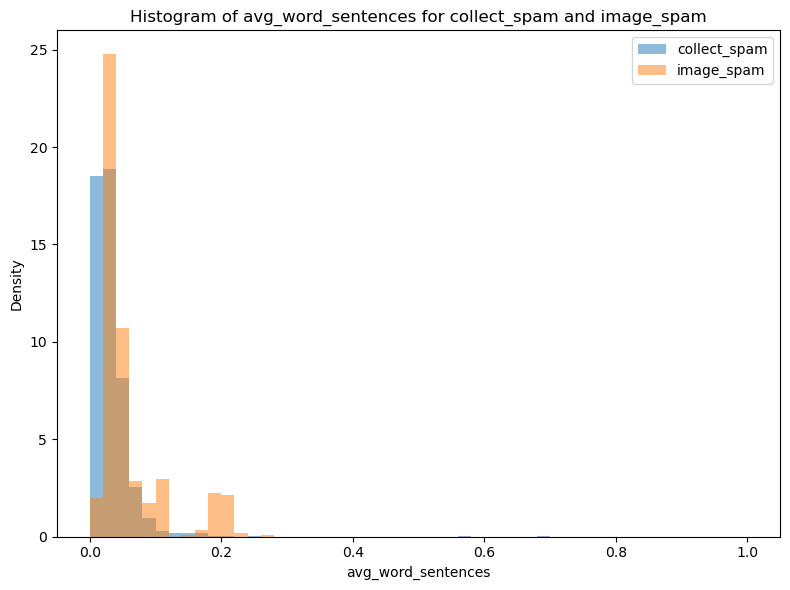

In [103]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_spam_heights, bins, _ = plt.hist(df[df['label'] == 'collect_spam']['avg_word_sentences'], bins=50, range=(0, 1), alpha=0.5, label='collect_spam', density=True)
image_spam_heights, _, _ = plt.hist(df[df['label'] == 'image_spam']['avg_word_sentences'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of avg_word_sentences for collect_spam and image_spam")
plt.xlabel("avg_word_sentences")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.5531895851027883


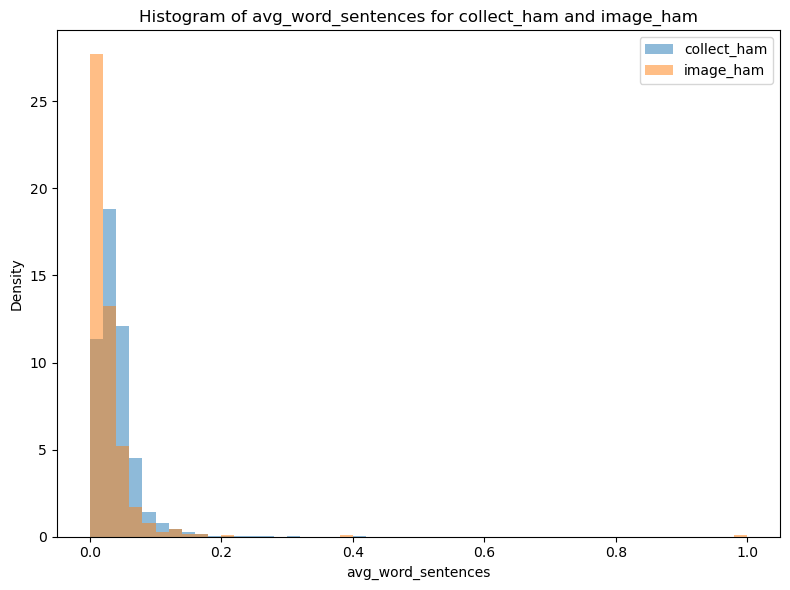

In [104]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_ham_heights, bins, _ = plt.hist(df[df['label'] == 'collect_ham']['avg_word_sentences'], bins=50, range=(0, 1), alpha=0.5, label='collect_ham', density=True)
image_ham_heights, _, _ = plt.hist(df[df['label'] == 'image_ham']['avg_word_sentences'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of avg_word_sentences for collect_ham and image_ham")
plt.xlabel("avg_word_sentences")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.49445136086545893


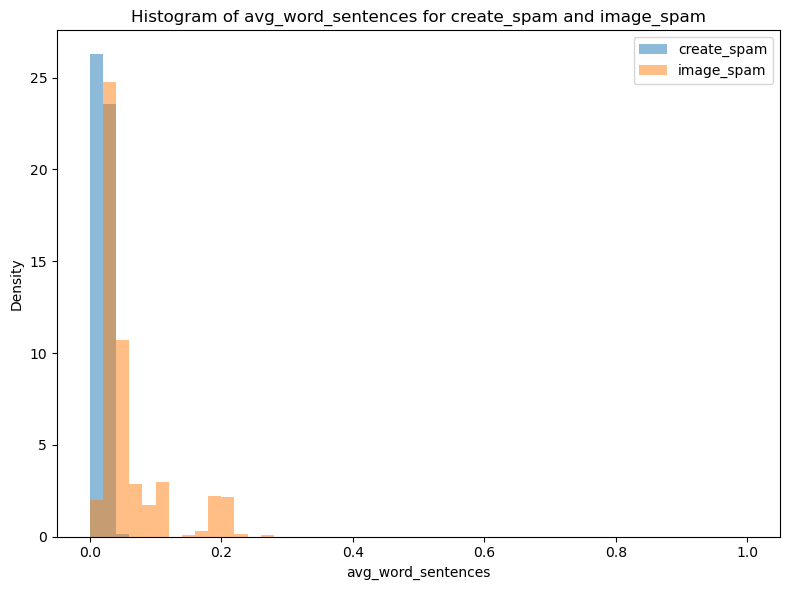

In [105]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_spam_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_spam']['avg_word_sentences'], bins=50, range=(0, 1), alpha=0.5, label='create_spam', density=True)
image_spam_heights, _, _ = plt.hist(df1[df1['label'] == 'image_spam']['avg_word_sentences'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of avg_word_sentences for create_spam and image_spam")
plt.xlabel("avg_word_sentences")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.5498317735870395


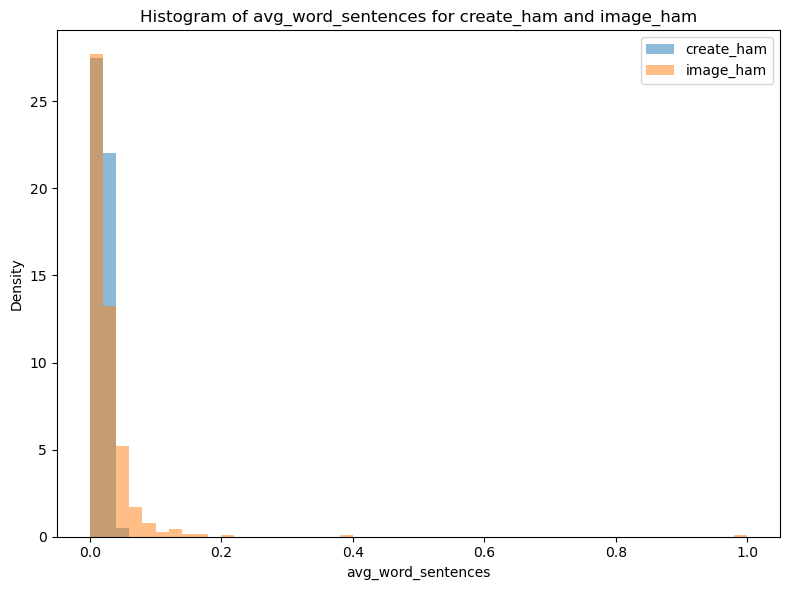

In [106]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_ham_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_ham']['avg_word_sentences'], bins=50, range=(0, 1), alpha=0.5, label='create_ham', density=True)
image_ham_heights, _, _ = plt.hist(df1[df1['label'] == 'image_ham']['avg_word_sentences'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of avg_word_sentences for create_ham and image_ham")
plt.xlabel("avg_word_sentences")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

## 문장 내 평균 글자 비율

In [107]:
# 평균 글자 수 계산 함수
def calculate_avg_char_count(sentences):
    total_char_count = sum(len(sentence) for sentence in sentences)
    avg_char_count = total_char_count / len(sentences)
    return avg_char_count

In [108]:
df['avg_char_sentences'] = df['sentences'].apply(calculate_avg_char_count)
df

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio,blank_ratio,crlf_ratio,pos_tagged,pos_ratios,modified_pos_tagged,Noun,Pronoun,Verb,Adjective,Adverb,sentences,avg_word_sentences,avg_char_sentences
0,"re : opportunities\nlloyd ,\nyes , i would be...",collect_ham,0.172217,0.106878,"[re, :, opportunities, lloyd, ,, yes, ,, i, wo...",0,0.000000,0.413615,0.095878,"[(re, NN), (:, :), (opportunities, NNS), (lloy...","{'Noun': 0.3589315525876461, ':': 0.1786310517...","[(re, Noun), (:, :), (opportunities, Noun), (l...",0.358932,0.020033,0.091820,0.051753,0.011686,"[ re : opportunities\nlloyd ,\nyes , i would b...",0.032732,64.454545
1,\nALERT\nHOT STOCK ALERT THIS ONE IS STILL CLI...,image_spam,0.029782,0.002265,"[ALERT, HOT, STOCK, ALERT, THIS, ONE, IS, STIL...",0,0.165854,0.248918,0.031359,"[(ALERT, NNP), (HOT, NNP), (STOCK, NNP), (ALER...","{'Noun': 0.5, ':': 0.024, '$': 0.004, 'CD': 0....","[(ALERT, Noun), (HOT, Noun), (STOCK, Noun), (A...",0.500000,0.020000,0.084000,0.076000,0.020000,[\nALERT\nHOT STOCK ALERT THIS ONE IS STILL CL...,0.051103,158.555556
2,\nFOXFIELD\nKirkby Stephen\nFirst\nGrange-over...,image_ham,0.016374,0.000000,"[FOXFIELD, Kirkby, Stephen, First, Grange-over...",0,0.160920,0.096833,0.224138,"[(FOXFIELD, NNP), (Kirkby, NNP), (Stephen, NNP...","{'Noun': 0.8260869565217391, 'Adverb': 0.04347...","[(FOXFIELD, Noun), (Kirkby, Noun), (Stephen, N...",0.826087,0.000000,0.043478,0.000000,0.043478,[\nFOXFIELD\nKirkby Stephen\nFirst\nGrange-ove...,0.041985,174.000000
3,\nMATTHEW 9:4\nTHE\nHARVEST\n0A0\nplentiful\nB...,image_ham,0.055699,0.019384,"[MATTHEW, 9:4, THE, HARVEST, 0A0, plentiful, B...",0,0.050364,0.302589,0.039761,"[(MATTHEW, NNP), (9:4, CD), (THE, NNP), (HARVE...","{'Noun': 0.22988505747126436, 'CD': 0.02011494...","[(MATTHEW, Noun), (9:4, CD), (THE, Noun), (HAR...",0.229885,0.112069,0.163793,0.028736,0.034483,[\nMATTHEW 9:4\nTHE\nHARVEST\n0A0\nplentiful\n...,0.053435,124.833333
4,URL: http://boingboing.net/#85540997\nDate: No...,collect_ham,0.177169,0.074239,"[URL, :, http://boingboing.net/#85540997, Date...",3,0.060914,0.145397,0.038071,"[(URL, NN), (:, :), (http, NN), (:, :), (//boi...","{'Noun': 0.3972602739726027, ':': 0.0821917808...","[(URL, Noun), (:, :), (http, Noun), (:, :), (/...",0.397260,0.000000,0.109589,0.068493,0.013699,[URL: http://boingboing.net/#85540997\nDate: N...,0.067748,196.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11648,you don _ t know how to get into search engin...,collect_spam,0.025990,0.000000,"[you, don, _, t, know, how, to, get, into, sea...",0,0.000000,0.407295,0.054732,"[(you, PRP), (don, VBP), (_, JJ), (t, NN), (kn...","{'Pronoun': 0.06578947368421052, 'Verb': 0.092...","[(you, Pronoun), (don, Verb), (_, Adjective), ...",0.600877,0.065789,0.092105,0.057018,0.026316,[ you don _ t know how to get into search engi...,0.037647,78.818182
11649,\npicture\nonly\n154\nweek\nBehind A Sorority'...,image_ham,0.036528,0.041667,"[picture, only, 154, week, Behind, A, Sorority...",0,0.166667,0.165609,0.192308,"[(picture, NN), (only, RB), (154, CD), (week, ...","{'Noun': 0.5909090909090909, 'Adverb': 0.04545...","[(picture, Noun), (only, Adverb), (154, CD), (...",0.590909,0.000000,0.045455,0.022727,0.045455,[\npicture\nonly\n154\nweek\nBehind A Sorority...,0.040076,116.500000
11650,\nWESTERN UNION TELEGRAPH\nAND CABLE OFFICE,image_ham,0.000000,0.000000,"[WESTERN, UNION, TELEGRAPH, AND, CABLE, OFFICE]",0,0.853659,0.164380,0.146341,"[(WESTERN, NNP), (UNION, NNP), (TELEGRAPH, NNP...",{'Noun': 1.0},"[(WESTERN, Noun), (UNION, Noun), (TELEGRAPH, N...",1.000000,0.000000,0.000000,0.000000,0.000000,[\nWESTERN UNION TELEGRAPH\nAND CABLE OFFICE],0.009542,41.000000
11651,"all graphics software available , cheap oem v...",collect_spam,0.071229,0.183245,"[all, graphics, software, available, ,, cheap,...",0,0.000000,0.311885,0.092553,"[(all, DT), (graphics, NNS), (software, NN), (...","{'DT': 0.009900990099009901, 'Noun': 0.3069306...","[

In [109]:
df1['avg_char_sentences'] = df1['sentences'].apply(calculate_avg_char_count)
df1

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio,blank_ratio,crlf_ratio,pos_tagged,pos_ratios,modified_pos_tagged,Noun,Pronoun,Verb,Adjective,Adverb,sentences,avg_word_sentences,avg_char_sentences
0,Subject: Expand Your Artistry: Mixed Media Mas...,create_spam,0.164780,0.000000,"[Subject, :, Expand, Your, Artistry, :, Mixed,...",0,0.067138,0.503887,0.084806,"[(Subject, JJ), (:, :), (Expand, VB), (Your, P...","{'Adjective': 0.1276595744680851, ':': 0.04255...","[(Subject, Adjective), (:, :), (Expand, Verb),...",0.446809,0.085106,0.063830,0.127660,0.000000,[Subject: Expand Your Artistry: Mixed Media Ma...,0.027990,93.333333
1,\nWE HAVE A RUNNER!\nCOULD THIS BE THE NEXT EX...,image_spam,0.183462,0.042918,"[WE, HAVE, A, RUNNER, !, COULD, THIS, BE, THE,...",0,0.215308,0.684406,0.030043,"[(WE, WDT), (HAVE, VBP), (A, DT), (RUNNER, NN)...","{'WDT': 0.00749063670411985, 'Verb': 0.1048689...","[(WE, WDT), (HAVE, Verb), (A, DT), (RUNNER, No...",0.479401,0.003745,0.104869,0.044944,0.000000,"[\nWE HAVE A RUNNER!, COULD THIS BE THE NEXT E...",0.040553,115.583333
2,Subject: Incredible Savings Await You: Access ...,create_spam,0.422333,0.158491,"[Subject, :, Incredible, Savings, Await, You, ...",3,0.033962,0.347170,0.045283,"[(Subject, JJ), (:, :), (Incredible, JJ), (Sav...","{'Adjective': 0.17647058823529413, ':': 0.1176...","[(Subject, Adjective), (:, :), (Incredible, Ad...",0.294118,0.117647,0.147059,0.176471,0.000000,[Subject: Incredible Savings Await You: Access...,0.014313,65.500000
3,\nDoctor Prescribed and Medically Supervised T...,image_spam,0.230734,0.031250,"[Doctor, Prescribed, and, Medically, Supervise...",2,0.148438,0.598958,0.085938,"[(Doctor, NNP), (Prescribed, NNP), (and, CC), ...","{'Noun': 0.4444444444444444, 'CC': 0.055555555...","[(Doctor, Noun), (Prescribed, Noun), (and, CC)...",0.444444,0.027778,0.097222,0.055556,0.027778,[\nDoctor Prescribed and Medically Supervised ...,0.032443,95.750000
4,"\n""If you break your promise, you and your sol...",image_ham,0.174872,0.025000,"["", If, you, break, your, promise, ,, you, and...",0,0.037500,0.651667,0.075000,"[('', ''), (If, IN), (you, PRP), (break, VBP),...","{'''': 0.04081632653061224, 'IN': 0.0816326530...","[('', ''), (If, IN), (you, Pronoun), (break, V...",0.244898,0.163265,0.163265,0.020408,0.040816,"[\n""If you break your promise, you and your so...",0.029262,79.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407,\nBest stock Pick for this Year!\nGet ARSS Fir...,image_spam,0.225007,0.057901,"[Best, stock, Pick, for, this, Year, !, Get, A...",0,0.130277,0.699156,0.068758,"[(Best, NNP), (stock, NN), (Pick, NNP), (for, ...","{'Noun': 0.3672316384180791, 'IN': 0.073446327...","[(Best, Noun), (stock, Noun), (Pick, Noun), (f...",0.367232,0.056497,0.112994,0.050847,0.039548,"[\nBest stock Pick for this Year!, Get ARSS Fi...",0.031870,82.000000
2408,\nMarket Pulse List ARSS Among TOP FOUR Movers...,image_spam,0.221581,0.103672,"[Market, Pulse, List, ARSS, Among, TOP, FOUR, ...",0,0.110151,0.615983,0.071274,"[(Market, NN), (Pulse, NNP), (List, NNP), (ARS...","{'Noun': 0.3701657458563536, 'IN': 0.066298342...","[(Market, Noun), (Pulse, Noun), (List, Noun), ...",0.370166,0.022099,0.093923,0.093923,0.005525,[\nMarket Pulse List ARSS Among TOP FOUR Mover...,0.029493,83.272727
2409,"Hi Clever,\n\nI had an idea for Hans Project. ...",create_ham,0.233163,0.000000,"[Hi, Clever, ,, I, had, an, idea, for, Hans, P...",0,0.075000,0.862500,0.075000,"[(Hi, NNP), (Clever, NNP), (,, ,), (I, PRP), (...","{'Noun': 0.23809523809523808, ',': 0.047619047...","[(Hi, Noun), (Clever, Noun), (,, ,), (I, Prono...",0.238095,0.142857,0.238095,0.000000,0.000000,"[Hi Clever,\n\nI had an idea for Hans Project....",0.018130,39.500000
2410,Subject: Cultivate Confidence: Empowerment Wor...,create_spam,0.177495,0.000000,"[Subject, :, Cultivate, Confidence, :, Empower...",0,0.051903,0.461592,0.103806,"[(Subject, JJ), (:, :), (Cultivate, NN), (Conf...",

In [110]:
# avg_word_count 열을 Min-Max 정규화하여 교체
df['avg_char_sentences'] = minmax_normalize(df['avg_char_sentences'])
df

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio,blank_ratio,crlf_ratio,pos_tagged,pos_ratios,modified_pos_tagged,Noun,Pronoun,Verb,Adjective,Adverb,sentences,avg_word_sentences,avg_char_sentences
0,"re : opportunities\nlloyd ,\nyes , i would be...",collect_ham,0.172217,0.106878,"[re, :, opportunities, lloyd, ,, yes, ,, i, wo...",0,0.000000,0.413615,0.095878,"[(re, NN), (:, :), (opportunities, NNS), (lloy...","{'Noun': 0.3589315525876461, ':': 0.1786310517...","[(re, Noun), (:, :), (opportunities, Noun), (l...",0.358932,0.020033,0.091820,0.051753,0.011686,"[ re : opportunities\nlloyd ,\nyes , i would b...",0.032732,0.004241
1,\nALERT\nHOT STOCK ALERT THIS ONE IS STILL CLI...,image_spam,0.029782,0.002265,"[ALERT, HOT, STOCK, ALERT, THIS, ONE, IS, STIL...",0,0.165854,0.248918,0.031359,"[(ALERT, NNP), (HOT, NNP), (STOCK, NNP), (ALER...","{'Noun': 0.5, ':': 0.024, '$': 0.004, 'CD': 0....","[(ALERT, Noun), (HOT, Noun), (STOCK, Noun), (A...",0.500000,0.020000,0.084000,0.076000,0.020000,[\nALERT\nHOT STOCK ALERT THIS ONE IS STILL CL...,0.051103,0.010842
2,\nFOXFIELD\nKirkby Stephen\nFirst\nGrange-over...,image_ham,0.016374,0.000000,"[FOXFIELD, Kirkby, Stephen, First, Grange-over...",0,0.160920,0.096833,0.224138,"[(FOXFIELD, NNP), (Kirkby, NNP), (Stephen, NNP...","{'Noun': 0.8260869565217391, 'Adverb': 0.04347...","[(FOXFIELD, Noun), (Kirkby, Noun), (Stephen, N...",0.826087,0.000000,0.043478,0.000000,0.043478,[\nFOXFIELD\nKirkby Stephen\nFirst\nGrange-ove...,0.041985,0.011926
3,\nMATTHEW 9:4\nTHE\nHARVEST\n0A0\nplentiful\nB...,image_ham,0.055699,0.019384,"[MATTHEW, 9:4, THE, HARVEST, 0A0, plentiful, B...",0,0.050364,0.302589,0.039761,"[(MATTHEW, NNP), (9:4, CD), (THE, NNP), (HARVE...","{'Noun': 0.22988505747126436, 'CD': 0.02011494...","[(MATTHEW, Noun), (9:4, CD), (THE, Noun), (HAR...",0.229885,0.112069,0.163793,0.028736,0.034483,[\nMATTHEW 9:4\nTHE\nHARVEST\n0A0\nplentiful\n...,0.053435,0.008477
4,URL: http://boingboing.net/#85540997\nDate: No...,collect_ham,0.177169,0.074239,"[URL, :, http://boingboing.net/#85540997, Date...",3,0.060914,0.145397,0.038071,"[(URL, NN), (:, :), (http, NN), (:, :), (//boi...","{'Noun': 0.3972602739726027, ':': 0.0821917808...","[(URL, Noun), (:, :), (http, Noun), (:, :), (/...",0.397260,0.000000,0.109589,0.068493,0.013699,[URL: http://boingboing.net/#85540997\nDate: N...,0.067748,0.013469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11648,you don _ t know how to get into search engin...,collect_spam,0.025990,0.000000,"[you, don, _, t, know, how, to, get, into, sea...",0,0.000000,0.407295,0.054732,"[(you, PRP), (don, VBP), (_, JJ), (t, NN), (kn...","{'Pronoun': 0.06578947368421052, 'Verb': 0.092...","[(you, Pronoun), (don, Verb), (_, Adjective), ...",0.600877,0.065789,0.092105,0.057018,0.026316,[ you don _ t know how to get into search engi...,0.037647,0.005249
11649,\npicture\nonly\n154\nweek\nBehind A Sorority'...,image_ham,0.036528,0.041667,"[picture, only, 154, week, Behind, A, Sorority...",0,0.166667,0.165609,0.192308,"[(picture, NN), (only, RB), (154, CD), (week, ...","{'Noun': 0.5909090909090909, 'Adverb': 0.04545...","[(picture, Noun), (only, Adverb), (154, CD), (...",0.590909,0.000000,0.045455,0.022727,0.045455,[\npicture\nonly\n154\nweek\nBehind A Sorority...,0.040076,0.007892
11650,\nWESTERN UNION TELEGRAPH\nAND CABLE OFFICE,image_ham,0.000000,0.000000,"[WESTERN, UNION, TELEGRAPH, AND, CABLE, OFFICE]",0,0.853659,0.164380,0.146341,"[(WESTERN, NNP), (UNION, NNP), (TELEGRAPH, NNP...",{'Noun': 1.0},"[(WESTERN, Noun), (UNION, Noun), (TELEGRAPH, N...",1.000000,0.000000,0.000000,0.000000,0.000000,[\nWESTERN UNION TELEGRAPH\nAND CABLE OFFICE],0.009542,0.002596
11651,"all graphics software available , cheap oem v...",collect_spam,0.071229,0.183245,"[all, graphics, software, available, ,, cheap,...",0,0.000000,0.311885,0.092553,"[(all, DT), (graphics, NNS), (software, NN), (...","{'DT': 0.009900990099009901, 'Noun': 0.3069306...","[(all, DT), (g

In [111]:
# avg_word_count 열을 Min-Max 정규화하여 교체
df1['avg_char_sentences'] = minmax_normalize(df1['avg_char_sentences'])
df1

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio,blank_ratio,crlf_ratio,pos_tagged,pos_ratios,modified_pos_tagged,Noun,Pronoun,Verb,Adjective,Adverb,sentences,avg_word_sentences,avg_char_sentences
0,Subject: Expand Your Artistry: Mixed Media Mas...,create_spam,0.164780,0.000000,"[Subject, :, Expand, Your, Artistry, :, Mixed,...",0,0.067138,0.503887,0.084806,"[(Subject, JJ), (:, :), (Expand, VB), (Your, P...","{'Adjective': 0.1276595744680851, ':': 0.04255...","[(Subject, Adjective), (:, :), (Expand, Verb),...",0.446809,0.085106,0.063830,0.127660,0.000000,[Subject: Expand Your Artistry: Mixed Media Ma...,0.027990,0.025386
1,\nWE HAVE A RUNNER!\nCOULD THIS BE THE NEXT EX...,image_spam,0.183462,0.042918,"[WE, HAVE, A, RUNNER, !, COULD, THIS, BE, THE,...",0,0.215308,0.684406,0.030043,"[(WE, WDT), (HAVE, VBP), (A, DT), (RUNNER, NN)...","{'WDT': 0.00749063670411985, 'Verb': 0.1048689...","[(WE, WDT), (HAVE, Verb), (A, DT), (RUNNER, No...",0.479401,0.003745,0.104869,0.044944,0.000000,"[\nWE HAVE A RUNNER!, COULD THIS BE THE NEXT E...",0.040553,0.031709
2,Subject: Incredible Savings Await You: Access ...,create_spam,0.422333,0.158491,"[Subject, :, Incredible, Savings, Await, You, ...",3,0.033962,0.347170,0.045283,"[(Subject, JJ), (:, :), (Incredible, JJ), (Sav...","{'Adjective': 0.17647058823529413, ':': 0.1176...","[(Subject, Adjective), (:, :), (Incredible, Ad...",0.294118,0.117647,0.147059,0.176471,0.000000,[Subject: Incredible Savings Await You: Access...,0.014313,0.017477
3,\nDoctor Prescribed and Medically Supervised T...,image_spam,0.230734,0.031250,"[Doctor, Prescribed, and, Medically, Supervise...",2,0.148438,0.598958,0.085938,"[(Doctor, NNP), (Prescribed, NNP), (and, CC), ...","{'Noun': 0.4444444444444444, 'CC': 0.055555555...","[(Doctor, Noun), (Prescribed, Noun), (and, CC)...",0.444444,0.027778,0.097222,0.055556,0.027778,[\nDoctor Prescribed and Medically Supervised ...,0.032443,0.026073
4,"\n""If you break your promise, you and your sol...",image_ham,0.174872,0.025000,"["", If, you, break, your, promise, ,, you, and...",0,0.037500,0.651667,0.075000,"[('', ''), (If, IN), (you, PRP), (break, VBP),...","{'''': 0.04081632653061224, 'IN': 0.0816326530...","[('', ''), (If, IN), (you, Pronoun), (break, V...",0.244898,0.163265,0.163265,0.020408,0.040816,"[\n""If you break your promise, you and your so...",0.029262,0.021408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407,\nBest stock Pick for this Year!\nGet ARSS Fir...,image_spam,0.225007,0.057901,"[Best, stock, Pick, for, this, Year, !, Get, A...",0,0.130277,0.699156,0.068758,"[(Best, NNP), (stock, NN), (Pick, NNP), (for, ...","{'Noun': 0.3672316384180791, 'IN': 0.073446327...","[(Best, Noun), (stock, Noun), (Pick, Noun), (f...",0.367232,0.056497,0.112994,0.050847,0.039548,"[\nBest stock Pick for this Year!, Get ARSS Fi...",0.031870,0.022165
2408,\nMarket Pulse List ARSS Among TOP FOUR Movers...,image_spam,0.221581,0.103672,"[Market, Pulse, List, ARSS, Among, TOP, FOUR, ...",0,0.110151,0.615983,0.071274,"[(Market, NN), (Pulse, NNP), (List, NNP), (ARS...","{'Noun': 0.3701657458563536, 'IN': 0.066298342...","[(Market, Noun), (Pulse, Noun), (List, Noun), ...",0.370166,0.022099,0.093923,0.093923,0.005525,[\nMarket Pulse List ARSS Among TOP FOUR Mover...,0.029493,0.022527
2409,"Hi Clever,\n\nI had an idea for Hans Project. ...",create_ham,0.233163,0.000000,"[Hi, Clever, ,, I, had, an, idea, for, Hans, P...",0,0.075000,0.862500,0.075000,"[(Hi, NNP), (Clever, NNP), (,, ,), (I, PRP), (...","{'Noun': 0.23809523809523808, ',': 0.047619047...","[(Hi, Noun), (Clever, Noun), (,, ,), (I, Prono...",0.238095,0.142857,0.238095,0.000000,0.000000,"[Hi Clever,\n\nI had an idea for Hans Project....",0.018130,0.010088
2410,Subject: Cultivate Confidence: Empowerment Wor...,create_spam,0.177495,0.000000,"[Subject, :, Cultivate, Confidence, :, Empower...",0,0.051903,0.461592,0.103806,"[(Subject, JJ), (:, :), (Cultivate, NN), (Conf...","{'Adject

Overlapping area: 0.4423540003471017


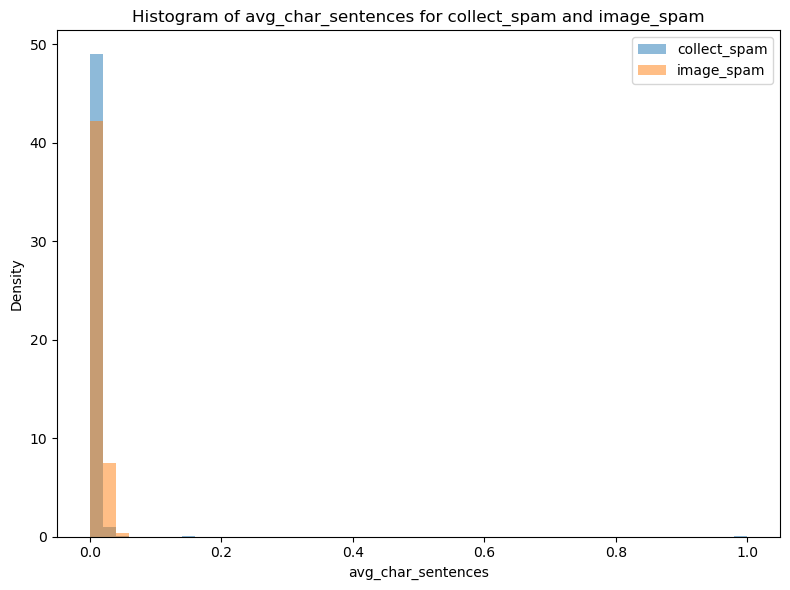

In [112]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_spam_heights, bins, _ = plt.hist(df[df['label'] == 'collect_spam']['avg_char_sentences'], bins=50, range=(0, 1), alpha=0.5, label='collect_spam', density=True)
image_spam_heights, _, _ = plt.hist(df[df['label'] == 'image_spam']['avg_char_sentences'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of avg_char_sentences for collect_spam and image_spam")
plt.xlabel("avg_char_sentences")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.5095929568846634


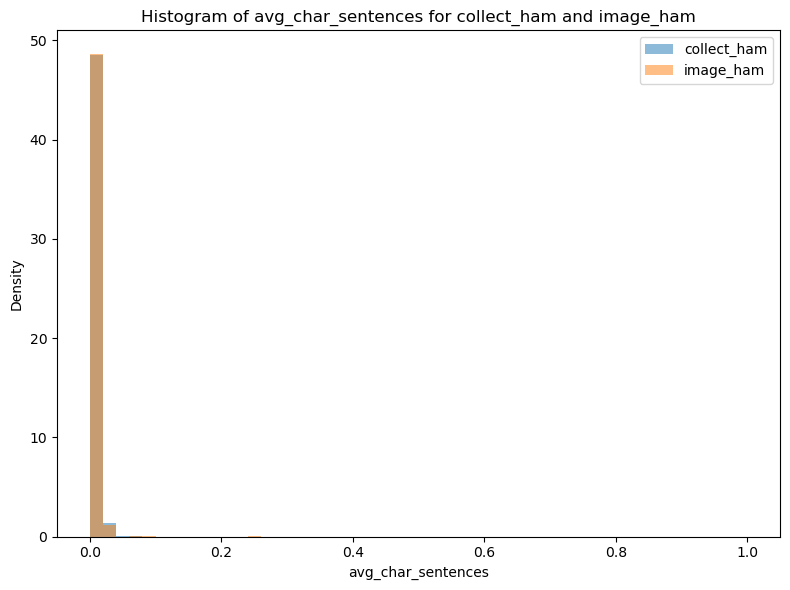

In [113]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_ham_heights, bins, _ = plt.hist(df[df['label'] == 'collect_ham']['avg_char_sentences'], bins=50, range=(0, 1), alpha=0.5, label='collect_ham', density=True)
image_ham_heights, _, _ = plt.hist(df[df['label'] == 'image_ham']['avg_char_sentences'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of avg_char_sentences for collect_ham and image_ham")
plt.xlabel("avg_char_sentences")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.4715551751523998


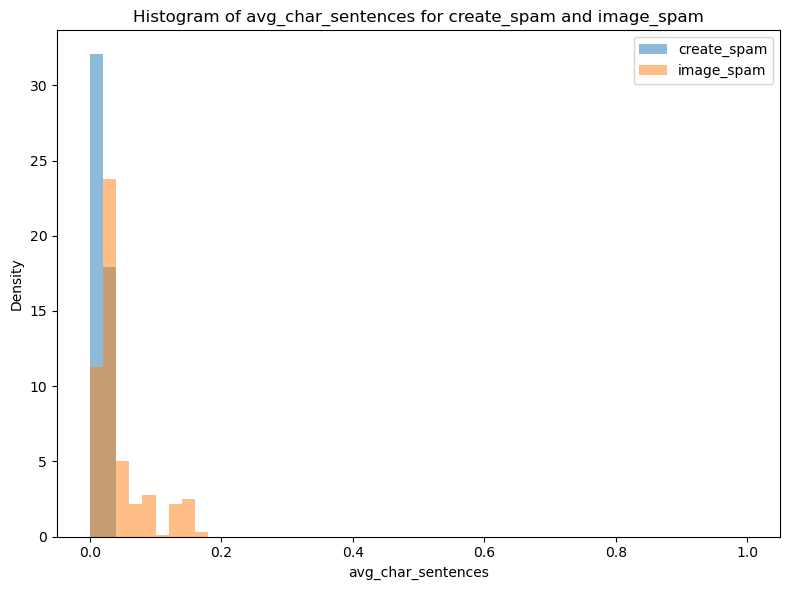

In [114]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_spam_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_spam']['avg_char_sentences'], bins=50, range=(0, 1), alpha=0.5, label='create_spam', density=True)
image_spam_heights, _, _ = plt.hist(df1[df1['label'] == 'image_spam']['avg_char_sentences'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of avg_char_sentences for create_spam and image_spam")
plt.xlabel("avg_char_sentences")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.5237920212615568


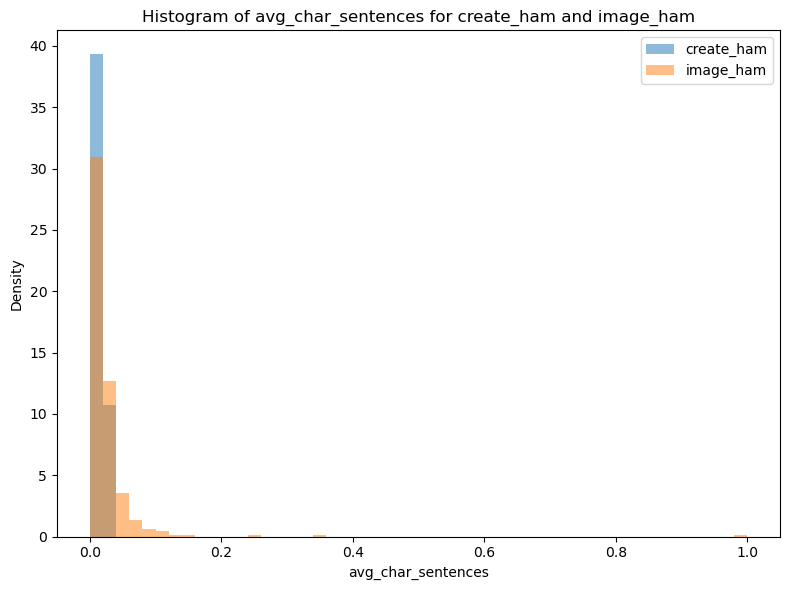

In [115]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_ham_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_ham']['avg_char_sentences'], bins=50, range=(0, 1), alpha=0.5, label='create_ham', density=True)
image_ham_heights, _, _ = plt.hist(df1[df1['label'] == 'image_ham']['avg_char_sentences'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of avg_char_sentences for create_ham and image_ham")
plt.xlabel("avg_char_sentences")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

## 문단 내 평균 단어,글자 비율

In [116]:
# 텍스트를 문단 단위로 분할하여 문단 당 평균 단어 수와 평균 글자 수 계산
paragraphs = df['text'].str.split('\n\n')
avg_word_lengths = []
avg_char_lengths = []

for paragraph in paragraphs:
    word_count = 0
    char_count = 0
    for sentence in paragraph:
        words = sentence.split()
        word_count += len(words)
        char_count += sum(len(word) for word in words)
    
    avg_word_lengths.append(word_count / len(paragraph))
    avg_char_lengths.append(char_count / len(paragraph))

# 새로운 칼럼으로 추가
df['avg_word_paragraphs'] = avg_word_lengths
df['avg_char_paragraphs'] = avg_char_lengths

In [117]:
df

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio,blank_ratio,crlf_ratio,pos_tagged,...,Noun,Pronoun,Verb,Adjective,Adverb,sentences,avg_word_sentences,avg_char_sentences,avg_word_paragraphs,avg_char_paragraphs
0,"re : opportunities\nlloyd ,\nyes , i would be...",collect_ham,0.172217,0.106878,"[re, :, opportunities, lloyd, ,, yes, ,, i, wo...",0,0.000000,0.413615,0.095878,"[(re, NN), (:, :), (opportunities, NNS), (lloy...",...,0.358932,0.020033,0.091820,0.051753,0.011686,"[ re : opportunities\nlloyd ,\nyes , i would b...",0.032732,0.004241,599.0,1560.0
1,\nALERT\nHOT STOCK ALERT THIS ONE IS STILL CLI...,image_spam,0.029782,0.002265,"[ALERT, HOT, STOCK, ALERT, THIS, ONE, IS, STIL...",0,0.165854,0.248918,0.031359,"[(ALERT, NNP), (HOT, NNP), (STOCK, NNP), (ALER...",...,0.500000,0.020000,0.084000,0.076000,0.020000,[\nALERT\nHOT STOCK ALERT THIS ONE IS STILL CL...,0.051103,0.010842,227.0,1208.0
2,\nFOXFIELD\nKirkby Stephen\nFirst\nGrange-over...,image_ham,0.016374,0.000000,"[FOXFIELD, Kirkby, Stephen, First, Grange-over...",0,0.160920,0.096833,0.224138,"[(FOXFIELD, NNP), (Kirkby, NNP), (Stephen, NNP...",...,0.826087,0.000000,0.043478,0.000000,0.043478,[\nFOXFIELD\nKirkby Stephen\nFirst\nGrange-ove...,0.041985,0.011926,23.0,151.0
3,\nMATTHEW 9:4\nTHE\nHARVEST\n0A0\nplentiful\nB...,image_ham,0.055699,0.019384,"[MATTHEW, 9:4, THE, HARVEST, 0A0, plentiful, B...",0,0.050364,0.302589,0.039761,"[(MATTHEW, NNP), (9:4, CD), (THE, NNP), (HARVE...",...,0.229885,0.112069,0.163793,0.028736,0.034483,[\nMATTHEW 9:4\nTHE\nHARVEST\n0A0\nplentiful\n...,0.053435,0.008477,291.0,1218.0
4,URL: http://boingboing.net/#85540997\nDate: No...,collect_ham,0.177169,0.074239,"[URL, :, http://boingboing.net/#85540997, Date...",3,0.060914,0.145397,0.038071,"[(URL, NN), (:, :), (http, NN), (:, :), (//boi...",...,0.397260,0.000000,0.109589,0.068493,0.013699,[URL: http://boingboing.net/#85540997\nDate: N...,0.067748,0.013469,37.0,355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11648,you don _ t know how to get into search engin...,collect_spam,0.025990,0.000000,"[you, don, _, t, know, how, to, get, into, sea...",0,0.000000,0.407295,0.054732,"[(you, PRP), (don, VBP), (_, JJ), (t, NN), (kn...",...,0.600877,0.065789,0.092105,0.057018,0.026316,[ you don _ t know how to get into search engi...,0.037647,0.005249,228.0,649.0
11649,\npicture\nonly\n154\nweek\nBehind A Sorority'...,image_ham,0.036528,0.041667,"[picture, only, 154, week, Behind, A, Sorority...",0,0.166667,0.165609,0.192308,"[(picture, NN), (only, RB), (154, CD), (week, ...",...,0.590909,0.000000,0.045455,0.022727,0.045455,[\npicture\nonly\n154\nweek\nBehind A Sorority...,0.040076,0.007892,38.0,196.0
11650,\nWESTERN UNION TELEGRAPH\nAND CABLE OFFICE,image_ham,0.000000,0.000000,"[WESTERN, UNION, TELEGRAPH, AND, CABLE, OFFICE]",0,0.853659,0.164380,0.146341,"[(WESTERN, NNP), (UNION, NNP), (TELEGRAPH, NNP...",...,1.000000,0.000000,0.000000,0.000000,0.000000,[\nWESTERN UNION TELEGRAPH\nAND CABLE OFFICE],0.009542,0.002596,6.0,35.0
11651,"all graphics software available , cheap oem v...",collect_spam,0.071229,0.183245,"[all, graphics, software, available, ,, cheap,...",0,0.000000,0.311885,0.092553,"[(all, DT), (graphics, NNS), (software, NN), (...",...,0.306931,0.009901,0.039604,0.113861,0.004950,"[ all graphics software available , cheap oem ...",0.019508,0.003313,202.0,737.0


In [118]:
# 텍스트를 문단 단위로 분할하여 문단 당 평균 단어 수와 평균 글자 수 계산
paragraphs = df1['text'].str.split('\n\n')
avg_word_lengths = []
avg_char_lengths = []

for paragraph in paragraphs:
    word_count = 0
    char_count = 0
    for sentence in paragraph:
        words = sentence.split()
        word_count += len(words)
        char_count += sum(len(word) for word in words)
    
    avg_word_lengths.append(word_count / len(paragraph))
    avg_char_lengths.append(char_count / len(paragraph))

# 새로운 칼럼으로 추가
df1['avg_word_paragraphs'] = avg_word_lengths
df1['avg_char_paragraphs'] = avg_char_lengths

In [119]:
df1

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio,blank_ratio,crlf_ratio,pos_tagged,...,Noun,Pronoun,Verb,Adjective,Adverb,sentences,avg_word_sentences,avg_char_sentences,avg_word_paragraphs,avg_char_paragraphs
0,Subject: Expand Your Artistry: Mixed Media Mas...,create_spam,0.164780,0.000000,"[Subject, :, Expand, Your, Artistry, :, Mixed,...",0,0.067138,0.503887,0.084806,"[(Subject, JJ), (:, :), (Expand, VB), (Your, P...",...,0.446809,0.085106,0.063830,0.127660,0.000000,[Subject: Expand Your Artistry: Mixed Media Ma...,0.027990,0.025386,9.250000,61.0
1,\nWE HAVE A RUNNER!\nCOULD THIS BE THE NEXT EX...,image_spam,0.183462,0.042918,"[WE, HAVE, A, RUNNER, !, COULD, THIS, BE, THE,...",0,0.215308,0.684406,0.030043,"[(WE, WDT), (HAVE, VBP), (A, DT), (RUNNER, NN)...",...,0.479401,0.003745,0.104869,0.044944,0.000000,"[\nWE HAVE A RUNNER!, COULD THIS BE THE NEXT E...",0.040553,0.031709,222.000000,1176.0
2,Subject: Incredible Savings Await You: Access ...,create_spam,0.422333,0.158491,"[Subject, :, Incredible, Savings, Await, You, ...",3,0.033962,0.347170,0.045283,"[(Subject, JJ), (:, :), (Incredible, JJ), (Sav...",...,0.294118,0.117647,0.147059,0.176471,0.000000,[Subject: Incredible Savings Await You: Access...,0.014313,0.017477,25.000000,241.0
3,\nDoctor Prescribed and Medically Supervised T...,image_spam,0.230734,0.031250,"[Doctor, Prescribed, and, Medically, Supervise...",2,0.148438,0.598958,0.085938,"[(Doctor, NNP), (Prescribed, NNP), (and, CC), ...",...,0.444444,0.027778,0.097222,0.055556,0.027778,[\nDoctor Prescribed and Medically Supervised ...,0.032443,0.026073,61.000000,323.0
4,"\n""If you break your promise, you and your sol...",image_ham,0.174872,0.025000,"["", If, you, break, your, promise, ,, you, and...",0,0.037500,0.651667,0.075000,"[('', ''), (If, IN), (you, PRP), (break, VBP),...",...,0.244898,0.163265,0.163265,0.020408,0.040816,"[\n""If you break your promise, you and your so...",0.029262,0.021408,40.000000,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407,\nBest stock Pick for this Year!\nGet ARSS Fir...,image_spam,0.225007,0.057901,"[Best, stock, Pick, for, this, Year, !, Get, A...",0,0.130277,0.699156,0.068758,"[(Best, NNP), (stock, NN), (Pick, NNP), (for, ...",...,0.367232,0.056497,0.112994,0.050847,0.039548,"[\nBest stock Pick for this Year!, Get ARSS Fi...",0.031870,0.022165,145.000000,684.0
2408,\nMarket Pulse List ARSS Among TOP FOUR Movers...,image_spam,0.221581,0.103672,"[Market, Pulse, List, ARSS, Among, TOP, FOUR, ...",0,0.110151,0.615983,0.071274,"[(Market, NN), (Pulse, NNP), (List, NNP), (ARS...",...,0.370166,0.022099,0.093923,0.093923,0.005525,[\nMarket Pulse List ARSS Among TOP FOUR Mover...,0.029493,0.022527,146.000000,780.0
2409,"Hi Clever,\n\nI had an idea for Hans Project. ...",create_ham,0.233163,0.000000,"[Hi, Clever, ,, I, had, an, idea, for, Hans, P...",0,0.075000,0.862500,0.075000,"[(Hi, NNP), (Clever, NNP), (,, ,), (I, PRP), (...",...,0.238095,0.142857,0.238095,0.000000,0.000000,"[Hi Clever,\n\nI had an idea for Hans Project....",0.018130,0.010088,8.500000,31.5
2410,Subject: Cultivate Confidence: Empowerment Wor...,create_spam,0.177495,0.000000,"[Subject, :, Cultivate, Confidence, :, Empower...",0,0.051903,0.461592,0.103806,"[(Subject, JJ), (:, :), (Cultivate, NN), (Conf...",...,0.422222,0.088889,0.066667,0.088889,0.000000,[Subject: Cultivate Confidence: Empowerment Wo...,0.026718,0.025765,7.000000,50.0


In [120]:
# avg_word_count 열을 Min-Max 정규화하여 교체
df['avg_word_paragraphs'] = minmax_normalize(df['avg_word_paragraphs'])
df['avg_char_paragraphs'] = minmax_normalize(df['avg_char_paragraphs'])
df

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio,blank_ratio,crlf_ratio,pos_tagged,...,Noun,Pronoun,Verb,Adjective,Adverb,sentences,avg_word_sentences,avg_char_sentences,avg_word_paragraphs,avg_char_paragraphs
0,"re : opportunities\nlloyd ,\nyes , i would be...",collect_ham,0.172217,0.106878,"[re, :, opportunities, lloyd, ,, yes, ,, i, wo...",0,0.000000,0.413615,0.095878,"[(re, NN), (:, :), (opportunities, NNS), (lloy...",...,0.358932,0.020033,0.091820,0.051753,0.011686,"[ re : opportunities\nlloyd ,\nyes , i would b...",0.032732,0.004241,0.097601,0.062084
1,\nALERT\nHOT STOCK ALERT THIS ONE IS STILL CLI...,image_spam,0.029782,0.002265,"[ALERT, HOT, STOCK, ALERT, THIS, ONE, IS, STIL...",0,0.165854,0.248918,0.031359,"[(ALERT, NNP), (HOT, NNP), (STOCK, NNP), (ALER...",...,0.500000,0.020000,0.084000,0.076000,0.020000,[\nALERT\nHOT STOCK ALERT THIS ONE IS STILL CL...,0.051103,0.010842,0.036886,0.048039
2,\nFOXFIELD\nKirkby Stephen\nFirst\nGrange-over...,image_ham,0.016374,0.000000,"[FOXFIELD, Kirkby, Stephen, First, Grange-over...",0,0.160920,0.096833,0.224138,"[(FOXFIELD, NNP), (Kirkby, NNP), (Stephen, NNP...",...,0.826087,0.000000,0.043478,0.000000,0.043478,[\nFOXFIELD\nKirkby Stephen\nFirst\nGrange-ove...,0.041985,0.011926,0.003591,0.005865
3,\nMATTHEW 9:4\nTHE\nHARVEST\n0A0\nplentiful\nB...,image_ham,0.055699,0.019384,"[MATTHEW, 9:4, THE, HARVEST, 0A0, plentiful, B...",0,0.050364,0.302589,0.039761,"[(MATTHEW, NNP), (9:4, CD), (THE, NNP), (HARVE...",...,0.229885,0.112069,0.163793,0.028736,0.034483,[\nMATTHEW 9:4\nTHE\nHARVEST\n0A0\nplentiful\n...,0.053435,0.008477,0.047331,0.048438
4,URL: http://boingboing.net/#85540997\nDate: No...,collect_ham,0.177169,0.074239,"[URL, :, http://boingboing.net/#85540997, Date...",3,0.060914,0.145397,0.038071,"[(URL, NN), (:, :), (http, NN), (:, :), (//boi...",...,0.397260,0.000000,0.109589,0.068493,0.013699,[URL: http://boingboing.net/#85540997\nDate: N...,0.067748,0.013469,0.005876,0.014005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11648,you don _ t know how to get into search engin...,collect_spam,0.025990,0.000000,"[you, don, _, t, know, how, to, get, into, sea...",0,0.000000,0.407295,0.054732,"[(you, PRP), (don, VBP), (_, JJ), (t, NN), (kn...",...,0.600877,0.065789,0.092105,0.057018,0.026316,[ you don _ t know how to get into search engi...,0.037647,0.005249,0.037049,0.025735
11649,\npicture\nonly\n154\nweek\nBehind A Sorority'...,image_ham,0.036528,0.041667,"[picture, only, 154, week, Behind, A, Sorority...",0,0.166667,0.165609,0.192308,"[(picture, NN), (only, RB), (154, CD), (week, ...",...,0.590909,0.000000,0.045455,0.022727,0.045455,[\npicture\nonly\n154\nweek\nBehind A Sorority...,0.040076,0.007892,0.006039,0.007661
11650,\nWESTERN UNION TELEGRAPH\nAND CABLE OFFICE,image_ham,0.000000,0.000000,"[WESTERN, UNION, TELEGRAPH, AND, CABLE, OFFICE]",0,0.853659,0.164380,0.146341,"[(WESTERN, NNP), (UNION, NNP), (TELEGRAPH, NNP...",...,1.000000,0.000000,0.000000,0.000000,0.000000,[\nWESTERN UNION TELEGRAPH\nAND CABLE OFFICE],0.009542,0.002596,0.000816,0.001237
11651,"all graphics software available , cheap oem v...",collect_spam,0.071229,0.183245,"[all, graphics, software, available, ,, cheap,...",0,0.000000,0.311885,0.092553,"[(all, DT), (graphics, NNS), (software, NN), (...",...,0.306931,0.009901,0.039604,0.113861,0.004950,"[ all graphics software available , cheap oem ...",0.019508,0.003313,0.032806,0.029246


In [121]:
# avg_word_count 열을 Min-Max 정규화하여 교체
df1['avg_word_paragraphs'] = minmax_normalize(df1['avg_word_paragraphs'])
df1['avg_char_paragraphs'] = minmax_normalize(df1['avg_char_paragraphs'])
df1

,text,label,special_ratio,number_ratio,tokens,url_count,upper_ratio,blank_ratio,crlf_ratio,pos_tagged,...,Noun,Pronoun,Verb,Adjective,Adverb,sentences,avg_word_sentences,avg_char_sentences,avg_word_paragraphs,avg_char_paragraphs
0,Subject: Expand Your Artistry: Mixed Media Mas...,create_spam,0.164780,0.000000,"[Subject, :, Expand, Your, Artistry, :, Mixed,...",0,0.067138,0.503887,0.084806,"[(Subject, JJ), (:, :), (Expand, VB), (Your, P...",...,0.446809,0.085106,0.063830,0.127660,0.000000,[Subject: Expand Your Artistry: Mixed Media Ma...,0.027990,0.025386,0.011074,0.014957
1,\nWE HAVE A RUNNER!\nCOULD THIS BE THE NEXT EX...,image_spam,0.183462,0.042918,"[WE, HAVE, A, RUNNER, !, COULD, THIS, BE, THE,...",0,0.215308,0.684406,0.030043,"[(WE, WDT), (HAVE, VBP), (A, DT), (RUNNER, NN)...",...,0.479401,0.003745,0.104869,0.044944,0.000000,"[\nWE HAVE A RUNNER!, COULD THIS BE THE NEXT E...",0.040553,0.031709,0.296644,0.307531
2,Subject: Incredible Savings Await You: Access ...,create_spam,0.422333,0.158491,"[Subject, :, Incredible, Savings, Await, You, ...",3,0.033962,0.347170,0.045283,"[(Subject, JJ), (:, :), (Incredible, JJ), (Sav...",...,0.294118,0.117647,0.147059,0.176471,0.000000,[Subject: Incredible Savings Await You: Access...,0.014313,0.017477,0.032215,0.062188
3,\nDoctor Prescribed and Medically Supervised T...,image_spam,0.230734,0.031250,"[Doctor, Prescribed, and, Medically, Supervise...",2,0.148438,0.598958,0.085938,"[(Doctor, NNP), (Prescribed, NNP), (and, CC), ...",...,0.444444,0.027778,0.097222,0.055556,0.027778,[\nDoctor Prescribed and Medically Supervised ...,0.032443,0.026073,0.080537,0.083705
4,"\n""If you break your promise, you and your sol...",image_ham,0.174872,0.025000,"["", If, you, break, your, promise, ,, you, and...",0,0.037500,0.651667,0.075000,"[('', ''), (If, IN), (you, PRP), (break, VBP),...",...,0.244898,0.163265,0.163265,0.020408,0.040816,"[\n""If you break your promise, you and your so...",0.029262,0.021408,0.052349,0.051430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407,\nBest stock Pick for this Year!\nGet ARSS Fir...,image_spam,0.225007,0.057901,"[Best, stock, Pick, for, this, Year, !, Get, A...",0,0.130277,0.699156,0.068758,"[(Best, NNP), (stock, NN), (Pick, NNP), (for, ...",...,0.367232,0.056497,0.112994,0.050847,0.039548,"[\nBest stock Pick for this Year!, Get ARSS Fi...",0.031870,0.022165,0.193289,0.178431
2408,\nMarket Pulse List ARSS Among TOP FOUR Movers...,image_spam,0.221581,0.103672,"[Market, Pulse, List, ARSS, Among, TOP, FOUR, ...",0,0.110151,0.615983,0.071274,"[(Market, NN), (Pulse, NNP), (List, NNP), (ARS...",...,0.370166,0.022099,0.093923,0.093923,0.005525,[\nMarket Pulse List ARSS Among TOP FOUR Mover...,0.029493,0.022527,0.194631,0.203621
2409,"Hi Clever,\n\nI had an idea for Hans Project. ...",create_ham,0.233163,0.000000,"[Hi, Clever, ,, I, had, an, idea, for, Hans, P...",0,0.075000,0.862500,0.075000,"[(Hi, NNP), (Clever, NNP), (,, ,), (I, PRP), (...",...,0.238095,0.142857,0.238095,0.000000,0.000000,"[Hi Clever,\n\nI had an idea for Hans Project....",0.018130,0.010088,0.010067,0.007216
2410,Subject: Cultivate Confidence: Empowerment Wor...,create_spam,0.177495,0.000000,"[Subject, :, Cultivate, Confidence, :, Empower...",0,0.051903,0.461592,0.103806,"[(Subject, JJ), (:, :), (Cultivate, NN), (Conf...",...,0.422222,0.088889,0.066667,0.088889,0.000000,[Subject: Cultivate Confidence: Empowerment Wo...,0.026718,0.025765,0.008054,0.012070


### 단어

Overlapping area: 0.5824503553225305


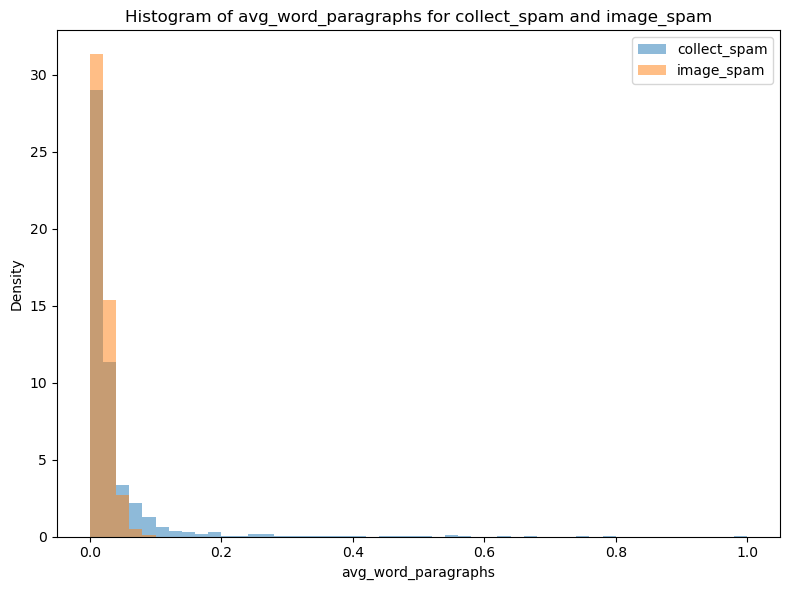

In [122]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_spam_heights, bins, _ = plt.hist(df[df['label'] == 'collect_spam']['avg_word_paragraphs'], bins=50, range=(0, 1), alpha=0.5, label='collect_spam', density=True)
image_spam_heights, _, _ = plt.hist(df[df['label'] == 'image_spam']['avg_word_paragraphs'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of avg_word_paragraphs for collect_spam and image_spam")
plt.xlabel("avg_word_paragraphs")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.3097969198547297


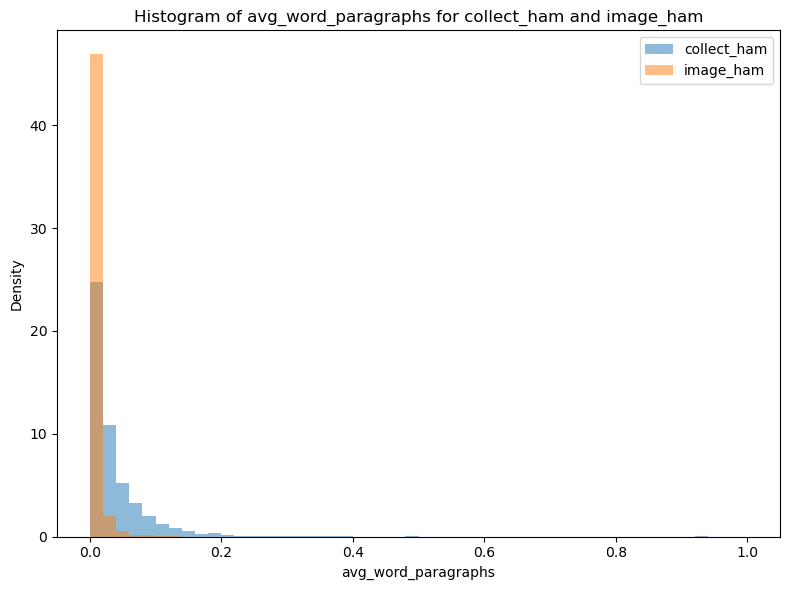

In [123]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_ham_heights, bins, _ = plt.hist(df[df['label'] == 'collect_ham']['avg_word_paragraphs'], bins=50, range=(0, 1), alpha=0.5, label='collect_ham', density=True)
image_ham_heights, _, _ = plt.hist(df[df['label'] == 'image_ham']['avg_word_paragraphs'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of avg_word_paragraphs for collect_ham and image_ham")
plt.xlabel("avg_word_paragraphs")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.1115201339400704


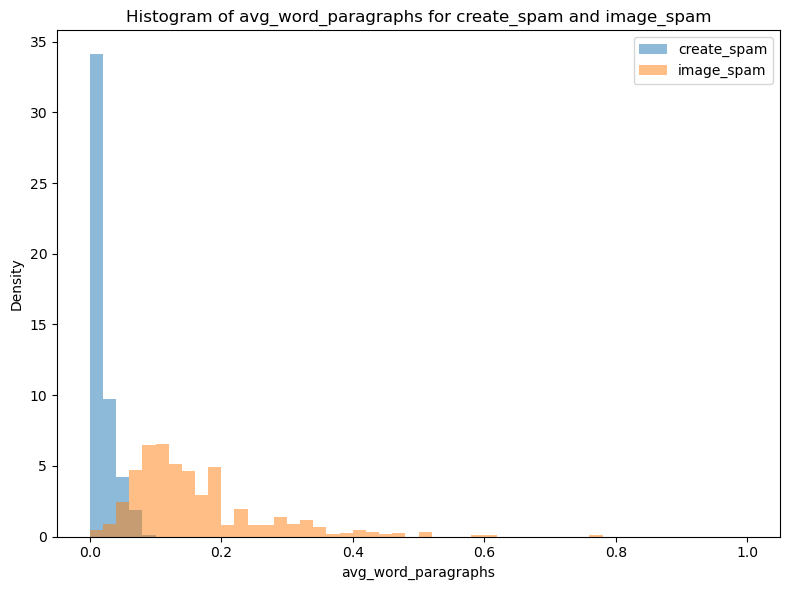

In [124]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_spam_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_spam']['avg_word_paragraphs'], bins=50, range=(0, 1), alpha=0.5, label='create_spam', density=True)
image_spam_heights, _, _ = plt.hist(df1[df1['label'] == 'image_spam']['avg_word_paragraphs'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of avg_word_paragraphs for create_spam and image_spam")
plt.xlabel("avg_word_paragraphs")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.5348242811501598


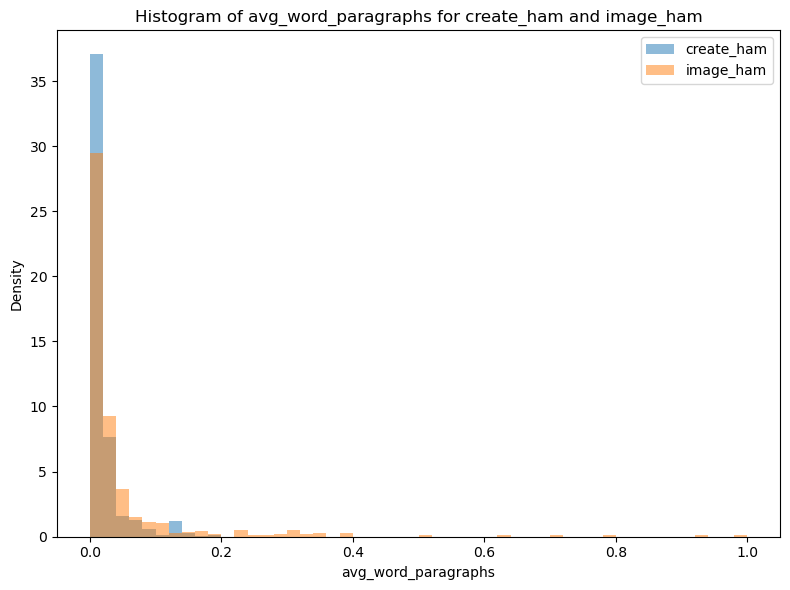

In [125]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_ham_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_ham']['avg_word_paragraphs'], bins=50, range=(0, 1), alpha=0.5, label='create_ham', density=True)
image_ham_heights, _, _ = plt.hist(df1[df1['label'] == 'image_ham']['avg_word_paragraphs'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of avg_word_paragraphs for create_ham and image_ham")
plt.xlabel("avg_word_paragraphs")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

### 글자

Overlapping area: 0.6340229315478909


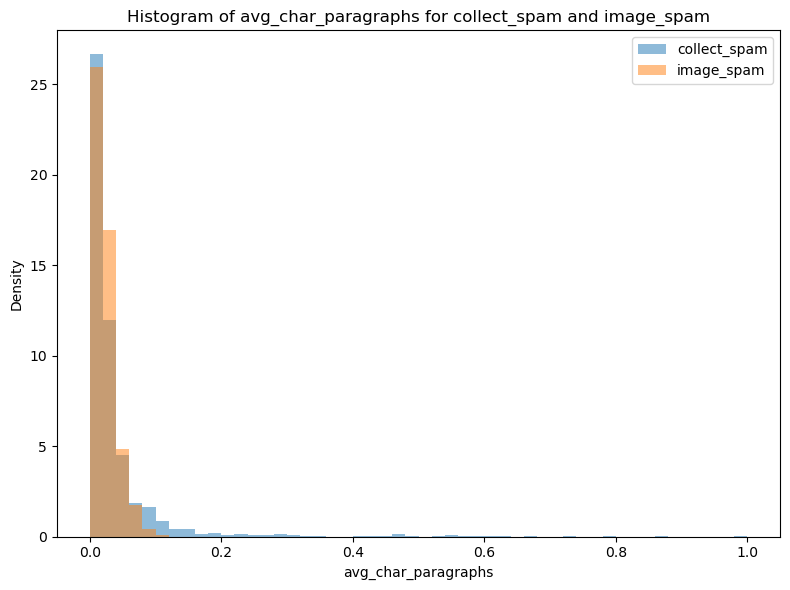

In [126]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_spam_heights, bins, _ = plt.hist(df[df['label'] == 'collect_spam']['avg_char_paragraphs'], bins=50, range=(0, 1), alpha=0.5, label='collect_spam', density=True)
image_spam_heights, _, _ = plt.hist(df[df['label'] == 'image_spam']['avg_char_paragraphs'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of avg_char_paragraphs for collect_spam and image_spam")
plt.xlabel("avg_char_paragraphs")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.29950470484731695


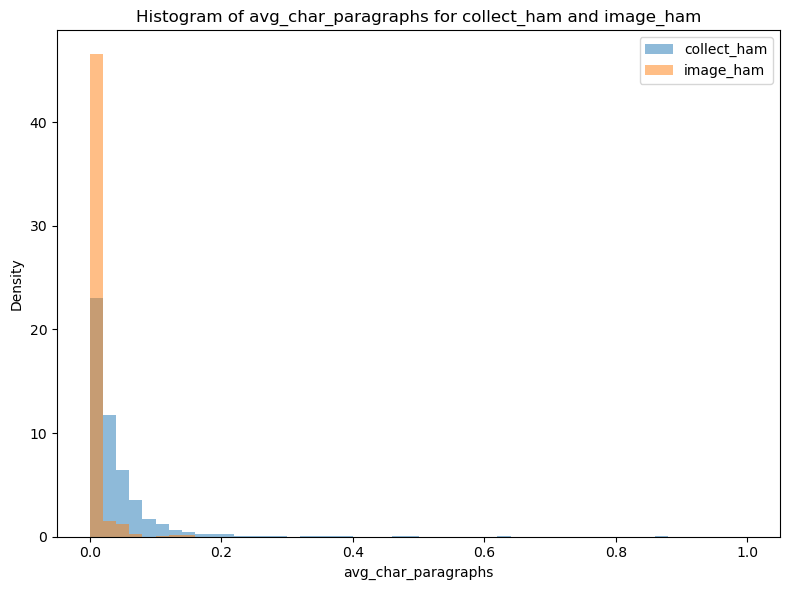

In [127]:
# Your existing code to collect the histograms
plt.figure(figsize=(8, 6))
collect_ham_heights, bins, _ = plt.hist(df[df['label'] == 'collect_ham']['avg_char_paragraphs'], bins=50, range=(0, 1), alpha=0.5, label='collect_ham', density=True)
image_ham_heights, _, _ = plt.hist(df[df['label'] == 'image_ham']['avg_char_paragraphs'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of avg_char_paragraphs for collect_ham and image_ham")
plt.xlabel("avg_char_paragraphs")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(collect_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.10659933888554993


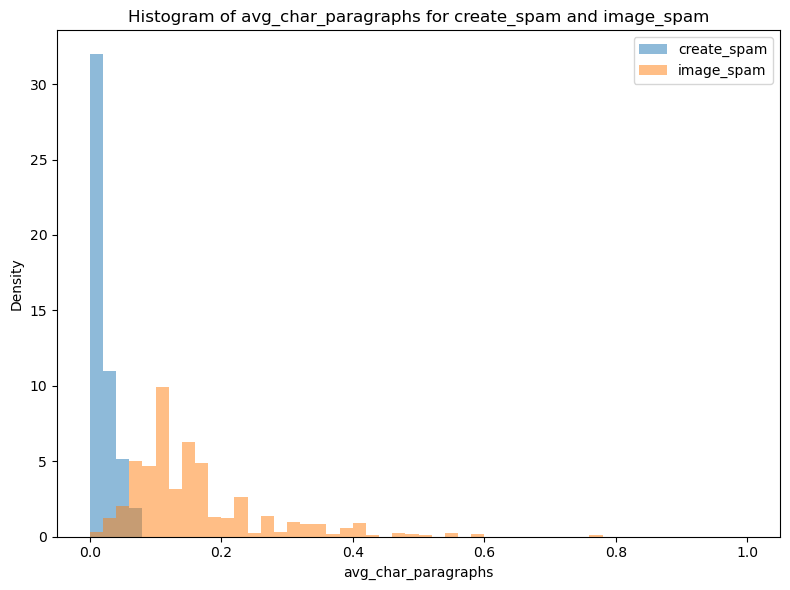

In [128]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_spam_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_spam']['avg_char_paragraphs'], bins=50, range=(0, 1), alpha=0.5, label='create_spam', density=True)
image_spam_heights, _, _ = plt.hist(df1[df1['label'] == 'image_spam']['avg_char_paragraphs'], bins=bins, alpha=0.5, label='image_spam', density=True)
plt.title("Histogram of avg_char_paragraphs for create_spam and image_spam")
plt.xlabel("avg_char_paragraphs")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_spam_heights, image_spam_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

Overlapping area: 0.5562130679408522


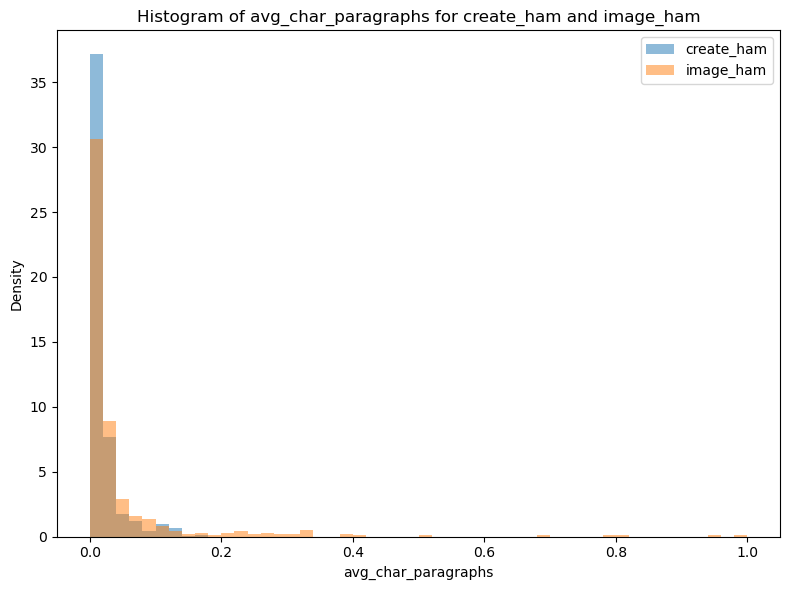

In [129]:
# Your existing code to create the histograms
plt.figure(figsize=(8, 6))
create_ham_heights, bins, _ = plt.hist(df1[df1['label'] == 'create_ham']['avg_char_paragraphs'], bins=50, range=(0, 1), alpha=0.5, label='create_ham', density=True)
image_ham_heights, _, _ = plt.hist(df1[df1['label'] == 'image_ham']['avg_char_paragraphs'], bins=bins, alpha=0.5, label='image_ham', density=True)
plt.title("Histogram of avg_char_paragraphs for create_ham and image_ham")
plt.xlabel("avg_char_paragraphs")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

# Calculate the overlapping area
overlapping_area = np.trapz(np.minimum(create_ham_heights, image_ham_heights), dx=bins[1] - bins[0])
print("Overlapping area:", overlapping_area)

plt.show()

In [130]:
final_df = df[['special_ratio','number_ratio','url_count','upper_ratio','blank_ratio','crlf_ratio','Noun','Pronoun','Verb','Adjective','Adverb','avg_word_sentences','avg_char_sentences','avg_word_paragraphs','avg_char_paragraphs']]
final_df

,special_ratio,number_ratio,url_count,upper_ratio,blank_ratio,crlf_ratio,Noun,Pronoun,Verb,Adjective,Adverb,avg_word_sentences,avg_char_sentences,avg_word_paragraphs,avg_char_paragraphs
0,0.172217,0.106878,0,0.000000,0.413615,0.095878,0.358932,0.020033,0.091820,0.051753,0.011686,0.032732,0.004241,0.097601,0.062084
1,0.029782,0.002265,0,0.165854,0.248918,0.031359,0.500000,0.020000,0.084000,0.076000,0.020000,0.051103,0.010842,0.036886,0.048039
2,0.016374,0.000000,0,0.160920,0.096833,0.224138,0.826087,0.000000,0.043478,0.000000,0.043478,0.041985,0.011926,0.003591,0.005865
3,0.055699,0.019384,0,0.050364,0.302589,0.039761,0.229885,0.112069,0.163793,0.028736,0.034483,0.053435,0.008477,0.047331,0.048438
4,0.177169,0.074239,3,0.060914,0.145397,0.038071,0.397260,0.000000,0.109589,0.068493,0.013699,0.067748,0.013469,0.005876,0.014005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11648,0.025990,0.000000,0,0.000000,0.407295,0.054732,0.600877,0.065789,0.092105,0.057018,0.026316,0.037647,0.005249,0.037049,0.025735
11649,0.036528,0.041667,0,0.166667,0.165609,0.192308,0.590909,0.000000,0.045455,0.022727,0.045455,0.040076,0.007892,0.006039,0.007661
11650,0.000000,0.000000,0,0.853659,0.164380,0.146341,1.000000,0.000000,0.000000,0.000000,0.000000,0.009542,0.002596,0.000816,0.001237
11651,0.071229,0.183245,0,0.000000,0.311885,0.092553,0.306931,0.009901,0.039604,0.113861,0.004950,0.019508,0.003313,0.032806,0.029246


In [131]:
final_df1 = df1[['special_ratio','number_ratio','url_count','upper_ratio','blank_ratio','crlf_ratio','Noun','Pronoun','Verb','Adjective','Adverb','avg_word_sentences','avg_char_sentences','avg_word_paragraphs','avg_char_paragraphs']]
final_df1

,special_ratio,number_ratio,url_count,upper_ratio,blank_ratio,crlf_ratio,Noun,Pronoun,Verb,Adjective,Adverb,avg_word_sentences,avg_char_sentences,avg_word_paragraphs,avg_char_paragraphs
0,0.164780,0.000000,0,0.067138,0.503887,0.084806,0.446809,0.085106,0.063830,0.127660,0.000000,0.027990,0.025386,0.011074,0.014957
1,0.183462,0.042918,0,0.215308,0.684406,0.030043,0.479401,0.003745,0.104869,0.044944,0.000000,0.040553,0.031709,0.296644,0.307531
2,0.422333,0.158491,3,0.033962,0.347170,0.045283,0.294118,0.117647,0.147059,0.176471,0.000000,0.014313,0.017477,0.032215,0.062188
3,0.230734,0.031250,2,0.148438,0.598958,0.085938,0.444444,0.027778,0.097222,0.055556,0.027778,0.032443,0.026073,0.080537,0.083705
4,0.174872,0.025000,0,0.037500,0.651667,0.075000,0.244898,0.163265,0.163265,0.020408,0.040816,0.029262,0.021408,0.052349,0.051430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407,0.225007,0.057901,0,0.130277,0.699156,0.068758,0.367232,0.056497,0.112994,0.050847,0.039548,0.031870,0.022165,0.193289,0.178431
2408,0.221581,0.103672,0,0.110151,0.615983,0.071274,0.370166,0.022099,0.093923,0.093923,0.005525,0.029493,0.022527,0.194631,0.203621
2409,0.233163,0.000000,0,0.075000,0.862500,0.075000,0.238095,0.142857,0.238095,0.000000,0.000000,0.018130,0.010088,0.010067,0.007216
2410,0.177495,0.000000,0,0.051903,0.461592,0.103806,0.422222,0.088889,0.066667,0.088889,0.000000,0.026718,0.025765,0.008054,0.012070
